## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
### YOUR CODE HERE ###
import pandas as pd
import missingno as msno
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import tensorflow as tf
#Загрузим основной датасет
main_df = pd.read_csv('telecom_users.csv')
main_df.head(5)

Unnamed: 0  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0        1869  7010-BRBUU    Male              0     Yes        Yes      72   
1        4528  9688-YGXVR  Female              0      No         No      44   
2        6344  9286-DOJGF  Female              1     Yes         No      38   
3        6739  6994-KERXL    Male              0      No         No       4   
4         432  2181-UAESM    Male              0      No         No       2   

  PhoneService MultipleLines InternetService  ...     DeviceProtection  \
0          Yes           Yes              No  ...  No internet service   
1          Yes            No     Fiber optic  ...                  Yes   
2          Yes           Yes     Fiber optic  ...                   No   
3          Yes            No             DSL  ...                   No   
4          Yes            No             DSL  ...                  Yes   

           TechSupport          StreamingTV      StreamingMovies  \
0  No internet service  No internet service  No internet service   
1                   No                  Yes                   No   
2                   No                   No                   No   
3                   No                   No                  Yes   
4                   No                   No                   No   

         Contract PaperlessBilling              PaymentMethod MonthlyCharges  \
0        Two year               No    Credit card (automatic)          24.10   
1  Month-to-month              Yes    Credit card (automatic)          88.15   
2  Month-to-month              Yes  Bank transfer (automatic)          74.95   
3  Month-to-month              Yes           Electronic check          55.90   
4  Month-to-month               No           Electronic check          53.45   

  TotalCharges  Churn  
0      1734.65     No  
1       3973.2     No  
2      2869.85    Yes  
3        238.5     No  
4        119.5     No  

[5 rows x 22 columns]

In [2]:
#Сразу же посмотрим на соотношение значений целевой переменной
main_df.Churn.value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

In [3]:
#В долях
main_df.Churn.value_counts(normalize=True)

No     0.734881
Yes    0.265119
Name: Churn, dtype: float64

Как видим, выборка не сбалансирована, доля ушедших клиентов составляет **26.5%**, это следует учитывать при построении моделей

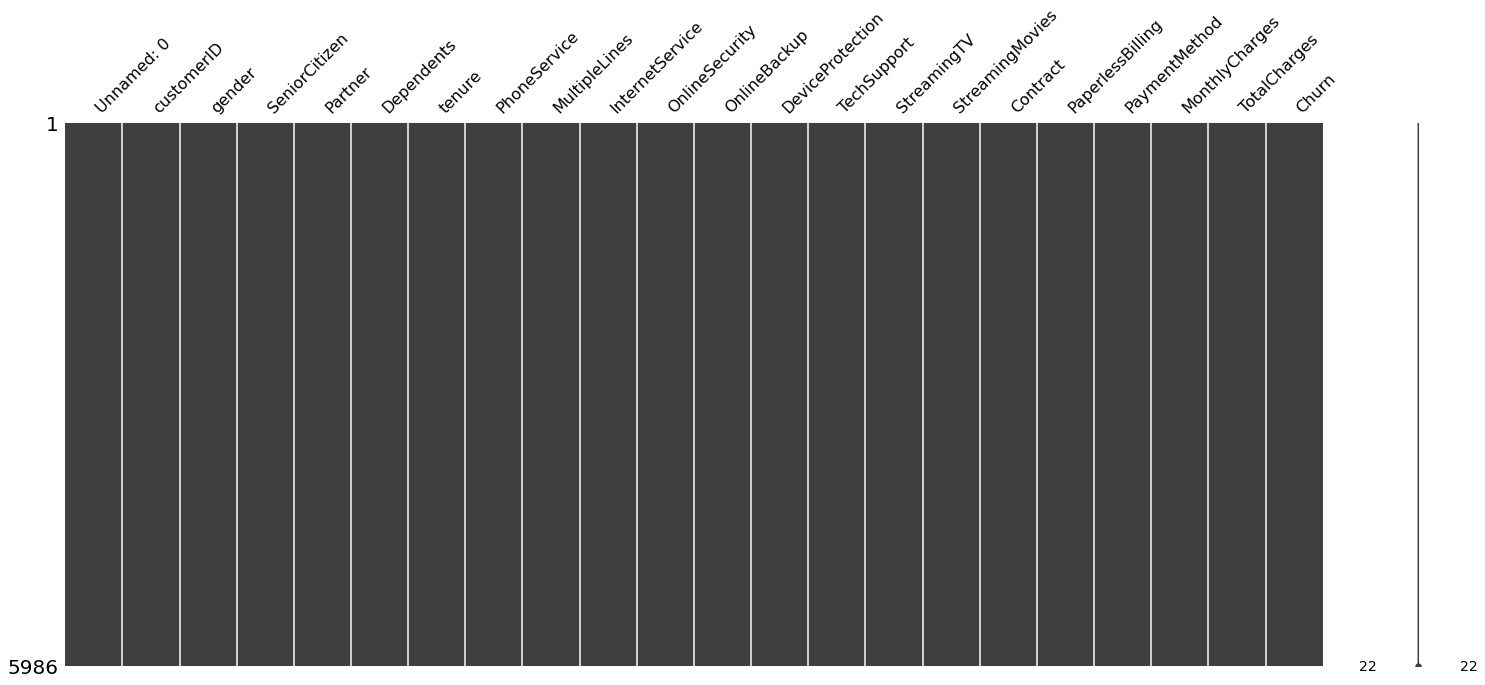

In [4]:
#Проверим признаки на наличие nan
msno.matrix(main_df)
plt.show()

In [5]:
#Как видим, один из столбцов остался без имени, выведем описание данных этого столбца
main_df['Unnamed: 0'].describe()

count    5986.000000
mean     3533.561310
std      2035.705666
min         0.000000
25%      1777.250000
50%      3546.500000
75%      5291.750000
max      7042.000000
Name: Unnamed: 0, dtype: float64

Пока что сложно предположить, что этот признак мог бы обозначать. Оставлять его или нет можно будет решить после проверки корреляции данного признака с другими, а также проверки его влияния на результат.

In [6]:
#Посмотрим из каких типов состоят данные датасета
main_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


Столбец TotalCharges, должен содержать общую сумму, заплаченную клиентом, однако тип данных данного столбца object, что означает что данные могут быть в текстовом формате, либо содержать ошибочные значения

In [7]:
#Проанализируем значения в столбце, также добавим столбец tenure 
main_df[['tenure','TotalCharges']].sort_values('tenure')

tenure TotalCharges
5382       0             
634        0             
356        0             
5375       0             
5951       0             
...      ...          ...
4228      72       7422.1
1538      72       8425.3
4234      72      7732.65
5624      72       7962.2
0         72      1734.65

[5986 rows x 2 columns]

Помимого того, что часть данных представлена в строковом формате, данные, которые соответствуют недавно пришедшим клиентам (у которых tenure = 0) содержат ' '.

In [8]:
#Сделаем данный столбец численным
main_df['TotalCharges'] = main_df['TotalCharges'].apply(lambda x: float(x) if x != ' ' else 0)

In [9]:
#Проанализируем числовые данные
main_df.describe(include = [np.number])

Unnamed: 0  SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count  5986.000000    5986.000000  5986.000000     5986.000000   5986.000000
mean   3533.561310       0.161377    32.468760       64.802213   2294.221559
std    2035.705666       0.367909    24.516391       30.114702   2274.164124
min       0.000000       0.000000     0.000000       18.250000      0.000000
25%    1777.250000       0.000000     9.000000       35.650000    401.587500
50%    3546.500000       0.000000    29.000000       70.400000   1408.575000
75%    5291.750000       0.000000    56.000000       89.900000   3841.500000
max    7042.000000       1.000000    72.000000      118.750000   8684.800000

In [10]:
#Проанализируем категориальные данные
main_df.describe(include = [object])

customerID gender Partner Dependents PhoneService MultipleLines  \
count         5986   5986    5986       5986         5986          5986   
unique        5986      2       2          2            2             3   
top     7010-BRBUU   Male      No         No          Yes            No   
freq             1   3050    3082       4195         5396          2848   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             5986           5986         5986             5986   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              2627           2982         2605             2640   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         5986        5986            5986            5986   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          2960        2389            2356            3269   

       PaperlessBilling     PaymentMethod Churn  
count              5986              5986  5986  
unique                2                 4     2  
top                 Yes  Electronic check    No  
freq               3528              2006  4399

В таблице присутствует много признаков, которые касаются только клиентов с подключенным интернетом, выведем описание отдельно для данной категории

In [11]:
main_df[main_df['InternetService'] != 'No'].describe(include = [object])

customerID gender Partner Dependents PhoneService MultipleLines  \
count         4695   4695    4695       4695         4695          4695   
unique        4695      2       2          2            2             3   
top     9688-YGXVR   Male      No         No          Yes           Yes   
freq             1   2386    2420       3452         4105          2254   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             4695           4695         4695             4695   
unique               2              2            2                2   
top        Fiber optic             No           No               No   
freq              2627           2982         2605             2640   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         4695        4695            4695            4695   
unique           2           2               2               3   
top             No          No              No  Month-to-month   
freq          2960        2389            2356            2831   

       PaperlessBilling     PaymentMethod Churn  
count              4695              4695  4695  
unique                2                 4     2  
top                 Yes  Electronic check    No  
freq               3158              1901  3207

### Основные выводы

#### Категориальный данные:
- Таблица содержит данные о почти **6000** клиентах;
- Разделение клиентов на **женчин** и **мужчин**, а также на тех кто **состоит в браке** и **нет** примерно **равное**;
- Клиетов **без иждевенцов** несколько **больше** чем с;
- **Большинство** клиентов пользуются услугой **телефонной связи**;
- **Половина** клиентов подключили **несколько линий телефонной связи**;<p>
#### Клиенты которые пользуются интеренетом от данного поставщика:
    <p>
- Чуть **менее половины** из клиентов используют **оптоволокно**;
- **Больше половины** клиентов **не пользуется** услугой **онлайн-безопасности**;
- **Менее половины** клиентов **подключили** услугу **online backup**;
- **Более половины** **не имеют страховки** оборудования и технической поддержки;
- Около **половины** клиентов **подключили** услуги **стримингового телевидения и стримингового кинотеатра**
- **Более половины** клиентов предпочитают **ежемесячный платеж**
- **Более половины** клиентов пользуются **безбумажным биллингом** и предпочитают рассчитываться **электронным чеком**

#### Числовые данные:
- В среднем **срок пользования** клиентом услугами составляет порядка **30 месяцев**, при **максимальном** значении **72 месяца**
- Существует довольно **большой разброс** в значениях **текущего месячного платежа** от 18 до 120 т.е. более чем в 10 раз. 
- TotalCharges также имеет сильный разброс, который связан с разбросом в ежемесячной плате и разбросом в сроке пользования.

# 2. Исследование зависимостей и формулирование гипотез

### 2.1 Исследуем числовые признаки

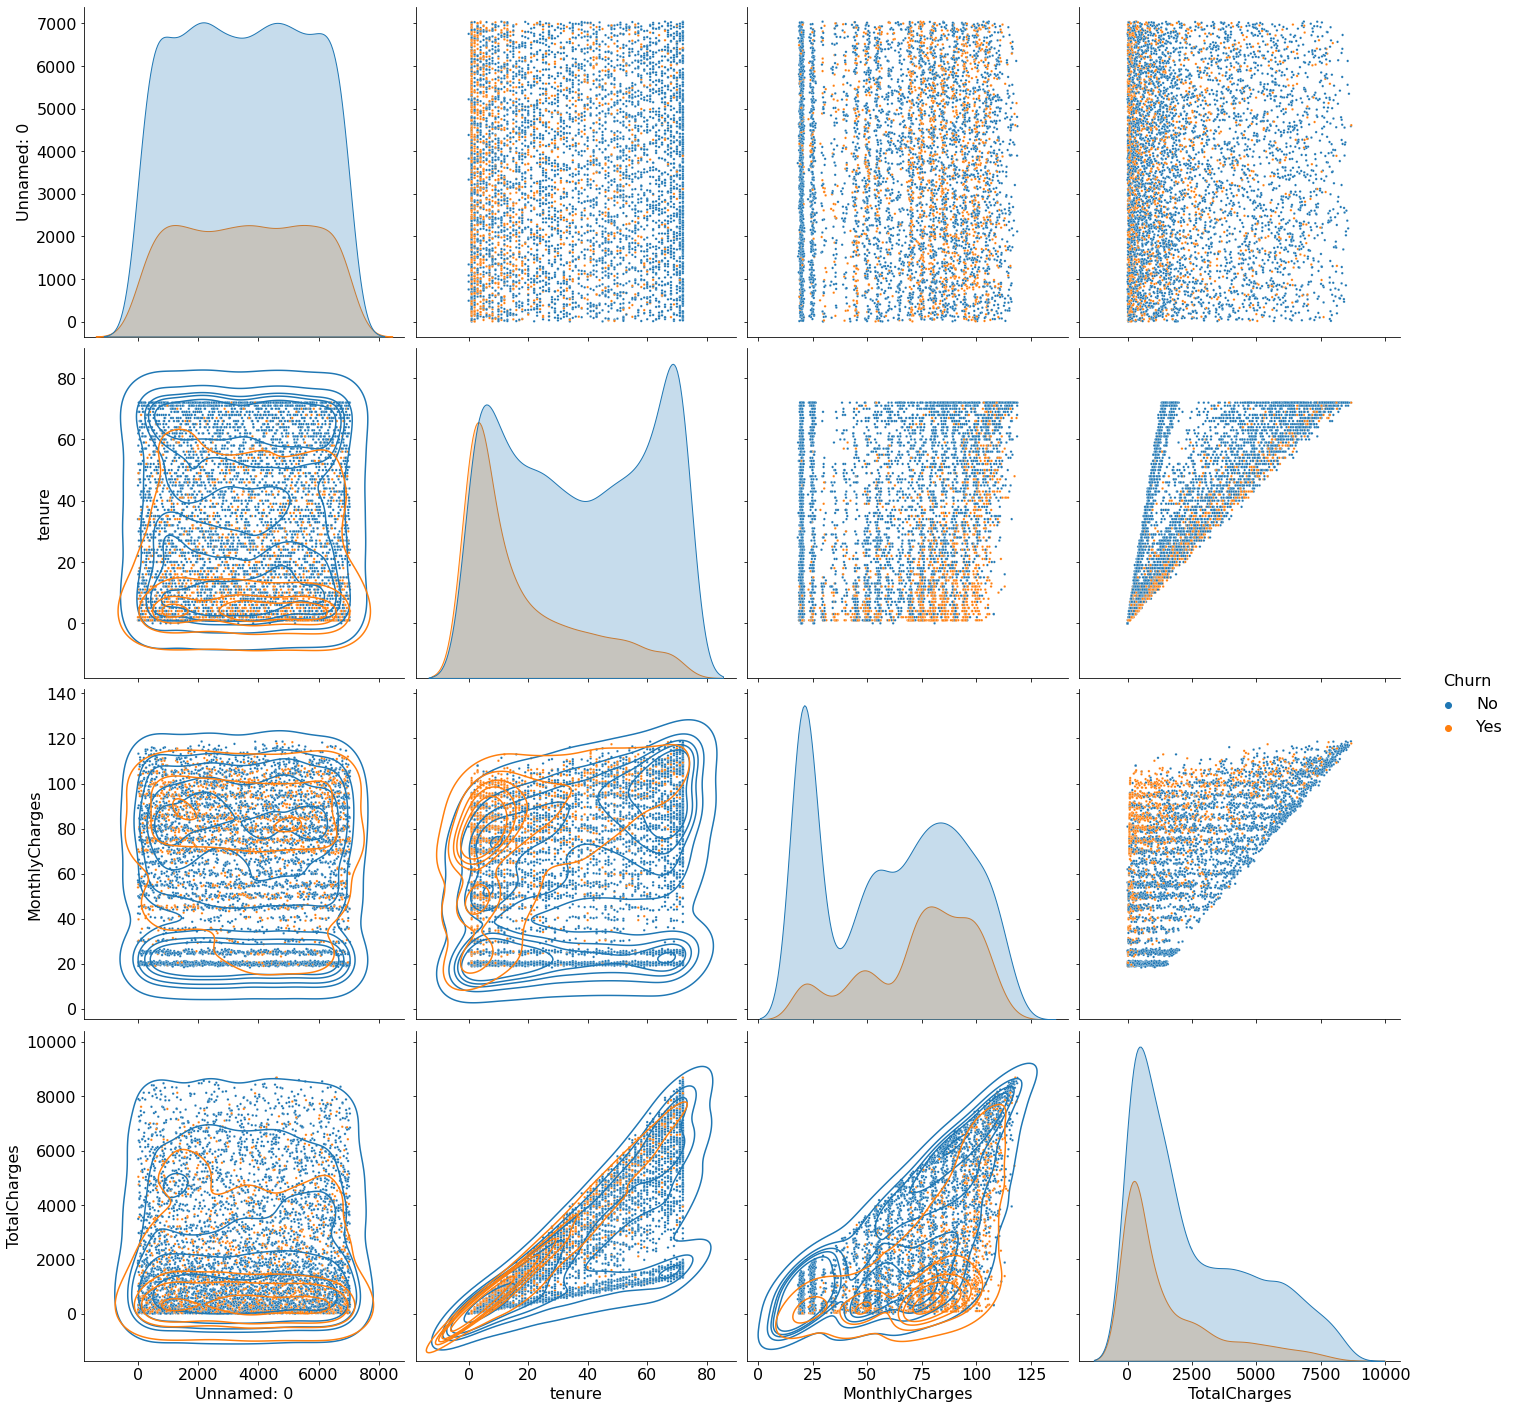

In [12]:
#Построим парные диаграммы рассеяния для всех числовых признаков, отделяя при этом на графике ушедших и оставшихся
#клиентов разными цветами
plt.rcParams['font.size'] = 16
g = sns.pairplot(main_df[['Unnamed: 0','tenure','MonthlyCharges','TotalCharges','Churn']], hue = 'Churn', kind='scatter', corner=False, diag_kind='kde', 
            plot_kws = dict(s=6), aspect=1, height=5)
g.map_lower(sns.kdeplot, levels=6, color='.2')

Анализируя диаграммы рассеяния можно сделать следующие выводы:
1) Плотностные диаграммы признаков Unnamed: 0 и TotaCharges имеют схожее распределение для ушедших и оставшихся клиентов. В плотностной диаграмме признака tenure для оставшихся пользователей в распределении наблюдается 2 пика при малых значениях и при высоких, в то время как распределение для ушедших клиентов отличается - содержит 1 пик только для малых значений. Для признака MonthlyCharges при малых значениях данного признака число пользователей максмально, в то время как относительное число ушедших пользователей гораздо ниже, а в области средних и высоких значений, данные распределения схожи.

2) В парных же диаграммах рассеяния практически везде видны различные распределения для ушедших и оставшихся клиентов, их стоит рассмотреть отдельно

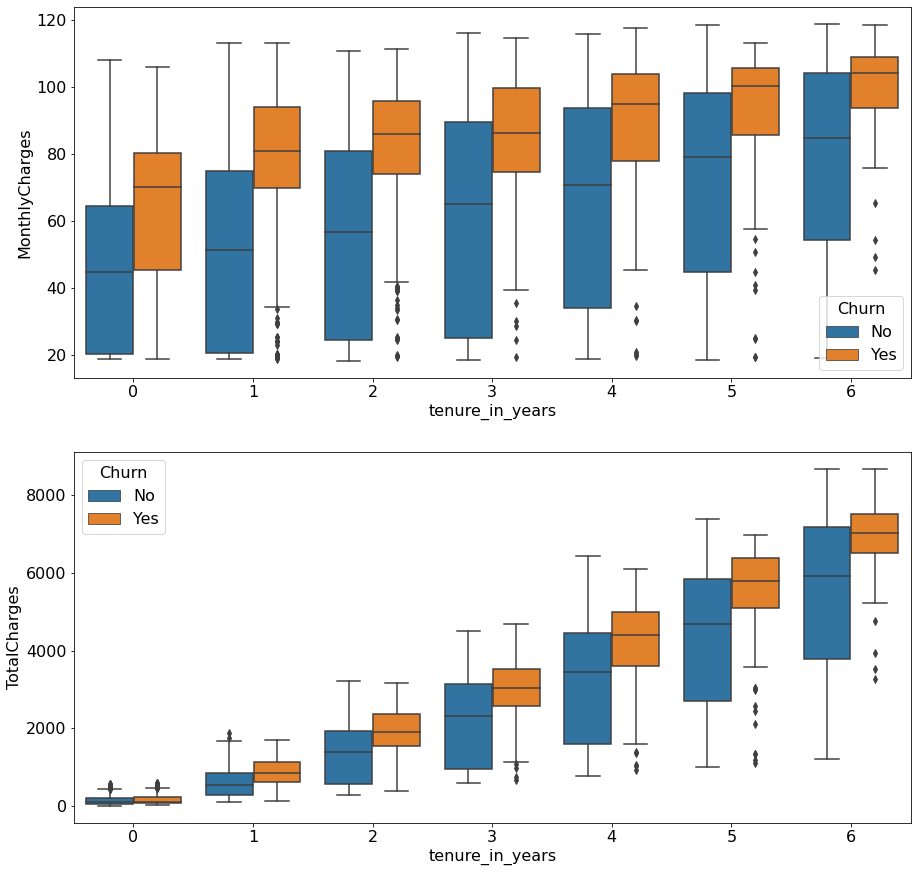

In [13]:
#Проверим, каким образом зависит ежемесячный платеж от срока пользования услугами. 
plt.rcParams['figure.figsize'] = (15,15)
fgi, axs = plt.subplots(nrows = 2)
ax = axs[0]
main_df['tenure_in_years'] = main_df.tenure.apply(lambda x: (round(x/12)))
sns.boxplot(data = main_df, x='tenure_in_years', y='MonthlyCharges', hue= 'Churn', ax =ax)
ax = axs[1]
sns.boxplot(data = main_df, x='tenure_in_years', y='TotalCharges', hue= 'Churn', ax =ax)
plt.show()

По полученным графикам можно сделать вывод, что для различных периодов пользования чаще уходят клиенты, которые вносят более высокую месячную плату, а следовательно и более высокую суммарную.

Судя по анализу зависимостей переменной Unnamed: 0 от остальных корреляция между данным признаком с остальными числовыми не значительна. Проверим это построим матрицу корреляций.

<AxesSubplot:>

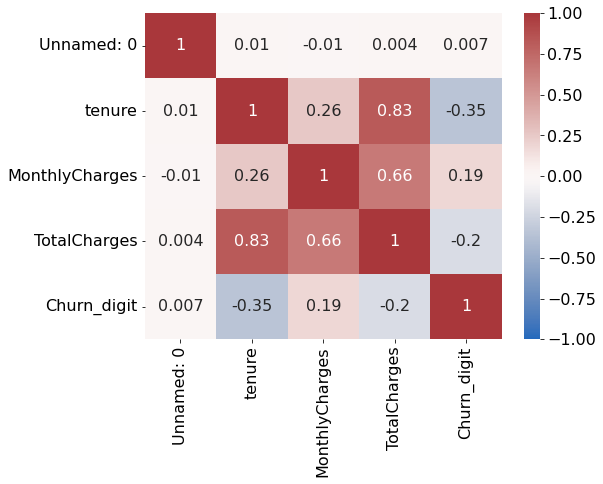

In [14]:
#Переведем целевую переменную в численный тип
main_df['Churn_digit'] = main_df['Churn'].map({'Yes':1,'No':0})
#Построим тепловую карту матрицы корреляций
plt.rcParams['figure.figsize'] = (8,6)
sns.heatmap(main_df[['Unnamed: 0','tenure','MonthlyCharges','TotalCharges','Churn_digit']].corr().round(decimals=3),
            cmap="vlag",
            vmin=-1,
            vmax=1,
            annot=True)

Действительно, данный признак имеет наименьший коэффициент корреляции со всеми числовыми переменными.

### 2.2 Исследуем категориальные признаки

In [15]:
main_df.describe(include = object)

customerID gender Partner Dependents PhoneService MultipleLines  \
count         5986   5986    5986       5986         5986          5986   
unique        5986      2       2          2            2             3   
top     7010-BRBUU   Male      No         No          Yes            No   
freq             1   3050    3082       4195         5396          2848   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             5986           5986         5986             5986   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              2627           2982         2605             2640   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         5986        5986            5986            5986   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          2960        2389            2356            3269   

       PaperlessBilling     PaymentMethod Churn  
count              5986              5986  5986  
unique                2                 4     2  
top                 Yes  Electronic check    No  
freq               3528              2006  4399

In [16]:
#Далее последовательно проверим каждый категориальный признак на связь с целевой переменной

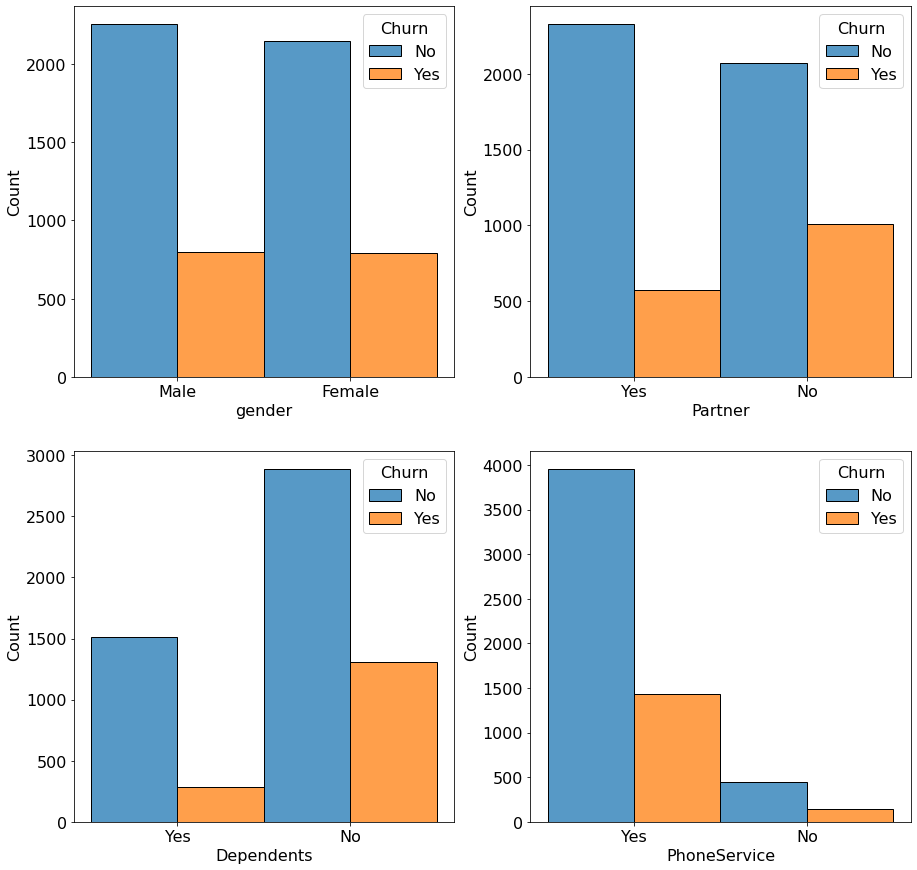

In [17]:
#Построим гистограммы для бинарных признаков
binary_features = ['gender','Partner','Dependents','PhoneService']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (15,15))

for i, feature in enumerate(np.reshape(binary_features,(2,2))):
    ax = axs[i]
    sns.histplot(data = main_df, x=feature[0], hue='Churn', multiple = 'dodge', ax=ax[0])
    sns.histplot(data = main_df, x=feature[1], hue='Churn', multiple = 'dodge', ax=ax[1])

Предварительно можно сказать, что признаки gender и PhoneService слабо влияют на целевую переменную, в то время как влияение признаков Dependents и Partner более заметно

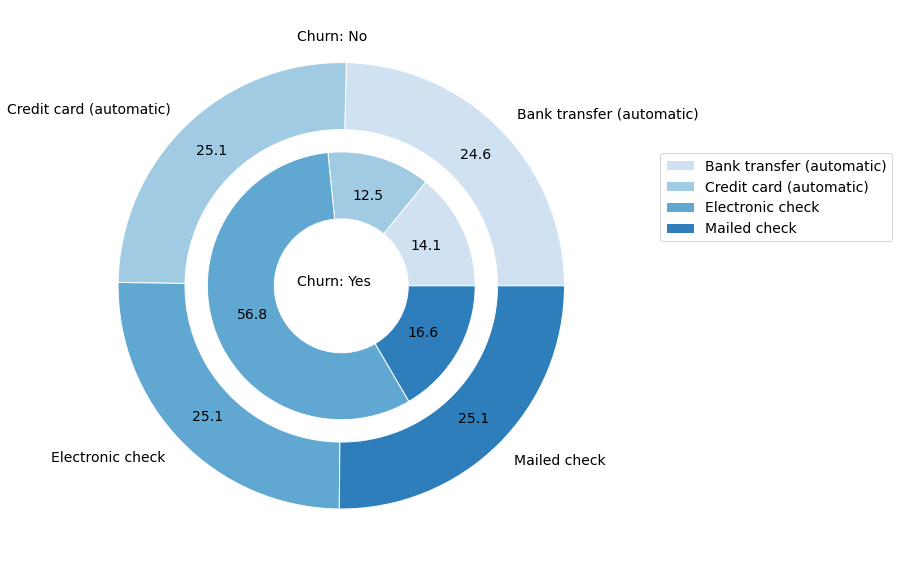

In [18]:
#Построим круговые диаграммы для различных способов оплаты услуг
plt.rcParams['font.size'] = 14
fig, ax = plt.subplots(figsize=(10,14))
data=main_df[main_df['Churn_digit']==0].groupby(['PaymentMethod','Churn_digit'], as_index=False).count()
# cmap = cm.get_cmap('winter', 256)
# colors = cmap([10,20,30,40])
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, 4))
patches, texts, autotexts = ax.pie(data.iloc[:,2], labels=data.PaymentMethod, autopct = '%.1f',\
                                    wedgeprops=dict(width=0.3, edgecolor='w'), normalize = True, colors=colors)

for i in range(len(autotexts)):
    x , y = autotexts[i].properties()['unitless_position']
    plt.setp(autotexts[i], x=x*1.4, y=y*1.4)
data = main_df[main_df['Churn_digit']==1].groupby(['PaymentMethod','Churn_digit'], as_index=False).count()
patches, texts, autotexts = ax.pie(data.iloc[:,2], labels=None, autopct = '%.1f',\
                                    wedgeprops=dict(radius=0.6,width=0.3, edgecolor='w'), normalize = True, colors=colors)#, colors=colors)
for i in range(len(autotexts)):
    x , y = autotexts[i].properties()['unitless_position']
    plt.setp(autotexts[i], x=x*0.7, y=y*0.7)
ax.legend(loc='best', bbox_to_anchor=(1, 0.25, 0.5, 0.5))
ax.text(-0.2, 1.1, 'Churn: No')
ax.text(-0.2, 0.0, 'Churn: Yes')
plt.show()

Из диаграмм явно видно, что доля ушедших клиентов, предпочитающих электронный чек, значительно выделяется, в то время как среди оставшихся клиентов доли всех мтеодов примерно одинаковы. Поскльку для данного признака распределения получились различны, данный признак cтоит включить для обучения модели.

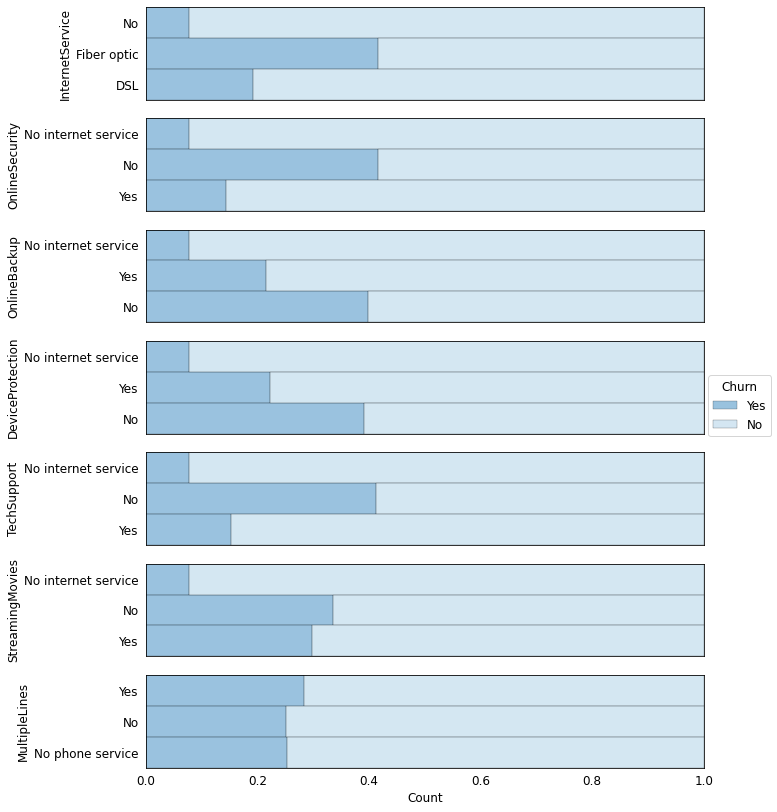

In [19]:
#Построим гистограммы для признаков, состоящих из 3-х различных вариантов
plt.rcParams['font.size'] = 12
features_of_3 = ['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','MultipleLines', 'Churn']
fig, axs = plt.subplots(nrows=7, ncols=1, sharex=True, figsize=(10,14))
for feature, i in zip(features_of_3, [j for j in range(7)]):
    data = main_df[features_of_3]
    ax=axs[i]
    sns.histplot(data=data, y=feature, hue='Churn', ax=ax, multiple="fill", legend=False, palette='Blues', alpha = 0.5, linewidth=0.2)
    ax.tick_params(width=0)
fig.legend(['Yes', 'No'], loc=7, title='Churn')
plt.show()

Явные различия в зависимости от того остался клиент или ушел наблюдаются практически для всех признаков за исключением MultipleLines. 

### 2.3 Преобразуем признаки

Существует несколько признаков, содержащих значения Yes, No либо No internet service, которые нужно преобразовать в 
численные значения, причем, для классификатора желательно только в 0 или 1. Для поставленной задачи
No internet service может быть выделено как отдельный признак, это позволить уменьшить кол-во возможных значений 
в рассматриваемых признаках до 2-х(0 - No или 1 - Yes), при этом мы не потеряем информацию об клиентах, 
у которых услуга доступа в интернет отсутствует.

In [20]:
main_df['Is_internet_service'] = np.where(main_df.InternetService == 'No',0,1)
main_df[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']] = \
main_df[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]\
.replace({'No internet service':0,'No':0, 'Yes':1})

In [21]:
#Преобразуем оставшиеся категориальные признаки,  с помощью метода get_dummies. 
final_df = pd.get_dummies(data=main_df,columns=['MultipleLines','InternetService','Contract','PaymentMethod'])
final_df.replace({'Yes':1, 'No':0}, inplace=True)
final_df.gender=final_df.gender.replace({'Male':1, 'Female':0})
final_df.drop(columns='customerID', inplace=True)
final_df.head(5)

Unnamed: 0  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        1869       1              0        1           1      72   
1        4528       0              0        0           0      44   
2        6344       0              1        1           0      38   
3        6739       1              0        0           0       4   
4         432       1              0        0           0       2   

   PhoneService  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0             1               0             0                 0  ...   
1             1               0             1                 1  ...   
2             1               0             0                 0  ...   
3             1               0             0                 0  ...   
4             1               1             0                 1  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    0                            0                   1   
1                    0                            1                   0   
2                    0                            1                   0   
3                    1                            0                   0   
4                    1                            0                   0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        0                  0                  1   
1                        1                  0                  0   
2                        1                  0                  0   
3                        1                  0                  0   
4                        1                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        1   
3                                        0   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      1                               0   
1                                      1                               0   
2                                      0                               0   
3                                      0                               1   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 33 columns]

In [22]:
#Настроим параметры отображения, чтобы показывались все столбцы, и выведем таблицу с коэф. корреляции
pd.set_option('display.max_columns', None)
corr_table = final_df.corr().round(decimals=3)
corr_table

Unnamed: 0  gender  SeniorCitizen  \
Unnamed: 0                                    1.000  -0.007         -0.000   
gender                                       -0.007   1.000         -0.007   
SeniorCitizen                                -0.000  -0.007          1.000   
Partner                                      -0.001  -0.008          0.015   
Dependents                                   -0.008   0.009         -0.214   
tenure                                        0.010   0.003          0.005   
PhoneService                                 -0.024  -0.005          0.009   
OnlineSecurity                                0.005  -0.022         -0.038   
OnlineBackup                                 -0.001  -0.019          0.064   
DeviceProtection                             -0.007  -0.005          0.062   
TechSupport                                   0.012  -0.010         -0.061   
StreamingTV                                   0.001  -0.010          0.103   
StreamingMovies                              -0.015  -0.009          0.117   
PaperlessBilling                              0.010  -0.014          0.156   
MonthlyCharges                               -0.010  -0.014          0.219   
TotalCharges                                  0.004  -0.004          0.094   
Churn                                         0.007  -0.010          0.150   
tenure_in_years                               0.009   0.005          0.006   
Churn_digit                                   0.007  -0.010          0.150   
Is_internet_service                           0.007  -0.005          0.185   
MultipleLines_No                              0.004  -0.002         -0.126   
MultipleLines_No phone service                0.024   0.005         -0.009   
MultipleLines_Yes                            -0.018  -0.001          0.133   
InternetService_DSL                           0.015   0.007         -0.108   
InternetService_Fiber optic                  -0.009  -0.011          0.256   
InternetService_No                           -0.007   0.005         -0.185   
Contract_Month-to-month                      -0.005  -0.005          0.142   
Contract_One year                             0.002   0.016         -0.041   
Contract_Two year                             0.005  -0.010         -0.126   
PaymentMethod_Bank transfer (automatic)      -0.018  -0.017         -0.013   
PaymentMethod_Credit card (automatic)        -0.008   0.002         -0.029   
PaymentMethod_Electronic check                0.009   0.007          0.171   
PaymentMethod_Mailed check                    0.016   0.008         -0.150   

                                         Partner  Dependents  tenure  \
Unnamed: 0                                -0.001      -0.008   0.010   
gender                                    -0.008       0.009   0.003   
SeniorCitizen                              0.015      -0.214   0.005   
Partner                                    1.000       0.449   0.382   
Dependents                                 0.449       1.000   0.164   
tenure                                     0.382       0.164   1.000   
PhoneService                               0.025      -0.001   0.010   
OnlineSecurity                             0.153       0.085   0.332   
OnlineBackup                               0.149       0.022   0.358   
DeviceProtection                           0.153       0.009   0.364   
TechSupport                                0.125       0.067   0.329   
StreamingTV                                0.130      -0.019   0.285   
StreamingMovies                            0.121      -0.039   0.297   
PaperlessBilling                          -0.018      -0.112   0.007   
MonthlyCharges                             0.104      -0.116   0.257   
TotalCharges                               0.321       0.063   0.828   
Churn                                     -0.147      -0.160  -0.348   
tenure_in_years                            0.383       0.166   0.992   
Churn_digit         

In [23]:
#Отсортируем коэффициенты корреляции целевой переменной относительно всех признаков, а также возьмем модуль от коэффициента
#корреляции, чтобы оценить ее степень
corr_table = corr_table.apply(lambda x: abs(x))
corr_table.reset_index(inplace=True)#.sort_values('Churn', inplace=True, ascending=False)
px.bar(data_frame = corr_table[~corr_table['index'].isin(['Churn', 'Churn_digit'])]\
       .sort_values('Churn'), x='Churn', y='index', orientation = 'h', height = 700,\
       labels = {'Churn':'Коэффициент корреляции', 'index':'Признак'})

Большая часть признаков имеет умеренную, слабую, либо очень слабую корреляцию. Особенно выделяются признак пола, услуги телефона и безымянной переменной.

<AxesSubplot:>

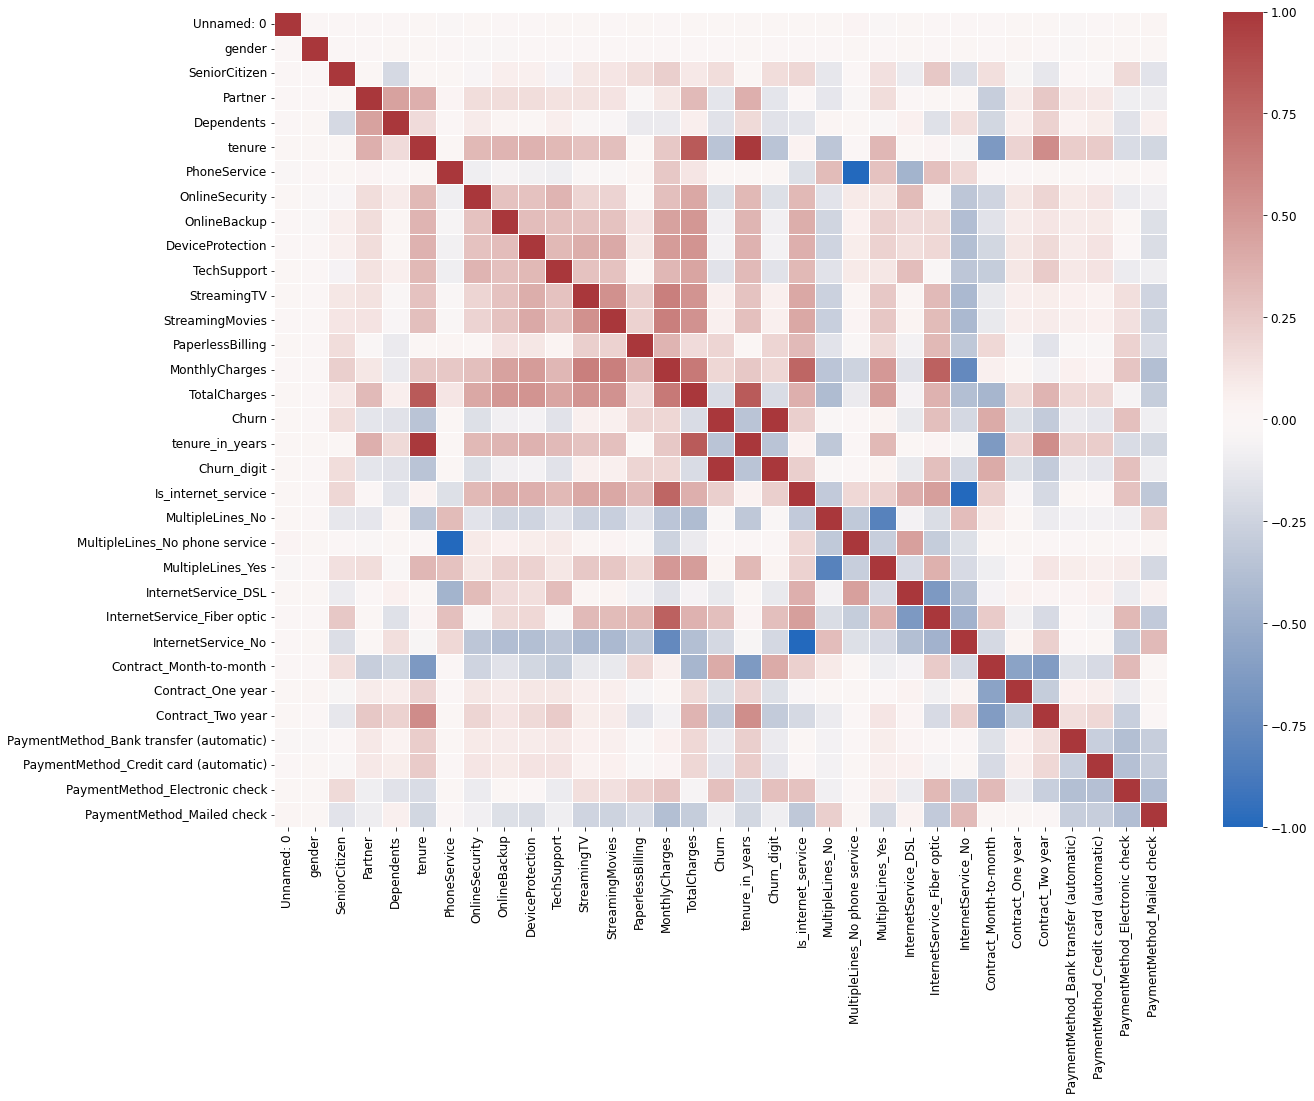

In [24]:
#Построим тепловую карту
plt.rcParams['figure.figsize'] = 20,15
sns.heatmap(final_df.corr(),cmap="vlag", vmin=-1, vmax=1,linewidths=.5)

Анализируя тепловую карту можно сделать вывод, что признаки gender и unnamed не только оказывают влияния на целевую переменную, но также крайне слабо коррелируют с остальными признаками, соответственно, данные признаки следует исключить. Признак наличия телефона коррелирует с некоторыми другими признаками, что может помочь моделям машинного обучения, поэтому его на данном этапе стоит оставить. Данный признак дублируется с MultipleLines_No phone service, поэтому удалим только его. 

In [25]:
final_df.drop(columns=['Unnamed: 0','MultipleLines_No phone service','gender', 'Churn_digit'], inplace = True)

# 3. Построение моделей для прогнозирования оттока

### 3.1 Импорт библиотек и подготовка данных

In [26]:
#Создадим глубокую копию итогового дата фрэйма, поскольку будем исследовать влияние на результат в том числе его изменение
data = final_df.copy(deep = True)

In [27]:
#Импортируем необходимые библиотке для машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV, cross_validate
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay,\
classification_report, auc, PrecisionRecallDisplay, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
import eli5
from catboost import CatBoostClassifier 
import optuna
import graphviz
from lightgbm import LGBMClassifier

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [28]:
#Выделяем целевую переменную
target = data.pop('Churn') 

In [29]:
#Подготовим преобразованные данные для использования в соответствующих моделях, поскольку во многих
#моделях рекомендуется использовать отмасштабируемые данные, подготовим тренировочные выборки с использованием
#StandardScaler() и MinMaxScaler()
stand_scal = StandardScaler()
min_max_scal = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=17, stratify=target)
X_train_st_sc = stand_scal.fit_transform(X_train)
X_train_min_max_sc = min_max_scal.fit_transform(X_train)

## 3.2 Использование одиночных моделей

In [30]:
#В качестве моделей будем использовать модель логистической регрессии, линейного SVC, ядерного SVC, дерево решений, 
#наивный байесовский классификатор и метод к ближайших соседей 
#Определяем модели и подготавливаем наборы параметров

lr = LogisticRegression()
lr_params = {'C': np.logspace(-1,2,4), 'random_state': [17], 'penalty':['l2'],
             'class_weight':['balanced']} #Везде, где это возможно будем использовать сбалансированный вес, т.к.
                                          #выборка не сбалансирована

lsvc = LinearSVC()
lsvc_params = {'C': np.logspace(-1,2,4), 'random_state': [17],
              'class_weight':['balanced']}

svc = SVC()
svc_params = {'C': np.logspace(-1,2,4),
              'kernel': ['rbf', 'poly'], 'degree': [2,3], 'gamma':['auto','scale'], 'random_state': [17],
              'class_weight':['balanced']}

dtc = DecisionTreeClassifier()
dtc_params = {'max_depth': range(2, 21, 2), 'max_features': range(2, 36, 2), 'random_state': [17],
              'class_weight':['balanced']}

gnb = GaussianNB()
gnb_params = {'var_smoothing': [1e-9]}

knc = KNeighborsClassifier()
knc_params = {'n_neighbors':range(1,16,2), 'weights':['uniform']}



models = [lr, lsvc, svc, dtc, gnb, knc]
models_params = [lr_params, lsvc_params, svc_params, dtc_params, gnb_params, knc_params]

In [31]:
#Создаем экземпляр для перекрестной проверки
skf = StratifiedKFold(n_splits=10, random_state=17, shuffle = True)

In [32]:
#Визуализируем данные в двумерных координатах, предварительно снизив размерность с помощью PCA, t-sne и SVD
#Получаем данные пониженной размерности
pca = PCA(n_components=2, random_state=17)
tsne = TSNE(n_components=2, random_state=17)
svd = TruncatedSVD(n_components=2, random_state=17)
X_pca = pca.fit_transform(X_train_min_max_sc)
X_tsne = tsne.fit_transform(X_train_min_max_sc)
X_svd = svd.fit_transform(X_train_min_max_sc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



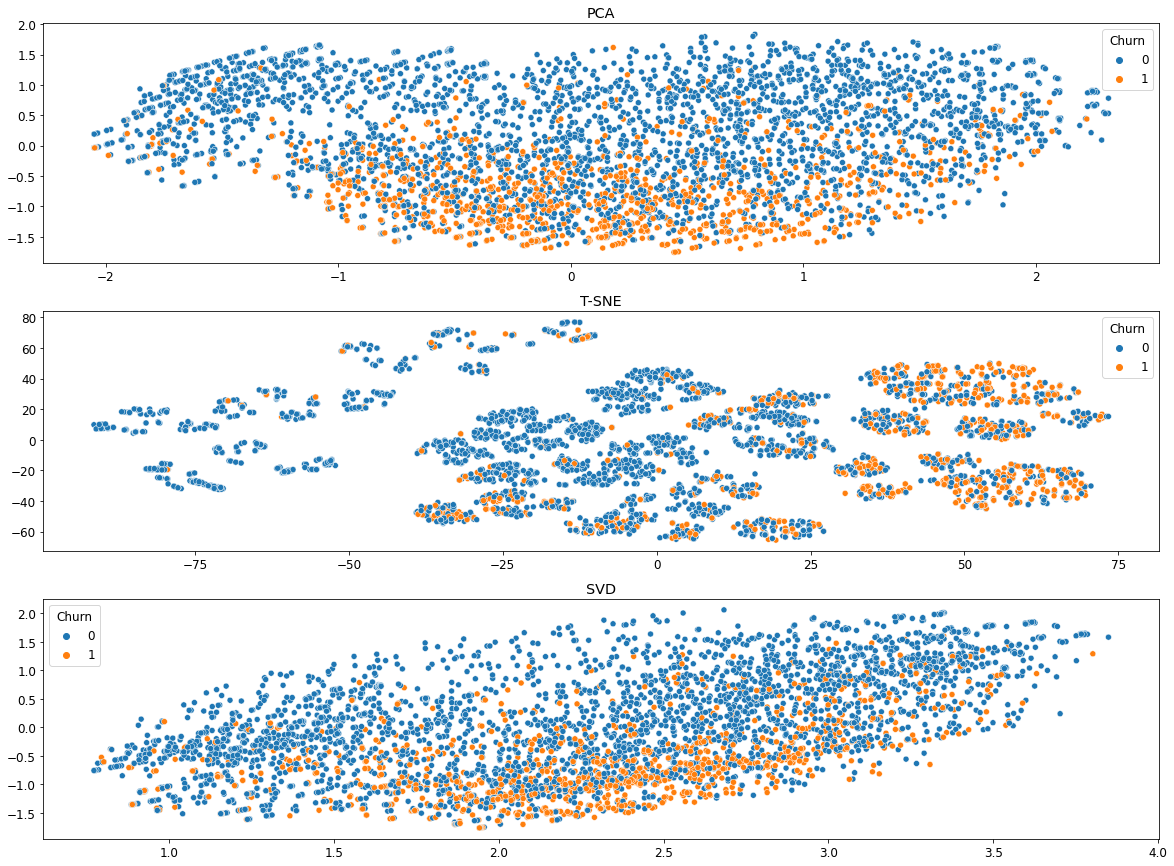

In [33]:
#Визуализируем
fig, axs = plt.subplots(nrows=3, ncols=1)
names=['PCA', 'T-SNE', 'SVD']
for i, X_vis in enumerate([X_pca, X_tsne, X_svd]):
    sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], ax=axs[i], hue=y_train)
    axs[i].set_title(names[i])

По построенным графикам можно сделать вывод, что при использовании PCA и SVD данные в принципе разделяются хорошо, однако присутствует много шумов, которые для поставленной задачи в принципе логичны, однако постараемся их уменьшить путем отбора признаков, которые будут вносить малый вклад в результат классификатора. T-SNE же применительно к рассматриваемому набору данных показал результат хуже.

#### Выбор метрики
Поскольку выборка
не сбалансирована, то в качестве метрики лучше roc-auc 

In [34]:
%%time
#Используя решетчатый поиск с перекрестной проверкой подберем наилучшие параметры обучения моделей, 
#наилучшие параметры будем выбирать максимизируя полноту, однако для контроля точности также будем сохранять
#значения точности
grid_search_objs = []
for model, model_params in zip(models, models_params):
    print(model)
    if model == lr: #Используем масштабируемые с помощью StandardScaler данные
        grid_search_obj = GridSearchCV(estimator = model, param_grid = model_params, cv = skf, n_jobs=-1, scoring=['roc_auc','recall','precision'], refit='roc_auc')
        grid_search_obj.fit(X_train_st_sc, y_train)
        grid_search_objs.append(grid_search_obj)
    elif model in [lsvc, svc, gnb, knc]: #Используем масштабируемые с помощью MinMaxScaler данные
        grid_search_obj = GridSearchCV(estimator = model, param_grid = model_params, cv = skf, n_jobs=-1, scoring=['roc_auc','recall','precision'], refit='roc_auc')
        grid_search_obj.fit(X_train_min_max_sc, y_train)
        grid_search_objs.append(grid_search_obj)
    else: #В остальных моделях(дерево решений и случайны лес) масштабирование данных не требуется
        grid_search_obj = GridSearchCV(estimator = model, param_grid = model_params, cv = skf, n_jobs=-1, scoring=['roc_auc','recall','precision'], refit='roc_auc')
        grid_search_obj.fit(X_train, y_train)
        grid_search_objs.append(grid_search_obj)

LogisticRegression()
LinearSVC()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



SVC()
DecisionTreeClassifier()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


300 fits failed out of a total of 1700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be i

GaussianNB()
KNeighborsClassifier()
Wall time: 2min 14s


In [35]:
#Подготовим данные для визуализации
all_model_df=pd.DataFrame()
models=[]
best_roc_auc=[]
best_recalls=[]
best_precisions=[]
for grid in grid_search_objs:
    grid_df = pd.DataFrame(pd.DataFrame(grid.cv_results_))
    model = pd.Series([str(grid.estimator) for i in range(grid_df.shape[0])], name = 'models')
    grid_df['models']=model
    all_model_df =pd.concat([all_model_df,grid_df])
    models.append(grid.estimator)
    best_roc_auc.append(np.nanmax(grid.cv_results_["mean_test_roc_auc"]))
    best_recalls.append(np.nanmax(grid.cv_results_["mean_test_recall"]))
    best_precisions.append(np.nanmax(grid.cv_results_["mean_test_precision"]))
best_metrics=pd.DataFrame({'models':models,'best_roc_auc':best_roc_auc,'best_recalls':best_recalls, 'best_precisions':best_precisions})

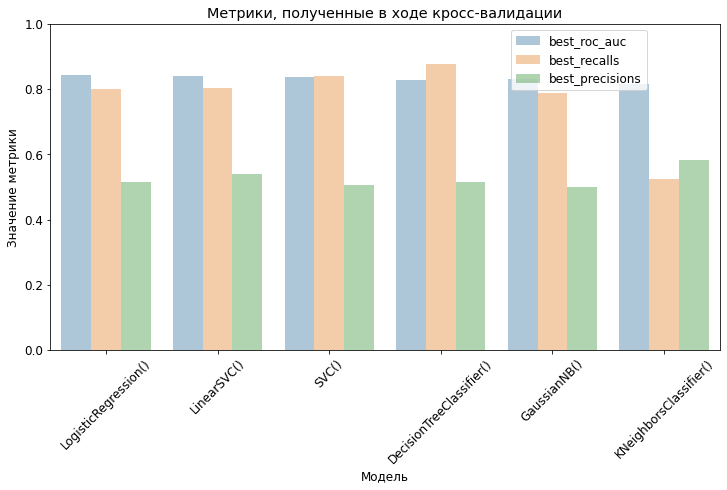

In [36]:
#Визуализируем максимальные значения roc_auc, полноты и точности для каждой из моделей 
models_vis=best_metrics.melt(id_vars='models',value_vars=['best_roc_auc','best_recalls','best_precisions'])
models_vis.models=models_vis.models.apply(str)
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=models_vis, x='models', y='value', hue='variable', ax=ax, alpha=0.4)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Значение метрики')
ax.set_ylim(0,1)
ax.set_xlabel('Модель')
ax.legend(bbox_to_anchor=(0.4, 0.4, 0.5, 0.6))
ax.set_title('Метрики, полученные в ходе кросс-валидации')
plt.show()

Как видно из результатов, большая часть классификаторов позволяют обеспечить полноту выше 0.8, при этом значение roc-auc также высоки. Стоит отметить низкие значения точности, что по возможности нужно будет исправить. 

<AxesSubplot:xlabel='mean_test_precision', ylabel='mean_test_recall'>

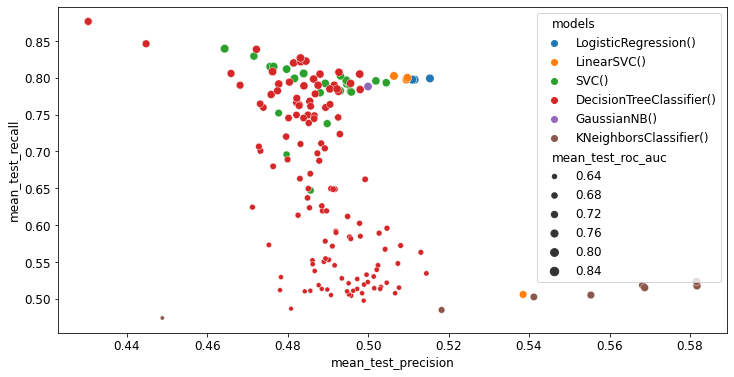

In [37]:
#Построим в координатах полноты и точности результаты перекрестной проверки модели для всех комбинаций параметров
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=all_model_df, x='mean_test_precision', y='mean_test_recall', hue='models', ax=ax, s=25, size='mean_test_roc_auc')

Как видно из графика, для ряда моделей максимальным значениям полноты (порядка 0.8 - 0.9) соответствуют значения точности около 0.52, что в целом не так плохо, так как данные значения точности близки к максимально полученным в ходе кросс-валидации.

In [38]:
#Визуализируем коэффициенты в линейных моделях
fig = px.bar(x=grid_search_objs[0].best_estimator_.coef_[0], y=X_train.columns, orientation='h', range_x=(-1,1), barmode='group', height=800)
fig.add_trace(go.Bar(x=grid_search_objs[1].best_estimator_.coef_[0], y=X_train.columns, orientation='h'))
fig.data[0].showlegend = True
fig.data[0].name=str(grid_search_objs[0].estimator)[:-2]
fig.data[1].name=str(grid_search_objs[1].estimator)[:-2]
fig.layout.xaxis.title.text = 'Коэффициент'
fig.layout.yaxis.title.text = 'Признаки'
fig.show()

Из графика видно, что у моделей логистической регрессии и линейного метода опорных векторов коэффициенты перед признакими довольно похожи. Явно выделяются признаки **tenure, Total charges, и признаки различных типов контрактов**. 

In [39]:
#Построим важность признаков для дерева решений
df_dtc_results = pd.DataFrame({'Признаки':X_train.columns, 'Важность':grid_search_objs[3].best_estimator_.feature_importances_})
df_dtc_results=df_dtc_results.query('`Важность`>0').sort_values('Важность', ascending=False)
px.bar(data_frame=df_dtc_results, x='Важность', y='Признаки', title='Важность признаков дерева решений')


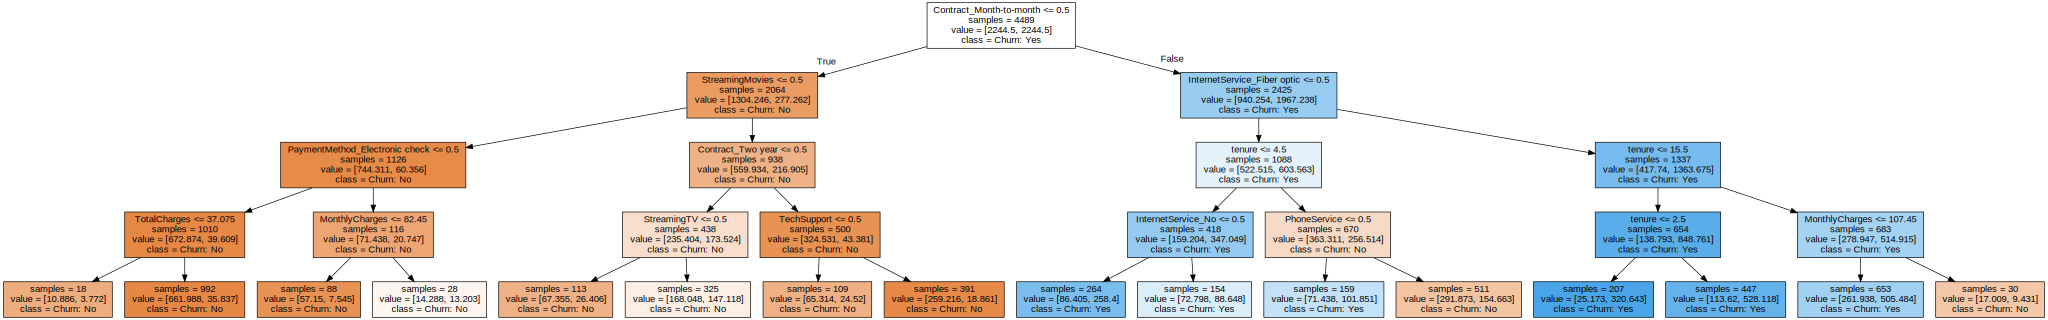

In [40]:
#Также визуализируем дерево
export_graphviz(grid_search_objs[3].best_estimator_,\
                out_file="tree.dot",\
                class_names=["Churn: No", "Churn: Yes"],\
                feature_names=X_train.columns,\
                impurity=False,\
                filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Из всех признаков при построении дерева использовалось **12**, наибольшую важность имеют признаки tenure, Fiber_optic и nonth_to_month_contract

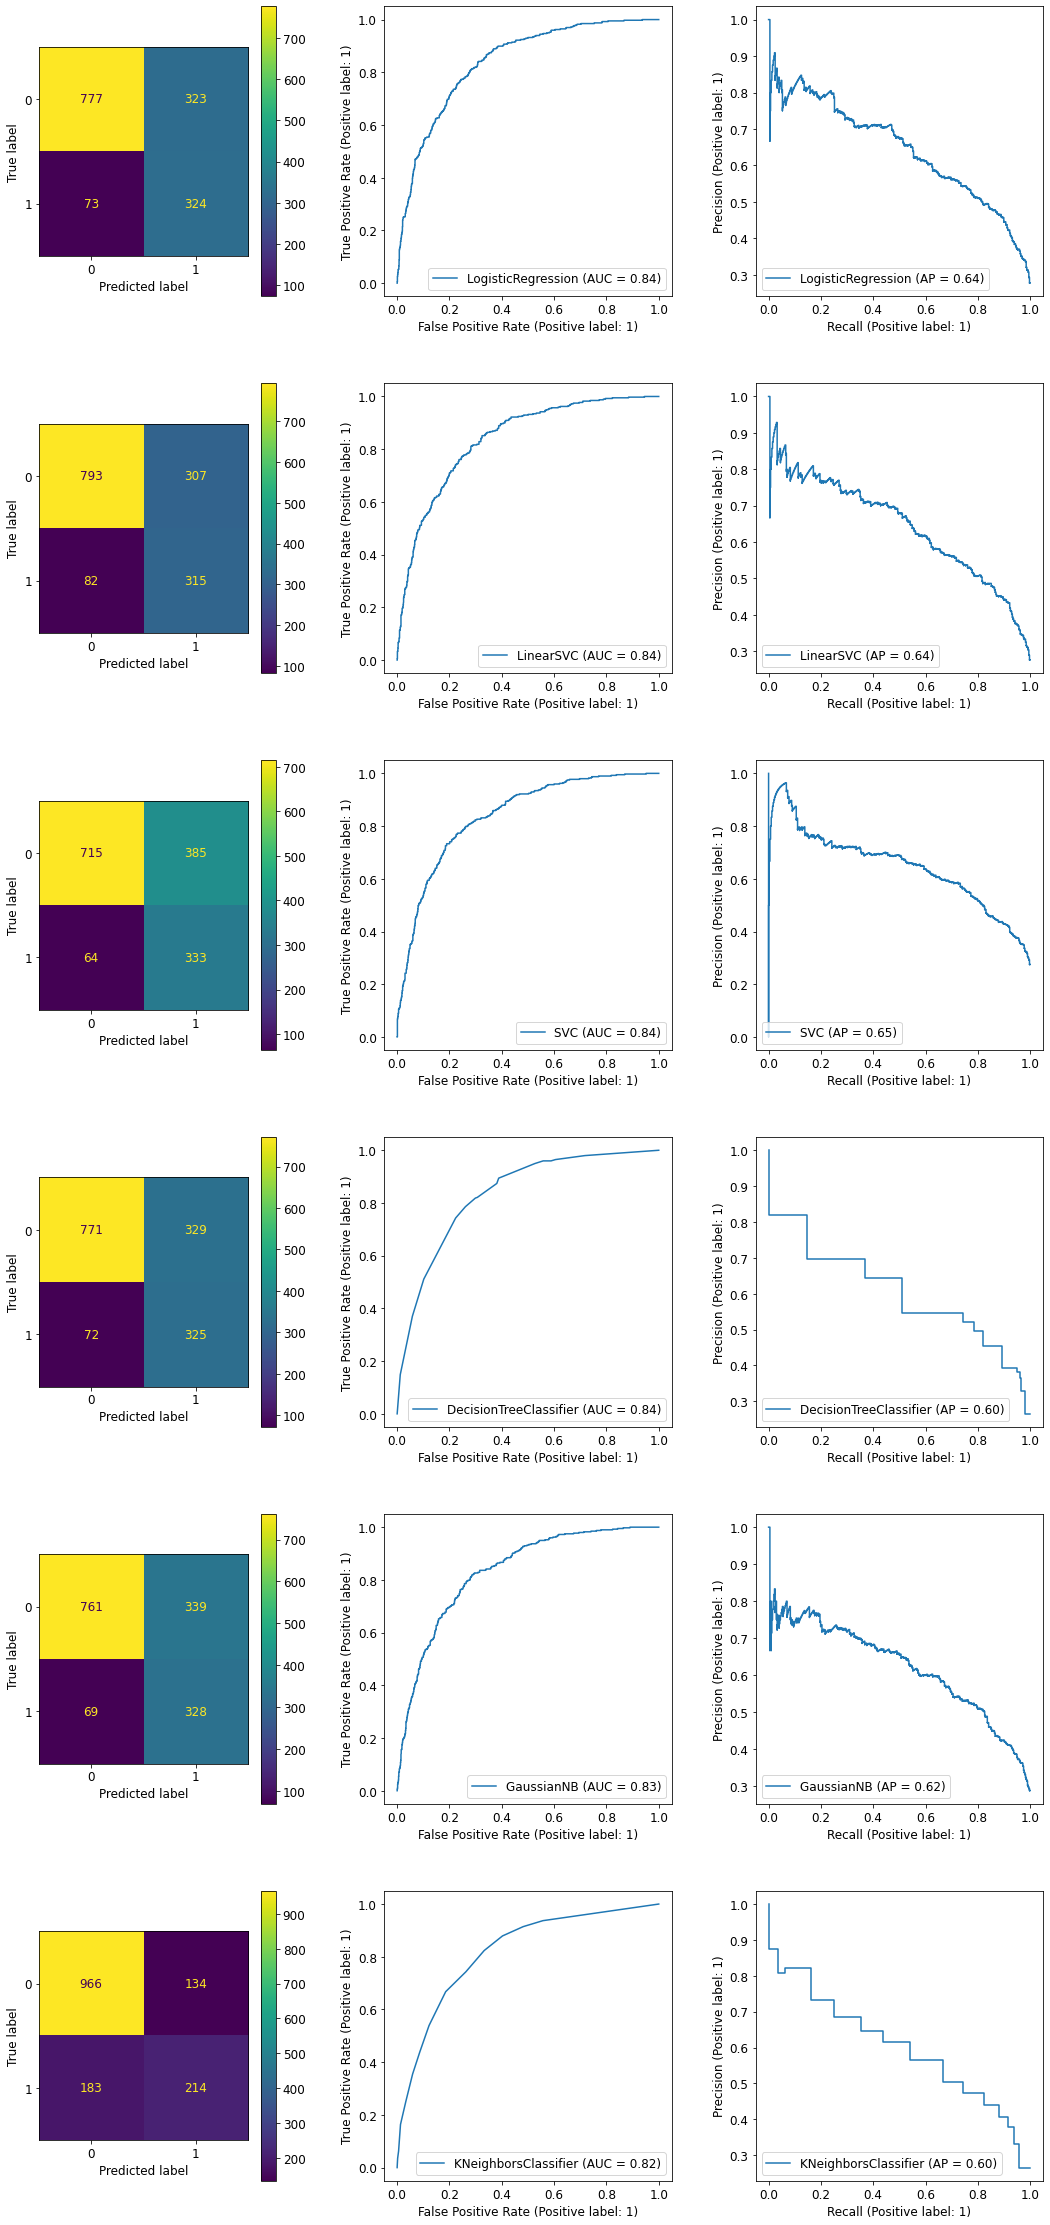

In [41]:
#Проверим модели на тестовых данных и визуализируем метрики
recals = []
precisions = []
models_names = []
#Настраиваем график
fig, axs = plt.subplots(nrows=len(grid_search_objs), ncols=3, figsize=(18,40), gridspec_kw = {'width_ratios':[1.0,1.1,1.1]})
plt.subplots_adjust(wspace=0.3, hspace=0.3)
# plt.rcParams['figure.figsize']=8,8
#Получаем тестовые выборки с использованием ранее обученных объектов масштабирования
X_test_st_sc = stand_scal.transform(X_test)
X_test_min_max_sc = min_max_scal.transform(X_test)
scaled_models = ['LinearSVC()','SVC()','GaussianNB()','KNeighborsClassifier()']
#В цикле по каждой модели строим графики и рассчитываем метрики
for i, model in enumerate(grid_search_objs):
    model_name = str(model.estimator)
    if model_name == 'LogisticRegression()':
        Xtest_vis = X_test_st_sc
    elif model_name in scaled_models:
        Xtest_vis = X_test_min_max_sc
    else:
        Xtest_vis = X_test
    y_pred = model.predict(Xtest_vis)
    recals.append(recall_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    models_names.append(model_name)
    cmtrx = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    cmtrx.plot(ax=axs[i][0])
    fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=model.classes_[1])
    roc_auc = auc(fpr, tpr)
    roc_display = RocCurveDisplay.from_estimator(model.best_estimator_, Xtest_vis, y_test, ax = axs[i][1])
    display = PrecisionRecallDisplay.from_estimator(model.best_estimator_, Xtest_vis, y_test,ax = axs[i][2])

На тестовых данных значение площади под кривой ошибок для классификаторов логистическая регрессия, линейный svc, svc, дерево решений составила **0.84**. Для наивного баесовского классификатора **0.83**, для метода к ближайших соседей **0.82**. Однако средняя доля правильных ответов(AP) наибольшей оказалась для svc.(**0.65**), что объясняется бОльшим кол-вом правильно определенных объектов класса 1, однако ошибочно определенных класса 1, которые на самом деле являются классом 0, также больше, откуда аналогичное значение roc-auc по сравнению с другими классификаторами.

## 3.3 Применение моделей на основе ансамблей

In [42]:
#Подготовим модели на основе ансамбевых моделей библиотеки sklearn
base_estimator_1 = DecisionTreeClassifier(class_weight='balanced', 
                                          max_depth=1,
                                          max_features=4,
                                          random_state=17)
base_estimator_2 = DecisionTreeClassifier(class_weight='balanced', 
                                          max_depth=1,
                                          max_features=6,
                                          random_state=17)
base_estimator_3 = DecisionTreeClassifier(class_weight='balanced', 
                                          max_depth=1,
                                          max_features=8,
                                          random_state=17)
base_estimator_4 = DecisionTreeClassifier(class_weight='balanced', 
                                          max_depth=2,
                                          max_features=4,
                                          random_state=17)
base_estimator_5 = DecisionTreeClassifier(class_weight='balanced', 
                                          max_depth=2,
                                          max_features=6,
                                          random_state=17)
base_estimator_6 = DecisionTreeClassifier(class_weight='balanced', 
                                          max_depth=2,
                                          max_features=8,
                                          random_state=17)

rfc = RandomForestClassifier()
rfc_params = {'n_estimators': [50,100], 
              'max_depth': range(2, 21, 6),
              'max_features': range(2, 23, 4),
              'random_state': [17], 
              'criterion':['gini', 'entropy'],
              'class_weight':['balanced'],
              }

ada = AdaBoostClassifier()
ada_params = {'n_estimators': [100,200],
              'learning_rate': [0.01, 0.1, 1, 10, 100],
              'base_estimator' :[
                  base_estimator_1, 
                  base_estimator_2, 
                  base_estimator_3, 
                  base_estimator_4,
                  base_estimator_5,
                  base_estimator_6
              ]}

gbc = GradientBoostingClassifier()
gbc_params = {'learning_rate': [0.01, 0.1, 1, 10, 100], 
              'n_estimators': [50,100],
              'max_depth':range(2, 15, 6), 
              'min_samples_split': [2,6],
             }

In [43]:
%%time
#Подберем наилучшие параметры используя аналогичный критерий, как и с одиночными моделями
grid_search_objs_ensembles=[]
ensemble_models = [rfc, ada, gbc]
ensemble_models_params = [rfc_params, ada_params, gbc_params]
for model, model_params in zip(ensemble_models, ensemble_models_params):
    print(model)
    grid_search_obj = GridSearchCV(estimator = model, param_grid = model_params, cv = skf, n_jobs=-1, scoring=['roc_auc','recall','precision'], refit='roc_auc')
    grid_search_obj.fit(X_train, y_train)
    grid_search_objs_ensembles.append(grid_search_obj)

RandomForestClassifier()
AdaBoostClassifier()
GradientBoostingClassifier()
Wall time: 6min 49s


In [44]:
#Подготовим для визуализации полученные результаты 
ensemble_results=pd.DataFrame()
models_ensemble = pd.Series()
for ensemble_model in grid_search_objs_ensembles:
    ensemble_results = pd.concat([ensemble_results, pd.DataFrame(ensemble_model.cv_results_)])
    models_ensemble = pd.concat([models_ensemble, pd.Series([str(ensemble_model.estimator)[:-2] for i in range(pd.DataFrame(ensemble_model.cv_results_).shape[0])])])

C:\Temp/ipykernel_12780/1397136063.py:3: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [45]:
#Визуализируем полученные результаты
px.scatter(data_frame=ensemble_results, 
           x='mean_test_precision', 
           y='mean_test_recall', 
           color=models_ensemble,
           hover_data=['mean_fit_time'],
           size='mean_test_roc_auc', size_max=10)

Как видим наибольшего значения roc-auc (порядка **0.82-0.84**) удалось добиться с использованием всех моделей, однако модели случайного леса и adaboost показывают лучшую полноту, а модель градиентного бустинга лучшую точность.

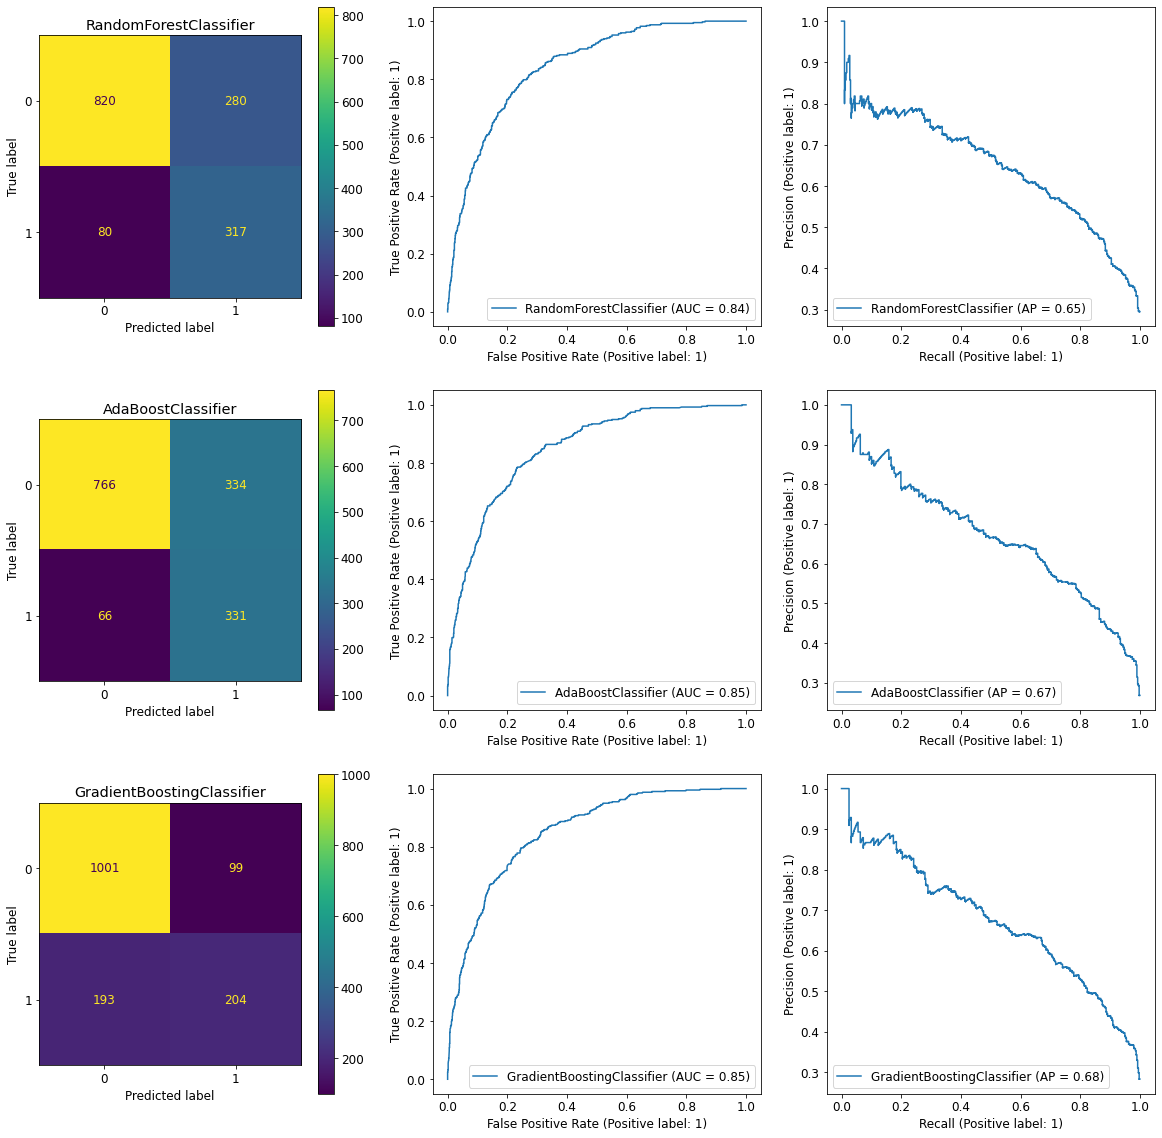

In [46]:
fig, axs = plt.subplots(ncols=3, nrows=3,figsize=(20,20))
for i, model in enumerate(grid_search_objs_ensembles):
    y_pred = model.predict(X_test)
#     models_names.append(model_name)
    cmtrx = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    cmtrx.plot(ax=axs[i][0])
    fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=model.classes_[1])
    roc_auc = auc(fpr, tpr)
    roc_display = RocCurveDisplay.from_estimator(model.best_estimator_, X_test, y_test, ax = axs[i][1])
    display = PrecisionRecallDisplay.from_estimator(model.best_estimator_, X_test, y_test,ax = axs[i][2])
    axs[i][0].set_title(f'{str(model.estimator)[:-2]}')

Как видно из результатов работы моделей на тестовых данных, модель случайного леса несколько уступает моделям adaboost и градиентного бустинга как в значение roc-auc, так и в значении средней доли правильных ответов.

In [47]:
#Построим важности признаков
feature_importances_df = pd.DataFrame()
for model in grid_search_objs_ensembles:
    feature_importances_df[f'{str(model.estimator)[:-2]}'] = model.best_estimator_.feature_importances_
    feature_importances_df.set_index(X_train.columns, inplace=True)
feature_importances_df = feature_importances_df[feature_importances_df!=0].dropna(how='all').fillna(0)

px.bar(data_frame=feature_importances_df, 
       x=feature_importances_df.columns,
       y=feature_importances_df.index, 
       height=600,
       labels={'value': 'Вес признака', 'index':'Признак'}, 
       barmode='relative')

С точки зрения важности признаком наблюдается аналогичная картина, как и с одиночными моделями, т.е. наиболее важными являются contract_month_tomonth, tenure и различные длительности контрактов.

## 3.4 Применение моделей на основе ансамблей из сторониих библиотек (не sklearn)

In [48]:
#Теперь попробуем достигнуть высокого roc-auc, спользуя более мощные модели
from xgboost import XGBClassifier
from sklearn.metrics import log_loss 
import optuna

In [49]:
#Оптимизируем параметры с помощью фрэймворка optuna
#Напишем функцию для xgb
def objective(trial, X, y):
    grid_params = {
        'objective': 'binary:logistic',
        'n_estimators': trial.suggest_int('n_estimators', 20, 400, step=20), 
        'max_depth': trial.suggest_int('max_depth', 2, 16, step=2),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.3),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 10),
        'importance_type': 'weight',
        
    }
    cv = KFold(n_splits=5, shuffle=True, random_state=17)   
    cv_results=np.empty(5)
    for i, (train_i, valid_i) in enumerate(cv.split(X, y)):
        X_train_i, X_valid_i = X_train.iloc[train_i], X_train.iloc[valid_i] 
        y_train_i, y_valid_i = y_train.iloc[train_i], y_train.iloc[valid_i]
        model = XGBClassifier(**grid_params,
                              eval_metric='auc',
                              use_label_encoder=False)
        model.fit(X=X_train_i, 
                  y=y_train_i, 
                  eval_set=[(X_valid_i, y_valid_i)],
                  verbose=True
                 )
        y_pred = model.predict(X_valid_i)
        cv_results[i] = roc_auc_score(y_valid_i, y_pred)
    return np.mean(cv_results)

In [50]:
#Проводим кросс-валидацию
study_xgb = optuna.create_study(direction='maximize', study_name = 'XGB')
func = lambda trial: objective(trial, X=X_train, y=y_train) 
study_xgb.optimize(func, n_trials=100, show_progress_bar=True, n_jobs=4)

[I 2022-07-12 23:32:05,524] A new study created in memory with name: XGB


[0]	validation_0-auc:0.76671
[1]	validation_0-auc:0.78934
[2]	validation_0-auc:0.79910
[0]	validation_0-auc:0.79693[0]	validation_0-auc:0.79693

[0]	validation_0-auc:0.81212
[3]	validation_0-auc:0.81376
[4]	validation_0-auc:0.81529
[5]	validation_0-auc:0.81836
[1]	validation_0-auc:0.80236
[6]	validation_0-auc:0.82303
[1]	validation_0-auc:0.81555
[1]	validation_0-auc:0.82219
[7]	validation_0-auc:0.82339
[8]	validation_0-auc:0.82741
[9]	validation_0-auc:0.82914[2]	validation_0-auc:0.81425

[2]	validation_0-auc:0.82048
[10]	validation_0-auc:0.83043
[2]	validation_0-auc:0.82340
[11]	validation_0-auc:0.83000
[12]	validation_0-auc:0.83039
[3]	validation_0-auc:0.82197
[3]	validation_0-auc:0.81969[13]	validation_0-auc:0.82967

[14]	validation_0-auc:0.83260
[3]	validation_0-auc:0.82959
[4]	validation_0-auc:0.82341
[15]	validation_0-auc:0.83307
[16]	validation_0-auc:0.83303
[4]	validation_0-auc:0.82229
[17]	validation_0-auc:0.83430
[18]	validation_0-auc:0.83500
[5]	validation_0-auc:0.82568
[4]	v

C:\ProgramData\Anaconda3\lib\site-packages\optuna\study\study.py:393: FutureWarning:

`n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.

C:\ProgramData\Anaconda3\lib\site-packages\optuna\study\_optimize.py:80: UserWarning:

Progress bar only supports serial execution (`n_jobs=1`).

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[27]	validation_0-auc:0.83686
[6]	validation_0-auc:0.83067
[28]	validation_0-auc:0.83682
[29]	validation_0-auc:0.83718
[8]	validation_0-auc:0.83086
[30]	validation_0-auc:0.83739
[8]	validation_0-auc:0.83301
[31]	validation_0-auc:0.83702
[7]	validation_0-auc:0.83022
[32]	validation_0-auc:0.83720
[9]	validation_0-auc:0.83081
[33]	validation_0-auc:0.83733
[9]	validation_0-auc:0.83227
[34]	validation_0-auc:0.83647
[35]	validation_0-auc:0.83680
[36]	validation_0-auc:0.83712[8]	validation_0-auc:0.83057

[10]	validation_0-auc:0.83358
[10]	validation_0-auc:0.83173
[37]	validation_0-auc:0.83682
[38]	validation_0-auc:0.83674
[39]	validation_0-auc:0.83698
[11]	validation_0-auc:0.83472
[11]	validation_0-auc:0.83235
[40]	validation_0-auc:0.83686
[41]	validation_0-auc:0.83660[9]	validation_0-auc:0.82949

[42]	validation_0-auc:0.83687
[43]	validation_0-auc:0.83666
[12]	validation_0-auc:0.83412
[44]	validation_0-auc:0.83663
[12]	validation_0-auc:0.83294
[45]	validation_0-auc:0.83640
[10]	validation_0-

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.




[25]	validation_0-auc:0.83305
[27]	validation_0-auc:0.85676
[25]	validation_0-auc:0.83176
[20]	validation_0-auc:0.82289
[28]	validation_0-auc:0.85682
[29]	validation_0-auc:0.85645
[26]	validation_0-auc:0.83392
[30]	validation_0-auc:0.85663
[26]	validation_0-auc:0.83138
[31]	validation_0-auc:0.85679
[32]	validation_0-auc:0.85677
[21]	validation_0-auc:0.82188
[33]	validation_0-auc:0.85674
[27]	validation_0-auc:0.83364
[34]	validation_0-auc:0.85719
[27]	validation_0-auc:0.83174
[35]	validation_0-auc:0.85712
[36]	validation_0-auc:0.85705
[37]	validation_0-auc:0.85687
[22]	validation_0-auc:0.82140
[28]	validation_0-auc:0.83354
[38]	validation_0-auc:0.85717
[28]	validation_0-auc:0.83154[39]	validation_0-auc:0.85724

[40]	validation_0-auc:0.85697
[41]	validation_0-auc:0.85686
[23]	validation_0-auc:0.82125
[29]	validation_0-auc:0.83382
[42]	validation_0-auc:0.85691
[43]	validation_0-auc:0.85689
[29]	validation_0-auc:0.83127
[44]	validation_0-auc:0.85685
[30]	validation_0-auc:0.83370
[45]	vali

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.




[21]	validation_0-auc:0.83227
[33]	validation_0-auc:0.81571
[22]	validation_0-auc:0.83302
[23]	validation_0-auc:0.83259
[24]	validation_0-auc:0.83297
[41]	validation_0-auc:0.83069[41]	validation_0-auc:0.83066

[25]	validation_0-auc:0.83298
[26]	validation_0-auc:0.83303
[34]	validation_0-auc:0.81556
[27]	validation_0-auc:0.83318
[42]	validation_0-auc:0.83030
[42]	validation_0-auc:0.83071[28]	validation_0-auc:0.83386

[29]	validation_0-auc:0.83428
[30]	validation_0-auc:0.83459
[31]	validation_0-auc:0.83503
[35]	validation_0-auc:0.81532
[43]	validation_0-auc:0.83000[43]	validation_0-auc:0.83034

[32]	validation_0-auc:0.83426
[33]	validation_0-auc:0.83426
[34]	validation_0-auc:0.83433
[44]	validation_0-auc:0.83015
[44]	validation_0-auc:0.82978
[35]	validation_0-auc:0.83467
[36]	validation_0-auc:0.81540
[36]	validation_0-auc:0.83487
[37]	validation_0-auc:0.83498
[45]	validation_0-auc:0.82993
[45]	validation_0-auc:0.83022[38]	validation_0-auc:0.83525

[39]	validation_0-auc:0.83551
[37]	vali

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[52]	validation_0-auc:0.80886[64]	validation_0-auc:0.82923

[36]	validation_0-auc:0.85050
[37]	validation_0-auc:0.85036
[67]	validation_0-auc:0.82830
[38]	validation_0-auc:0.85027
[65]	validation_0-auc:0.82953
[39]	validation_0-auc:0.85027
[53]	validation_0-auc:0.80869
[40]	validation_0-auc:0.85054
[68]	validation_0-auc:0.82825
[41]	validation_0-auc:0.85083
[42]	validation_0-auc:0.85101
[66]	validation_0-auc:0.82936
[43]	validation_0-auc:0.85084
[69]	validation_0-auc:0.82827
[44]	validation_0-auc:0.85103[54]	validation_0-auc:0.80822

[45]	validation_0-auc:0.85133
[67]	validation_0-auc:0.82928[46]	validation_0-auc:0.85146

[70]	validation_0-auc:0.82845
[47]	validation_0-auc:0.85185
[55]	validation_0-auc:0.80801
[48]	validation_0-auc:0.85144
[68]	validation_0-auc:0.82938
[49]	validation_0-auc:0.85157
[71]	validation_0-auc:0.82825[50]	validation_0-auc:0.85206

[51]	validation_0-auc:0.85211
[52]	validation_0-auc:0.85202
[56]	validation_0-auc:0.80786
[69]	validation_0-auc:0.82925
[72]	valid

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[97]	validation_0-auc:0.82774
[98]	validation_0-auc:0.82774
[35]	validation_0-auc:0.84054
[99]	validation_0-auc:0.82774
[36]	validation_0-auc:0.84067
[100]	validation_0-auc:0.82774
[101]	validation_0-auc:0.82774
[37]	validation_0-auc:0.84093
[102]	validation_0-auc:0.82774
[85]	validation_0-auc:0.82800
[38]	validation_0-auc:0.84052
[103]	validation_0-auc:0.82774
[68]	validation_0-auc:0.80408
[104]	validation_0-auc:0.82774
[39]	validation_0-auc:0.84064
[105]	validation_0-auc:0.82774
[86]	validation_0-auc:0.82813[40]	validation_0-auc:0.84051

[106]	validation_0-auc:0.82774
[107]	validation_0-auc:0.82774
[41]	validation_0-auc:0.84063
[108]	validation_0-auc:0.82774
[69]	validation_0-auc:0.80418[42]	validation_0-auc:0.84050

[109]	validation_0-auc:0.82774
[87]	validation_0-auc:0.82804
[110]	validation_0-auc:0.82774
[43]	validation_0-auc:0.84068
[111]	validation_0-auc:0.82774
[44]	validation_0-auc:0.84087[112]	validation_0-auc:0.82774

[113]	validation_0-auc:0.82774
[88]	validation_0-auc:0.82

[I 2022-07-12 23:32:07,623] Trial 2 finished with value: 0.708386405785272 and parameters: {'n_estimators': 60, 'max_depth': 2, 'learning_rate': 0.24758194402998127, 'reg_alpha': 9.643111389976116, 'reg_lambda': 8.888729540480718}. Best is trial 2 with value: 0.708386405785272.


[136]	validation_0-auc:0.82774
[137]	validation_0-auc:0.82774
[94]	validation_0-auc:0.82756
[138]	validation_0-auc:0.82774
[74]	validation_0-auc:0.80214
[139]	validation_0-auc:0.82774
[140]	validation_0-auc:0.82774
[141]	validation_0-auc:0.82774
[95]	validation_0-auc:0.82747
[142]	validation_0-auc:0.82774
[143]	validation_0-auc:0.82774
[144]	validation_0-auc:0.82774[75]	validation_0-auc:0.80156

[96]	validation_0-auc:0.82727[0]	validation_0-auc:0.79679

[145]	validation_0-auc:0.82774
[97]	validation_0-auc:0.82727
[146]	validation_0-auc:0.82774[98]	validation_0-auc:0.82727

[147]	validation_0-auc:0.82774
[99]	validation_0-auc:0.82727
[148]	validation_0-auc:0.82774[100]	validation_0-auc:0.82727

[101]	validation_0-auc:0.82727[1]	validation_0-auc:0.80134[149]	validation_0-auc:0.82774
[76]	validation_0-auc:0.80109


[102]	validation_0-auc:0.82727
[150]	validation_0-auc:0.82774
[103]	validation_0-auc:0.82727
[151]	validation_0-auc:0.82774
[104]	validation_0-auc:0.82727
[152]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[123]	validation_0-auc:0.82727
[172]	validation_0-auc:0.82774
[124]	validation_0-auc:0.82727
[6]	validation_0-auc:0.81845
[173]	validation_0-auc:0.82774[125]	validation_0-auc:0.82727

[174]	validation_0-auc:0.82774
[126]	validation_0-auc:0.82727
[81]	validation_0-auc:0.79976[175]	validation_0-auc:0.82774[127]	validation_0-auc:0.82727


[7]	validation_0-auc:0.82220[176]	validation_0-auc:0.82774
[128]	validation_0-auc:0.82727

[129]	validation_0-auc:0.82727
[177]	validation_0-auc:0.82774
[130]	validation_0-auc:0.82727
[178]	validation_0-auc:0.82774
[179]	validation_0-auc:0.82774[131]	validation_0-auc:0.82727

[82]	validation_0-auc:0.80024
[8]	validation_0-auc:0.82214
[180]	validation_0-auc:0.82774
[132]	validation_0-auc:0.82727
[181]	validation_0-auc:0.82774
[133]	validation_0-auc:0.82727
[182]	validation_0-auc:0.82774[134]	validation_0-auc:0.82727

[183]	validation_0-auc:0.82774
[135]	validation_0-auc:0.82727
[184]	validation_0-auc:0.82774
[83]	validation_0-auc:0.79997
[9]	validation_0-


[281]	validation_0-auc:0.82774
[234]	validation_0-auc:0.82727
[282]	validation_0-auc:0.82774[235]	validation_0-auc:0.82727

[31]	validation_0-auc:0.83397
[283]	validation_0-auc:0.82774[236]	validation_0-auc:0.82727

[284]	validation_0-auc:0.82774[237]	validation_0-auc:0.82727

[102]	validation_0-auc:0.79729
[238]	validation_0-auc:0.82727
[285]	validation_0-auc:0.82774
[239]	validation_0-auc:0.82727
[286]	validation_0-auc:0.82774
[32]	validation_0-auc:0.83419
[240]	validation_0-auc:0.82727
[287]	validation_0-auc:0.82774
[241]	validation_0-auc:0.82727
[288]	validation_0-auc:0.82774
[242]	validation_0-auc:0.82727[289]	validation_0-auc:0.82774

[103]	validation_0-auc:0.79709
[243]	validation_0-auc:0.82727[290]	validation_0-auc:0.82774

[291]	validation_0-auc:0.82774
[244]	validation_0-auc:0.82727
[292]	validation_0-auc:0.82774
[33]	validation_0-auc:0.83426[245]	validation_0-auc:0.82727

[246]	validation_0-auc:0.82727[293]	validation_0-auc:0.82774

[294]	validation_0-auc:0.82774
[247]	vali

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[3]	validation_0-auc:0.83846
[51]	validation_0-auc:0.83465[118]	validation_0-auc:0.79590

[11]	validation_0-auc:0.85652
[4]	validation_0-auc:0.84069
[52]	validation_0-auc:0.83432
[119]	validation_0-auc:0.79588
[12]	validation_0-auc:0.85641
[5]	validation_0-auc:0.84473
[53]	validation_0-auc:0.83431
[13]	validation_0-auc:0.85690
[120]	validation_0-auc:0.79597
[6]	validation_0-auc:0.84989
[54]	validation_0-auc:0.83410
[14]	validation_0-auc:0.85680
[121]	validation_0-auc:0.79568
[55]	validation_0-auc:0.83383[7]	validation_0-auc:0.84921

[15]	validation_0-auc:0.85649
[56]	validation_0-auc:0.83369
[8]	validation_0-auc:0.85356
[122]	validation_0-auc:0.79584
[16]	validation_0-auc:0.85674
[57]	validation_0-auc:0.83342
[9]	validation_0-auc:0.85440
[123]	validation_0-auc:0.79615
[17]	validation_0-auc:0.85769
[58]	validation_0-auc:0.83322
[10]	validation_0-auc:0.85545
[18]	validation_0-auc:0.85740
[124]	validation_0-auc:0.79546
[59]	validation_0-auc:0.83282
[11]	validation_0-auc:0.85550
[19]	valid

[114]	validation_0-auc:0.83132
[104]	validation_0-auc:0.85517
[170]	validation_0-auc:0.78978
[67]	validation_0-auc:0.85417
[105]	validation_0-auc:0.85517
[106]	validation_0-auc:0.85517
[115]	validation_0-auc:0.83130
[107]	validation_0-auc:0.85517
[108]	validation_0-auc:0.85517
[109]	validation_0-auc:0.85517
[68]	validation_0-auc:0.85420
[110]	validation_0-auc:0.85517
[116]	validation_0-auc:0.83131
[171]	validation_0-auc:0.78958
[111]	validation_0-auc:0.85517
[112]	validation_0-auc:0.85517
[113]	validation_0-auc:0.85517
[117]	validation_0-auc:0.83119
[114]	validation_0-auc:0.85517
[69]	validation_0-auc:0.85425
[115]	validation_0-auc:0.85517
[172]	validation_0-auc:0.78957
[116]	validation_0-auc:0.85517
[117]	validation_0-auc:0.85517
[70]	validation_0-auc:0.85409
[118]	validation_0-auc:0.85517
[119]	validation_0-auc:0.85517[118]	validation_0-auc:0.83110

[120]	validation_0-auc:0.85517
[173]	validation_0-auc:0.78941
[121]	validation_0-auc:0.85517
[71]	validation_0-auc:0.85382
[122]	validat


[193]	validation_0-auc:0.78877[224]	validation_0-auc:0.85517[156]	validation_0-auc:0.85346

[149]	validation_0-auc:0.83092

[225]	validation_0-auc:0.85517
[157]	validation_0-auc:0.85346
[226]	validation_0-auc:0.85517
[158]	validation_0-auc:0.85346
[227]	validation_0-auc:0.85517
[159]	validation_0-auc:0.85346
[228]	validation_0-auc:0.85517
[160]	validation_0-auc:0.85346[150]	validation_0-auc:0.83102

[229]	validation_0-auc:0.85517
[161]	validation_0-auc:0.85346
[194]	validation_0-auc:0.78872
[230]	validation_0-auc:0.85517
[162]	validation_0-auc:0.85346[231]	validation_0-auc:0.85517

[163]	validation_0-auc:0.85346[232]	validation_0-auc:0.85517

[151]	validation_0-auc:0.83096
[164]	validation_0-auc:0.85346
[233]	validation_0-auc:0.85517
[165]	validation_0-auc:0.85346
[234]	validation_0-auc:0.85517
[166]	validation_0-auc:0.85346
[235]	validation_0-auc:0.85517
[195]	validation_0-auc:0.78877
[152]	validation_0-auc:0.83091
[236]	validation_0-auc:0.85517[167]	validation_0-auc:0.85346

[168]	v

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[247]	validation_0-auc:0.85346
[222]	validation_0-auc:0.78826
[248]	validation_0-auc:0.85346[178]	validation_0-auc:0.83013

[223]	validation_0-auc:0.78826
[179]	validation_0-auc:0.83013[249]	validation_0-auc:0.85346
[224]	validation_0-auc:0.78826

[180]	validation_0-auc:0.83013
[225]	validation_0-auc:0.78826
[250]	validation_0-auc:0.85346[10]	validation_0-auc:0.83366

[181]	validation_0-auc:0.83013
[226]	validation_0-auc:0.78826[251]	validation_0-auc:0.85346

[182]	validation_0-auc:0.83013
[252]	validation_0-auc:0.85346
[227]	validation_0-auc:0.78826
[183]	validation_0-auc:0.83013
[253]	validation_0-auc:0.85346
[228]	validation_0-auc:0.78826
[11]	validation_0-auc:0.83355
[184]	validation_0-auc:0.83013
[229]	validation_0-auc:0.78826
[254]	validation_0-auc:0.85346
[230]	validation_0-auc:0.78826[185]	validation_0-auc:0.83013

[255]	validation_0-auc:0.85346
[231]	validation_0-auc:0.78826
[256]	validation_0-auc:0.85346[186]	validation_0-auc:0.83013

[232]	validation_0-auc:0.78826
[187]	vali

[303]	validation_0-auc:0.78826[260]	validation_0-auc:0.83013
[328]	validation_0-auc:0.85346

[31]	validation_0-auc:0.83672
[304]	validation_0-auc:0.78826[329]	validation_0-auc:0.85346[261]	validation_0-auc:0.83013


[305]	validation_0-auc:0.78826[330]	validation_0-auc:0.85346[262]	validation_0-auc:0.83013


[306]	validation_0-auc:0.78826[263]	validation_0-auc:0.83013
[331]	validation_0-auc:0.85346

[32]	validation_0-auc:0.83684
[332]	validation_0-auc:0.85346[307]	validation_0-auc:0.78826
[264]	validation_0-auc:0.83013

[265]	validation_0-auc:0.83013[333]	validation_0-auc:0.85346[308]	validation_0-auc:0.78826


[266]	validation_0-auc:0.83013[309]	validation_0-auc:0.78826
[334]	validation_0-auc:0.85346

[335]	validation_0-auc:0.85346
[310]	validation_0-auc:0.78826[267]	validation_0-auc:0.83013[33]	validation_0-auc:0.83689


[268]	validation_0-auc:0.83013
[311]	validation_0-auc:0.78826[336]	validation_0-auc:0.85346

[269]	validation_0-auc:0.83013[312]	validation_0-auc:0.78826

[337]	valid

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.




[324]	validation_0-auc:0.83013
[370]	validation_0-auc:0.78826
[8]	validation_0-auc:0.82703
[46]	validation_0-auc:0.83596
[325]	validation_0-auc:0.83013[371]	validation_0-auc:0.78826

[326]	validation_0-auc:0.83013
[372]	validation_0-auc:0.78826
[373]	validation_0-auc:0.78826
[327]	validation_0-auc:0.83013
[374]	validation_0-auc:0.78826[328]	validation_0-auc:0.83013

[47]	validation_0-auc:0.83638
[375]	validation_0-auc:0.78826[9]	validation_0-auc:0.83443[329]	validation_0-auc:0.83013


[330]	validation_0-auc:0.83013
[376]	validation_0-auc:0.78826
[331]	validation_0-auc:0.83013
[377]	validation_0-auc:0.78826
[48]	validation_0-auc:0.83658
[332]	validation_0-auc:0.83013[378]	validation_0-auc:0.78826

[379]	validation_0-auc:0.78826[333]	validation_0-auc:0.83013

[10]	validation_0-auc:0.83383
[334]	validation_0-auc:0.83013
[335]	validation_0-auc:0.83013
[336]	validation_0-auc:0.83013
[49]	validation_0-auc:0.83651
[337]	validation_0-auc:0.83013
[338]	validation_0-auc:0.83013
[11]	validation_

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[27]	validation_0-auc:0.83876[11]	validation_0-auc:0.84191

[4]	validation_0-auc:0.84912
[67]	validation_0-auc:0.83579
[28]	validation_0-auc:0.83914
[12]	validation_0-auc:0.84415
[68]	validation_0-auc:0.83546
[5]	validation_0-auc:0.85290
[13]	validation_0-auc:0.84374
[29]	validation_0-auc:0.83873
[69]	validation_0-auc:0.83547
[14]	validation_0-auc:0.84396
[30]	validation_0-auc:0.83859
[6]	validation_0-auc:0.85409
[70]	validation_0-auc:0.83534
[15]	validation_0-auc:0.84551[71]	validation_0-auc:0.83534

[72]	validation_0-auc:0.83534
[31]	validation_0-auc:0.83919
[73]	validation_0-auc:0.83534
[74]	validation_0-auc:0.83534
[75]	validation_0-auc:0.83534
[7]	validation_0-auc:0.85535
[16]	validation_0-auc:0.84916
[76]	validation_0-auc:0.83534
[77]	validation_0-auc:0.83534
[78]	validation_0-auc:0.83534
[32]	validation_0-auc:0.83867
[79]	validation_0-auc:0.83534
[80]	validation_0-auc:0.83534
[81]	validation_0-auc:0.83534
[82]	validation_0-auc:0.83534[17]	validation_0-auc:0.84964
[8]	validation_


[230]	validation_0-auc:0.83534
[231]	validation_0-auc:0.83534
[66]	validation_0-auc:0.83542
[232]	validation_0-auc:0.83534
[67]	validation_0-auc:0.83542
[233]	validation_0-auc:0.83534
[68]	validation_0-auc:0.83542
[49]	validation_0-auc:0.85643
[234]	validation_0-auc:0.83534
[69]	validation_0-auc:0.83542
[33]	validation_0-auc:0.84494
[235]	validation_0-auc:0.83534
[70]	validation_0-auc:0.83542
[236]	validation_0-auc:0.83534
[71]	validation_0-auc:0.83542
[72]	validation_0-auc:0.83542[237]	validation_0-auc:0.83534

[50]	validation_0-auc:0.85650
[238]	validation_0-auc:0.83534[73]	validation_0-auc:0.83542

[74]	validation_0-auc:0.83542
[239]	validation_0-auc:0.83534
[75]	validation_0-auc:0.83542[240]	validation_0-auc:0.83534

[34]	validation_0-auc:0.84439
[76]	validation_0-auc:0.83542[241]	validation_0-auc:0.83534

[51]	validation_0-auc:0.85649
[77]	validation_0-auc:0.83542
[242]	validation_0-auc:0.83534
[78]	validation_0-auc:0.83542
[243]	validation_0-auc:0.83534
[79]	validation_0-auc:0.8

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.





[10]	validation_0-auc:0.83844
[161]	validation_0-auc:0.83542
[162]	validation_0-auc:0.83542
[49]	validation_0-auc:0.84083
[163]	validation_0-auc:0.83542
[164]	validation_0-auc:0.83542
[72]	validation_0-auc:0.85589
[165]	validation_0-auc:0.83542
[11]	validation_0-auc:0.84124
[166]	validation_0-auc:0.83542
[167]	validation_0-auc:0.83542
[168]	validation_0-auc:0.83542[50]	validation_0-auc:0.84059

[73]	validation_0-auc:0.85585
[169]	validation_0-auc:0.83542
[170]	validation_0-auc:0.83542
[12]	validation_0-auc:0.84112
[171]	validation_0-auc:0.83542
[172]	validation_0-auc:0.83542
[173]	validation_0-auc:0.83542
[74]	validation_0-auc:0.85577
[174]	validation_0-auc:0.83542
[51]	validation_0-auc:0.83988
[13]	validation_0-auc:0.84179
[175]	validation_0-auc:0.83542
[176]	validation_0-auc:0.83542
[177]	validation_0-auc:0.83542
[178]	validation_0-auc:0.83542
[179]	validation_0-auc:0.83542
[14]	validation_0-auc:0.84204[75]	validation_0-auc:0.85588

[52]	validation_0-auc:0.83948
[180]	validation_0-


[331]	validation_0-auc:0.83542
[107]	validation_0-auc:0.85616
[332]	validation_0-auc:0.83542
[45]	validation_0-auc:0.84424
[333]	validation_0-auc:0.83542
[334]	validation_0-auc:0.83542
[335]	validation_0-auc:0.83542
[77]	validation_0-auc:0.83451
[336]	validation_0-auc:0.83542
[46]	validation_0-auc:0.84452
[337]	validation_0-auc:0.83542
[108]	validation_0-auc:0.85608
[338]	validation_0-auc:0.83542
[339]	validation_0-auc:0.83542
[78]	validation_0-auc:0.83450
[47]	validation_0-auc:0.84448
[109]	validation_0-auc:0.85619
[48]	validation_0-auc:0.84450
[79]	validation_0-auc:0.83402
[110]	validation_0-auc:0.85607
[49]	validation_0-auc:0.84413
[111]	validation_0-auc:0.85621[80]	validation_0-auc:0.83350

[50]	validation_0-auc:0.84436
[112]	validation_0-auc:0.85603
[81]	validation_0-auc:0.83356
[51]	validation_0-auc:0.84428
[0]	validation_0-auc:0.81310
[113]	validation_0-auc:0.85613
[52]	validation_0-auc:0.84457
[1]	validation_0-auc:0.82454
[82]	validation_0-auc:0.83353
[114]	validation_0-auc:0.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.




[11]	validation_0-auc:0.83741
[65]	validation_0-auc:0.84336
[125]	validation_0-auc:0.85606[66]	validation_0-auc:0.84336
[91]	validation_0-auc:0.83352

[67]	validation_0-auc:0.84336
[12]	validation_0-auc:0.83905
[68]	validation_0-auc:0.84336
[69]	validation_0-auc:0.84336
[70]	validation_0-auc:0.84336
[126]	validation_0-auc:0.85604
[71]	validation_0-auc:0.84336
[72]	validation_0-auc:0.84336
[92]	validation_0-auc:0.83361
[13]	validation_0-auc:0.84014
[73]	validation_0-auc:0.84336
[127]	validation_0-auc:0.85595[74]	validation_0-auc:0.84336

[75]	validation_0-auc:0.84336
[76]	validation_0-auc:0.84336
[128]	validation_0-auc:0.85590
[14]	validation_0-auc:0.84047
[77]	validation_0-auc:0.84336
[93]	validation_0-auc:0.83348
[78]	validation_0-auc:0.84336
[79]	validation_0-auc:0.84336
[129]	validation_0-auc:0.85591
[80]	validation_0-auc:0.84336
[15]	validation_0-auc:0.84111
[81]	validation_0-auc:0.84336
[82]	validation_0-auc:0.84336
[94]	validation_0-auc:0.83309
[130]	validation_0-auc:0.85589
[83

[227]	validation_0-auc:0.84336
[228]	validation_0-auc:0.84336
[166]	validation_0-auc:0.85537
[47]	validation_0-auc:0.84132
[229]	validation_0-auc:0.84336
[119]	validation_0-auc:0.83105
[230]	validation_0-auc:0.84336
[231]	validation_0-auc:0.84336
[232]	validation_0-auc:0.84336
[167]	validation_0-auc:0.85546
[233]	validation_0-auc:0.84336
[48]	validation_0-auc:0.84151
[234]	validation_0-auc:0.84336
[235]	validation_0-auc:0.84336
[236]	validation_0-auc:0.84336
[120]	validation_0-auc:0.83100
[237]	validation_0-auc:0.84336
[238]	validation_0-auc:0.84336
[49]	validation_0-auc:0.84134
[168]	validation_0-auc:0.85539
[239]	validation_0-auc:0.84336
[240]	validation_0-auc:0.84336
[241]	validation_0-auc:0.84336
[242]	validation_0-auc:0.84336
[50]	validation_0-auc:0.84124
[243]	validation_0-auc:0.84336
[121]	validation_0-auc:0.83087
[244]	validation_0-auc:0.84336
[169]	validation_0-auc:0.85548
[245]	validation_0-auc:0.84336
[246]	validation_0-auc:0.84336
[51]	validation_0-auc:0.84144
[247]	validat

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[70]	validation_0-auc:0.84068
[135]	validation_0-auc:0.83037
[190]	validation_0-auc:0.85508
[71]	validation_0-auc:0.84045[11]	validation_0-auc:0.82950

[191]	validation_0-auc:0.85508
[72]	validation_0-auc:0.84062
[136]	validation_0-auc:0.83008
[12]	validation_0-auc:0.83108
[192]	validation_0-auc:0.85501
[73]	validation_0-auc:0.84072
[193]	validation_0-auc:0.85502
[13]	validation_0-auc:0.83216
[137]	validation_0-auc:0.83000
[74]	validation_0-auc:0.84058
[194]	validation_0-auc:0.85501
[75]	validation_0-auc:0.84065
[14]	validation_0-auc:0.83300
[195]	validation_0-auc:0.85492
[76]	validation_0-auc:0.84041
[77]	validation_0-auc:0.84041
[138]	validation_0-auc:0.83013
[78]	validation_0-auc:0.84041
[79]	validation_0-auc:0.84041
[80]	validation_0-auc:0.84041
[196]	validation_0-auc:0.85501
[15]	validation_0-auc:0.83327
[81]	validation_0-auc:0.84041
[82]	validation_0-auc:0.84041
[83]	validation_0-auc:0.84041
[139]	validation_0-auc:0.82995
[84]	validation_0-auc:0.84041
[197]	validation_0-auc:0.855


[186]	validation_0-auc:0.84041
[291]	validation_0-auc:0.85513
[187]	validation_0-auc:0.84041
[292]	validation_0-auc:0.85513
[188]	validation_0-auc:0.84041
[38]	validation_0-auc:0.83170
[293]	validation_0-auc:0.85513
[189]	validation_0-auc:0.84041
[294]	validation_0-auc:0.85513
[190]	validation_0-auc:0.84041
[295]	validation_0-auc:0.85513
[191]	validation_0-auc:0.84041
[296]	validation_0-auc:0.85513
[192]	validation_0-auc:0.84041[159]	validation_0-auc:0.82917

[297]	validation_0-auc:0.85513
[193]	validation_0-auc:0.84041
[298]	validation_0-auc:0.85513[39]	validation_0-auc:0.83091

[194]	validation_0-auc:0.84041
[299]	validation_0-auc:0.85513
[195]	validation_0-auc:0.84041
[300]	validation_0-auc:0.85513
[196]	validation_0-auc:0.84041
[197]	validation_0-auc:0.84041
[160]	validation_0-auc:0.82886
[301]	validation_0-auc:0.85513
[198]	validation_0-auc:0.84041
[302]	validation_0-auc:0.85513
[40]	validation_0-auc:0.83036
[199]	validation_0-auc:0.84041
[303]	validation_0-auc:0.85513
[200]	vali

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[306]	validation_0-auc:0.84041
[307]	validation_0-auc:0.84041
[181]	validation_0-auc:0.82753
[65]	validation_0-auc:0.83011
[308]	validation_0-auc:0.84041
[10]	validation_0-auc:0.82467
[309]	validation_0-auc:0.84041
[310]	validation_0-auc:0.84041
[311]	validation_0-auc:0.84041
[66]	validation_0-auc:0.82988
[312]	validation_0-auc:0.84041
[11]	validation_0-auc:0.82383
[313]	validation_0-auc:0.84041
[182]	validation_0-auc:0.82758
[314]	validation_0-auc:0.84041
[315]	validation_0-auc:0.84041
[67]	validation_0-auc:0.82979
[316]	validation_0-auc:0.84041
[12]	validation_0-auc:0.82421
[317]	validation_0-auc:0.84041
[318]	validation_0-auc:0.84041
[183]	validation_0-auc:0.82749
[319]	validation_0-auc:0.84041
[68]	validation_0-auc:0.82944
[320]	validation_0-auc:0.84041[13]	validation_0-auc:0.82486

[321]	validation_0-auc:0.84041
[322]	validation_0-auc:0.84041
[323]	validation_0-auc:0.84041
[184]	validation_0-auc:0.82744
[324]	validation_0-auc:0.84041
[69]	validation_0-auc:0.82960
[14]	validation_0

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[88]	validation_0-auc:0.82962
[31]	validation_0-auc:0.83482
[199]	validation_0-auc:0.82780
[89]	validation_0-auc:0.82957
[10]	validation_0-auc:0.82962
[32]	validation_0-auc:0.83502
[90]	validation_0-auc:0.82936
[11]	validation_0-auc:0.83029
[200]	validation_0-auc:0.82793
[33]	validation_0-auc:0.83523
[91]	validation_0-auc:0.82943
[12]	validation_0-auc:0.83230
[201]	validation_0-auc:0.82762
[34]	validation_0-auc:0.83585
[92]	validation_0-auc:0.82954
[13]	validation_0-auc:0.83304[35]	validation_0-auc:0.83628

[93]	validation_0-auc:0.82961
[202]	validation_0-auc:0.82743
[36]	validation_0-auc:0.83625
[14]	validation_0-auc:0.83347
[94]	validation_0-auc:0.82950
[203]	validation_0-auc:0.82741
[37]	validation_0-auc:0.83635
[95]	validation_0-auc:0.82951
[15]	validation_0-auc:0.83439
[204]	validation_0-auc:0.82743
[96]	validation_0-auc:0.82957
[38]	validation_0-auc:0.83674
[16]	validation_0-auc:0.83460
[97]	validation_0-auc:0.82915
[205]	validation_0-auc:0.82732
[39]	validation_0-auc:0.83682
[17

[239]	validation_0-auc:0.82920
[240]	validation_0-auc:0.82920
[73]	validation_0-auc:0.83854
[241]	validation_0-auc:0.82920
[242]	validation_0-auc:0.82920
[49]	validation_0-auc:0.83243
[243]	validation_0-auc:0.82920
[244]	validation_0-auc:0.82920
[235]	validation_0-auc:0.82668
[74]	validation_0-auc:0.83853
[245]	validation_0-auc:0.82920
[246]	validation_0-auc:0.82920
[50]	validation_0-auc:0.83231
[247]	validation_0-auc:0.82920
[248]	validation_0-auc:0.82920
[75]	validation_0-auc:0.83863
[249]	validation_0-auc:0.82920
[236]	validation_0-auc:0.82654
[250]	validation_0-auc:0.82920
[51]	validation_0-auc:0.83276
[251]	validation_0-auc:0.82920
[252]	validation_0-auc:0.82920
[76]	validation_0-auc:0.83845
[253]	validation_0-auc:0.82920
[254]	validation_0-auc:0.82920
[52]	validation_0-auc:0.83225
[255]	validation_0-auc:0.82920
[237]	validation_0-auc:0.82642
[256]	validation_0-auc:0.82920
[257]	validation_0-auc:0.82920
[77]	validation_0-auc:0.83885[53]	validation_0-auc:0.83212

[258]	validation_0

[I 2022-07-12 23:32:16,567] Trial 3 finished with value: 0.7007837755358761 and parameters: {'n_estimators': 260, 'max_depth': 12, 'learning_rate': 0.23483621343216982, 'reg_alpha': 7.013855998213464, 'reg_lambda': 9.790743557784305}. Best is trial 2 with value: 0.708386405785272.


[81]	validation_0-auc:0.83912
[57]	validation_0-auc:0.83135
[241]	validation_0-auc:0.82658
[82]	validation_0-auc:0.83898
[242]	validation_0-auc:0.82659
[58]	validation_0-auc:0.83147
[243]	validation_0-auc:0.82659
[0]	validation_0-auc:0.79531
[244]	validation_0-auc:0.82659
[245]	validation_0-auc:0.82659
[246]	validation_0-auc:0.82659
[83]	validation_0-auc:0.83898
[247]	validation_0-auc:0.82659
[1]	validation_0-auc:0.80113[59]	validation_0-auc:0.83130

[248]	validation_0-auc:0.82659
[249]	validation_0-auc:0.82659
[250]	validation_0-auc:0.82659
[84]	validation_0-auc:0.83893
[251]	validation_0-auc:0.82659
[252]	validation_0-auc:0.82659
[60]	validation_0-auc:0.83115
[2]	validation_0-auc:0.81341
[253]	validation_0-auc:0.82659
[254]	validation_0-auc:0.82659
[85]	validation_0-auc:0.83895
[255]	validation_0-auc:0.82659
[256]	validation_0-auc:0.82659
[61]	validation_0-auc:0.83114
[3]	validation_0-auc:0.82092[257]	validation_0-auc:0.82659

[258]	validation_0-auc:0.82659
[86]	validation_0-auc:0.83

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[286]	validation_0-auc:0.82659
[287]	validation_0-auc:0.82659
[288]	validation_0-auc:0.82659
[9]	validation_0-auc:0.83209
[289]	validation_0-auc:0.82659
[94]	validation_0-auc:0.83860
[290]	validation_0-auc:0.82659
[291]	validation_0-auc:0.82659
[70]	validation_0-auc:0.83075
[292]	validation_0-auc:0.82659
[95]	validation_0-auc:0.83859[293]	validation_0-auc:0.82659[10]	validation_0-auc:0.83318


[294]	validation_0-auc:0.82659
[71]	validation_0-auc:0.83075
[295]	validation_0-auc:0.82659
[296]	validation_0-auc:0.82659
[96]	validation_0-auc:0.83864
[297]	validation_0-auc:0.82659
[298]	validation_0-auc:0.82659
[11]	validation_0-auc:0.83292
[299]	validation_0-auc:0.82659
[72]	validation_0-auc:0.83066
[300]	validation_0-auc:0.82659
[301]	validation_0-auc:0.82659
[302]	validation_0-auc:0.82659
[97]	validation_0-auc:0.83869
[303]	validation_0-auc:0.82659
[12]	validation_0-auc:0.83426
[304]	validation_0-auc:0.82659
[73]	validation_0-auc:0.83072
[305]	validation_0-auc:0.82659
[306]	validation_0-au

[129]	validation_0-auc:0.83884[173]	validation_0-auc:0.83061

[174]	validation_0-auc:0.83061
[175]	validation_0-auc:0.83061
[176]	validation_0-auc:0.83061[44]	validation_0-auc:0.83016

[130]	validation_0-auc:0.83872
[177]	validation_0-auc:0.83061
[178]	validation_0-auc:0.83061
[0]	validation_0-auc:0.80973[45]	validation_0-auc:0.83004[179]	validation_0-auc:0.83061


[180]	validation_0-auc:0.83061
[131]	validation_0-auc:0.83890
[181]	validation_0-auc:0.83061
[182]	validation_0-auc:0.83061
[183]	validation_0-auc:0.83061[46]	validation_0-auc:0.82990

[132]	validation_0-auc:0.83870
[184]	validation_0-auc:0.83061
[185]	validation_0-auc:0.83061
[1]	validation_0-auc:0.81628
[186]	validation_0-auc:0.83061
[187]	validation_0-auc:0.83061
[188]	validation_0-auc:0.83061
[47]	validation_0-auc:0.83006
[133]	validation_0-auc:0.83861
[189]	validation_0-auc:0.83061
[190]	validation_0-auc:0.83061
[48]	validation_0-auc:0.83010[191]	validation_0-auc:0.83061

[2]	validation_0-auc:0.82160
[192]	validation_0-

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.




[145]	validation_0-auc:0.83853[223]	validation_0-auc:0.83061

[58]	validation_0-auc:0.82954
[224]	validation_0-auc:0.83061
[146]	validation_0-auc:0.83853[7]	validation_0-auc:0.82879

[225]	validation_0-auc:0.83061
[147]	validation_0-auc:0.83853
[226]	validation_0-auc:0.83061
[148]	validation_0-auc:0.83853
[227]	validation_0-auc:0.83061
[149]	validation_0-auc:0.83853
[228]	validation_0-auc:0.83061[150]	validation_0-auc:0.83853

[59]	validation_0-auc:0.82953
[151]	validation_0-auc:0.83853[229]	validation_0-auc:0.83061

[8]	validation_0-auc:0.83089
[230]	validation_0-auc:0.83061
[152]	validation_0-auc:0.83853
[153]	validation_0-auc:0.83853[231]	validation_0-auc:0.83061

[60]	validation_0-auc:0.82968
[154]	validation_0-auc:0.83853
[232]	validation_0-auc:0.83061
[155]	validation_0-auc:0.83853
[233]	validation_0-auc:0.83061
[156]	validation_0-auc:0.83853
[234]	validation_0-auc:0.83061
[157]	validation_0-auc:0.83853
[235]	validation_0-auc:0.83061
[158]	validation_0-auc:0.83853[9]	validation_


[317]	validation_0-auc:0.83061
[118]	validation_0-auc:0.82960
[239]	validation_0-auc:0.83853
[26]	validation_0-auc:0.82795
[119]	validation_0-auc:0.82960
[240]	validation_0-auc:0.83853
[318]	validation_0-auc:0.83061
[120]	validation_0-auc:0.82960
[241]	validation_0-auc:0.83853[319]	validation_0-auc:0.83061

[320]	validation_0-auc:0.83061[121]	validation_0-auc:0.82960

[242]	validation_0-auc:0.83853
[122]	validation_0-auc:0.82960[243]	validation_0-auc:0.83853[321]	validation_0-auc:0.83061[27]	validation_0-auc:0.82803



[322]	validation_0-auc:0.83061[123]	validation_0-auc:0.82960
[244]	validation_0-auc:0.83853

[323]	validation_0-auc:0.83061
[245]	validation_0-auc:0.83853[124]	validation_0-auc:0.82960

[246]	validation_0-auc:0.83853
[324]	validation_0-auc:0.83061[125]	validation_0-auc:0.82960

[247]	validation_0-auc:0.83853
[126]	validation_0-auc:0.82960
[325]	validation_0-auc:0.83061
[127]	validation_0-auc:0.82960
[248]	validation_0-auc:0.83853
[326]	validation_0-auc:0.83061
[28]	vali

[I 2022-07-12 23:32:18,099] Trial 1 finished with value: 0.7033201275981767 and parameters: {'n_estimators': 340, 'max_depth': 12, 'learning_rate': 0.18400914117270367, 'reg_alpha': 7.587052846145614, 'reg_lambda': 0.7803495765885495}. Best is trial 2 with value: 0.708386405785272.


[271]	validation_0-auc:0.83853[150]	validation_0-auc:0.82960

[34]	validation_0-auc:0.82348
[151]	validation_0-auc:0.82960
[272]	validation_0-auc:0.83853
[152]	validation_0-auc:0.82960[273]	validation_0-auc:0.83853

[153]	validation_0-auc:0.82960
[274]	validation_0-auc:0.83853
[154]	validation_0-auc:0.82960
[275]	validation_0-auc:0.83853
[155]	validation_0-auc:0.82960
[276]	validation_0-auc:0.83853
[35]	validation_0-auc:0.82325
[156]	validation_0-auc:0.82960[277]	validation_0-auc:0.83853

[278]	validation_0-auc:0.83853[157]	validation_0-auc:0.82960

[0]	validation_0-auc:0.81667
[158]	validation_0-auc:0.82960[279]	validation_0-auc:0.83853

[280]	validation_0-auc:0.83853
[36]	validation_0-auc:0.82340
[159]	validation_0-auc:0.82960
[1]	validation_0-auc:0.82253
[160]	validation_0-auc:0.82960[281]	validation_0-auc:0.83853

[161]	validation_0-auc:0.82960
[282]	validation_0-auc:0.83853
[162]	validation_0-auc:0.82960
[283]	validation_0-auc:0.83853
[284]	validation_0-auc:0.83853
[2]	validation_

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[168]	validation_0-auc:0.82960

[169]	validation_0-auc:0.82960
[290]	validation_0-auc:0.83853
[170]	validation_0-auc:0.82960
[291]	validation_0-auc:0.83853
[292]	validation_0-auc:0.83853[171]	validation_0-auc:0.82960
[4]	validation_0-auc:0.82699

[38]	validation_0-auc:0.82225
[172]	validation_0-auc:0.82960[293]	validation_0-auc:0.83853

[294]	validation_0-auc:0.83853[173]	validation_0-auc:0.82960

[295]	validation_0-auc:0.83853[174]	validation_0-auc:0.82960
[5]	validation_0-auc:0.82637

[296]	validation_0-auc:0.83853
[175]	validation_0-auc:0.82960
[39]	validation_0-auc:0.82175
[176]	validation_0-auc:0.82960[297]	validation_0-auc:0.83853

[177]	validation_0-auc:0.82960[298]	validation_0-auc:0.83853

[6]	validation_0-auc:0.82910
[178]	validation_0-auc:0.82960
[299]	validation_0-auc:0.83853
[179]	validation_0-auc:0.82960[300]	validation_0-auc:0.83853

[180]	validation_0-auc:0.82960
[301]	validation_0-auc:0.83853
[302]	validation_0-auc:0.83853
[181]	validation_0-auc:0.82960
[7]	validation_

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[278]	validation_0-auc:0.82960
[13]	validation_0-auc:0.84665[279]	validation_0-auc:0.82960[9]	validation_0-auc:0.83091


[280]	validation_0-auc:0.82960
[57]	validation_0-auc:0.81890
[281]	validation_0-auc:0.82960
[282]	validation_0-auc:0.82960
[14]	validation_0-auc:0.84721
[283]	validation_0-auc:0.82960
[10]	validation_0-auc:0.83102[284]	validation_0-auc:0.82960

[285]	validation_0-auc:0.82960
[286]	validation_0-auc:0.82960[15]	validation_0-auc:0.84559

[58]	validation_0-auc:0.81832
[287]	validation_0-auc:0.82960
[11]	validation_0-auc:0.83103
[288]	validation_0-auc:0.82960
[289]	validation_0-auc:0.82960
[16]	validation_0-auc:0.84697
[290]	validation_0-auc:0.82960
[291]	validation_0-auc:0.82960
[59]	validation_0-auc:0.81810[12]	validation_0-auc:0.82964
[292]	validation_0-auc:0.82960

[17]	validation_0-auc:0.84710
[293]	validation_0-auc:0.82960
[294]	validation_0-auc:0.82960
[295]	validation_0-auc:0.82960
[296]	validation_0-auc:0.82960
[18]	validation_0-auc:0.84795
[13]	validation_0-auc:

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.




[356]	validation_0-auc:0.82960
[12]	validation_0-auc:0.82784
[357]	validation_0-auc:0.82960
[358]	validation_0-auc:0.82960
[359]	validation_0-auc:0.82960
[26]	validation_0-auc:0.83969
[13]	validation_0-auc:0.82748
[71]	validation_0-auc:0.81602
[14]	validation_0-auc:0.82816
[27]	validation_0-auc:0.84019
[72]	validation_0-auc:0.81611
[15]	validation_0-auc:0.82839
[28]	validation_0-auc:0.84055
[16]	validation_0-auc:0.82885
[73]	validation_0-auc:0.81539
[29]	validation_0-auc:0.84063
[17]	validation_0-auc:0.82857
[74]	validation_0-auc:0.81403
[18]	validation_0-auc:0.82868[0]	validation_0-auc:0.80787

[30]	validation_0-auc:0.84086
[19]	validation_0-auc:0.82874
[1]	validation_0-auc:0.81521
[31]	validation_0-auc:0.84100
[75]	validation_0-auc:0.81322
[2]	validation_0-auc:0.83172
[32]	validation_0-auc:0.84102
[76]	validation_0-auc:0.81317
[3]	validation_0-auc:0.83323
[0]	validation_0-auc:0.82465
[33]	validation_0-auc:0.84126
[77]	validation_0-auc:0.81284[4]	validation_0-auc:0.84127

[1]	validat

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[8]	validation_0-auc:0.83484
[40]	validation_0-auc:0.84180
[82]	validation_0-auc:0.81297
[9]	validation_0-auc:0.83578
[11]	validation_0-auc:0.85645
[41]	validation_0-auc:0.84187
[10]	validation_0-auc:0.83684[83]	validation_0-auc:0.81263

[42]	validation_0-auc:0.84180
[12]	validation_0-auc:0.85703
[11]	validation_0-auc:0.83729
[43]	validation_0-auc:0.84200
[13]	validation_0-auc:0.85713
[84]	validation_0-auc:0.81232
[12]	validation_0-auc:0.84300
[44]	validation_0-auc:0.84167
[13]	validation_0-auc:0.84391
[14]	validation_0-auc:0.85759
[85]	validation_0-auc:0.81245
[45]	validation_0-auc:0.84174
[14]	validation_0-auc:0.84428
[15]	validation_0-auc:0.85732
[46]	validation_0-auc:0.84168
[86]	validation_0-auc:0.81212
[15]	validation_0-auc:0.84449
[16]	validation_0-auc:0.85723
[47]	validation_0-auc:0.84197
[16]	validation_0-auc:0.84435
[87]	validation_0-auc:0.81159
[17]	validation_0-auc:0.85701
[17]	validation_0-auc:0.84485
[48]	validation_0-auc:0.84204
[18]	validation_0-auc:0.85720
[88]	validat

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[36]	validation_0-auc:0.85766[16]	validation_0-auc:0.82017

[65]	validation_0-auc:0.84239
[17]	validation_0-auc:0.82071
[37]	validation_0-auc:0.85789
[66]	validation_0-auc:0.84213
[102]	validation_0-auc:0.81094
[18]	validation_0-auc:0.82067
[38]	validation_0-auc:0.85770
[67]	validation_0-auc:0.84175
[19]	validation_0-auc:0.82087[103]	validation_0-auc:0.81053

[39]	validation_0-auc:0.85762
[68]	validation_0-auc:0.84199
[40]	validation_0-auc:0.85763
[104]	validation_0-auc:0.81047
[69]	validation_0-auc:0.84214


[I 2022-07-12 23:32:19,694] Trial 6 finished with value: 0.6958752409525147 and parameters: {'n_estimators': 20, 'max_depth': 6, 'learning_rate': 0.07586125535857192, 'reg_alpha': 0.6746036375566171, 'reg_lambda': 1.4219127924949568}. Best is trial 2 with value: 0.708386405785272.


[41]	validation_0-auc:0.85799
[70]	validation_0-auc:0.84228
[105]	validation_0-auc:0.81017
[71]	validation_0-auc:0.84241
[42]	validation_0-auc:0.85784
[0]	validation_0-auc:0.79880
[106]	validation_0-auc:0.80994
[1]	validation_0-auc:0.79880
[43]	validation_0-auc:0.85774
[72]	validation_0-auc:0.84222
[2]	validation_0-auc:0.79880
[44]	validation_0-auc:0.85774
[73]	validation_0-auc:0.84230
[3]	validation_0-auc:0.79880
[107]	validation_0-auc:0.80999
[45]	validation_0-auc:0.85768
[4]	validation_0-auc:0.80193
[74]	validation_0-auc:0.84216
[108]	validation_0-auc:0.81000
[5]	validation_0-auc:0.80343
[46]	validation_0-auc:0.85748
[75]	validation_0-auc:0.84212
[6]	validation_0-auc:0.80237
[109]	validation_0-auc:0.80983
[47]	validation_0-auc:0.85731
[7]	validation_0-auc:0.80358
[76]	validation_0-auc:0.84209
[8]	validation_0-auc:0.81379
[48]	validation_0-auc:0.85744
[110]	validation_0-auc:0.80938
[77]	validation_0-auc:0.84228[9]	validation_0-auc:0.81386

[49]	validation_0-auc:0.85747
[10]	validatio

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[18]	validation_0-auc:0.82194
[86]	validation_0-auc:0.84230
[56]	validation_0-auc:0.85745
[19]	validation_0-auc:0.82210
[116]	validation_0-auc:0.80863
[87]	validation_0-auc:0.84229
[57]	validation_0-auc:0.85750[20]	validation_0-auc:0.82289

[117]	validation_0-auc:0.80885
[21]	validation_0-auc:0.82257
[88]	validation_0-auc:0.84237
[58]	validation_0-auc:0.85755
[59]	validation_0-auc:0.85761
[22]	validation_0-auc:0.82310
[89]	validation_0-auc:0.84228
[118]	validation_0-auc:0.80857
[23]	validation_0-auc:0.82252
[90]	validation_0-auc:0.84247
[60]	validation_0-auc:0.85738
[24]	validation_0-auc:0.82310
[91]	validation_0-auc:0.84235
[61]	validation_0-auc:0.85720
[119]	validation_0-auc:0.80851
[25]	validation_0-auc:0.82321
[92]	validation_0-auc:0.84239[62]	validation_0-auc:0.85704

[120]	validation_0-auc:0.80844
[26]	validation_0-auc:0.82305
[63]	validation_0-auc:0.85695
[93]	validation_0-auc:0.84231
[27]	validation_0-auc:0.82271
[121]	validation_0-auc:0.80830[64]	validation_0-auc:0.85723

[28]

[196]	validation_0-auc:0.85723
[197]	validation_0-auc:0.85723
[70]	validation_0-auc:0.83102
[198]	validation_0-auc:0.85723
[199]	validation_0-auc:0.85723
[200]	validation_0-auc:0.85723
[131]	validation_0-auc:0.84288[201]	validation_0-auc:0.85723

[147]	validation_0-auc:0.80483
[71]	validation_0-auc:0.83101
[202]	validation_0-auc:0.85723
[203]	validation_0-auc:0.85723
[204]	validation_0-auc:0.85723
[72]	validation_0-auc:0.83086
[205]	validation_0-auc:0.85723
[132]	validation_0-auc:0.84290
[206]	validation_0-auc:0.85723
[207]	validation_0-auc:0.85723[148]	validation_0-auc:0.80427

[73]	validation_0-auc:0.83103
[208]	validation_0-auc:0.85723
[133]	validation_0-auc:0.84299
[209]	validation_0-auc:0.85723
[210]	validation_0-auc:0.85723
[74]	validation_0-auc:0.83108
[211]	validation_0-auc:0.85723
[212]	validation_0-auc:0.85723
[149]	validation_0-auc:0.80404
[213]	validation_0-auc:0.85723
[134]	validation_0-auc:0.84309
[214]	validation_0-auc:0.85723
[75]	validation_0-auc:0.83103
[215]	validati


[172]	validation_0-auc:0.80215
[332]	validation_0-auc:0.85723
[193]	validation_0-auc:0.84315
[194]	validation_0-auc:0.84315[113]	validation_0-auc:0.83317[333]	validation_0-auc:0.85723


[334]	validation_0-auc:0.85723
[195]	validation_0-auc:0.84315
[335]	validation_0-auc:0.85723
[196]	validation_0-auc:0.84315
[336]	validation_0-auc:0.85723[173]	validation_0-auc:0.80208

[114]	validation_0-auc:0.83330
[197]	validation_0-auc:0.84315
[337]	validation_0-auc:0.85723
[198]	validation_0-auc:0.84315
[338]	validation_0-auc:0.85723
[199]	validation_0-auc:0.84315
[339]	validation_0-auc:0.85723
[200]	validation_0-auc:0.84315
[115]	validation_0-auc:0.83343
[201]	validation_0-auc:0.84315[340]	validation_0-auc:0.85723

[174]	validation_0-auc:0.80192
[341]	validation_0-auc:0.85723
[202]	validation_0-auc:0.84315
[116]	validation_0-auc:0.83323
[342]	validation_0-auc:0.85723[203]	validation_0-auc:0.84315

[204]	validation_0-auc:0.84315
[343]	validation_0-auc:0.85723
[205]	validation_0-auc:0.84315[344]	va

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[285]	validation_0-auc:0.84315[143]	validation_0-auc:0.83457

[190]	validation_0-auc:0.80102
[286]	validation_0-auc:0.84315
[11]	validation_0-auc:0.83308
[287]	validation_0-auc:0.84315
[288]	validation_0-auc:0.84315
[144]	validation_0-auc:0.83462
[289]	validation_0-auc:0.84315
[12]	validation_0-auc:0.83350[290]	validation_0-auc:0.84315

[191]	validation_0-auc:0.80078
[291]	validation_0-auc:0.84315
[145]	validation_0-auc:0.83467
[292]	validation_0-auc:0.84315
[293]	validation_0-auc:0.84315
[294]	validation_0-auc:0.84315
[13]	validation_0-auc:0.83337[146]	validation_0-auc:0.83490

[295]	validation_0-auc:0.84315
[192]	validation_0-auc:0.80066
[296]	validation_0-auc:0.84315
[297]	validation_0-auc:0.84315
[147]	validation_0-auc:0.83497
[298]	validation_0-auc:0.84315
[299]	validation_0-auc:0.84315
[14]	validation_0-auc:0.83378
[300]	validation_0-auc:0.84315
[148]	validation_0-auc:0.83516
[301]	validation_0-auc:0.84315
[193]	validation_0-auc:0.80055
[302]	validation_0-auc:0.84315
[303]	valida

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[41]	validation_0-auc:0.83823
[183]	validation_0-auc:0.83603
[11]	validation_0-auc:0.82167
[184]	validation_0-auc:0.83602
[42]	validation_0-auc:0.83827
[215]	validation_0-auc:0.79908
[43]	validation_0-auc:0.83846
[12]	validation_0-auc:0.82274
[185]	validation_0-auc:0.83594
[186]	validation_0-auc:0.83594
[13]	validation_0-auc:0.82301[44]	validation_0-auc:0.83823

[216]	validation_0-auc:0.79881
[187]	validation_0-auc:0.83591
[14]	validation_0-auc:0.82554
[45]	validation_0-auc:0.83812
[188]	validation_0-auc:0.83602[217]	validation_0-auc:0.79893

[189]	validation_0-auc:0.83589[15]	validation_0-auc:0.82631

[46]	validation_0-auc:0.83812
[218]	validation_0-auc:0.79888
[190]	validation_0-auc:0.83590
[16]	validation_0-auc:0.82663
[47]	validation_0-auc:0.83830
[191]	validation_0-auc:0.83594
[219]	validation_0-auc:0.79868
[48]	validation_0-auc:0.83844[17]	validation_0-auc:0.82671

[192]	validation_0-auc:0.83592
[220]	validation_0-auc:0.79862
[193]	validation_0-auc:0.83589
[49]	validation_0-auc:0


[138]	validation_0-auc:0.83761
[312]	validation_0-auc:0.79817
[313]	validation_0-auc:0.79817
[139]	validation_0-auc:0.83761
[42]	validation_0-auc:0.83387
[314]	validation_0-auc:0.79817
[227]	validation_0-auc:0.83672
[140]	validation_0-auc:0.83761
[315]	validation_0-auc:0.79817
[141]	validation_0-auc:0.83761
[142]	validation_0-auc:0.83761[316]	validation_0-auc:0.79817

[143]	validation_0-auc:0.83761[228]	validation_0-auc:0.83680
[317]	validation_0-auc:0.79817

[318]	validation_0-auc:0.79817[43]	validation_0-auc:0.83396

[144]	validation_0-auc:0.83761
[319]	validation_0-auc:0.79817[145]	validation_0-auc:0.83761

[229]	validation_0-auc:0.83676
[320]	validation_0-auc:0.79817
[146]	validation_0-auc:0.83761
[147]	validation_0-auc:0.83761[321]	validation_0-auc:0.79817

[322]	validation_0-auc:0.79817[148]	validation_0-auc:0.83761

[44]	validation_0-auc:0.83428
[230]	validation_0-auc:0.83684
[149]	validation_0-auc:0.83761[323]	validation_0-auc:0.79817

[150]	validation_0-auc:0.83761[324]	valid

[270]	validation_0-auc:0.83761
[2]	validation_0-auc:0.82426


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[271]	validation_0-auc:0.83761[2]	validation_0-auc:0.80931

[272]	validation_0-auc:0.83761
[71]	validation_0-auc:0.83288
[273]	validation_0-auc:0.83761
[274]	validation_0-auc:0.83761
[3]	validation_0-auc:0.80931
[275]	validation_0-auc:0.83761
[276]	validation_0-auc:0.83761
[277]	validation_0-auc:0.83761
[4]	validation_0-auc:0.80912
[3]	validation_0-auc:0.82815
[72]	validation_0-auc:0.83259[278]	validation_0-auc:0.83761

[279]	validation_0-auc:0.83761
[280]	validation_0-auc:0.83761
[5]	validation_0-auc:0.81297
[281]	validation_0-auc:0.83761
[282]	validation_0-auc:0.83761
[73]	validation_0-auc:0.83231
[283]	validation_0-auc:0.83761
[6]	validation_0-auc:0.81289
[284]	validation_0-auc:0.83761
[4]	validation_0-auc:0.82883
[285]	validation_0-auc:0.83761
[286]	validation_0-auc:0.83761
[74]	validation_0-auc:0.83239
[7]	validation_0-auc:0.81505
[287]	validation_0-auc:0.83761
[288]	validation_0-auc:0.83761
[289]	validation_0-auc:0.83761
[8]	validation_0-auc:0.81515
[290]	validation_0-auc:0.83761

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[16]	validation_0-auc:0.84202
[110]	validation_0-auc:0.83154
[31]	validation_0-auc:0.82712
[58]	validation_0-auc:0.84435
[17]	validation_0-auc:0.84124
[111]	validation_0-auc:0.83165
[59]	validation_0-auc:0.84418
[32]	validation_0-auc:0.82635
[18]	validation_0-auc:0.84157[60]	validation_0-auc:0.84664

[112]	validation_0-auc:0.83147
[61]	validation_0-auc:0.84713[33]	validation_0-auc:0.82616

[19]	validation_0-auc:0.84196
[113]	validation_0-auc:0.83156
[62]	validation_0-auc:0.84728
[20]	validation_0-auc:0.84145
[114]	validation_0-auc:0.83135
[63]	validation_0-auc:0.84710
[34]	validation_0-auc:0.82622
[21]	validation_0-auc:0.84165
[115]	validation_0-auc:0.83143
[64]	validation_0-auc:0.84737
[35]	validation_0-auc:0.82599
[65]	validation_0-auc:0.84757
[22]	validation_0-auc:0.84202[116]	validation_0-auc:0.83136

[66]	validation_0-auc:0.84746
[36]	validation_0-auc:0.82599
[117]	validation_0-auc:0.83130
[23]	validation_0-auc:0.84223
[67]	validation_0-auc:0.84916
[37]	validation_0-auc:0.82586
[1

[68]	validation_0-auc:0.81854
[121]	validation_0-auc:0.84382
[173]	validation_0-auc:0.83053
[174]	validation_0-auc:0.83053[122]	validation_0-auc:0.84382[123]	validation_0-auc:0.85659


[175]	validation_0-auc:0.83053[123]	validation_0-auc:0.84382

[69]	validation_0-auc:0.81839
[124]	validation_0-auc:0.84382[176]	validation_0-auc:0.83053

[177]	validation_0-auc:0.83053[125]	validation_0-auc:0.84382
[124]	validation_0-auc:0.85659

[126]	validation_0-auc:0.84382[178]	validation_0-auc:0.83053

[179]	validation_0-auc:0.83053
[127]	validation_0-auc:0.84382
[70]	validation_0-auc:0.81865
[125]	validation_0-auc:0.85655
[180]	validation_0-auc:0.83053
[128]	validation_0-auc:0.84382
[181]	validation_0-auc:0.83053
[129]	validation_0-auc:0.84382
[182]	validation_0-auc:0.83053
[126]	validation_0-auc:0.85660[130]	validation_0-auc:0.84382

[183]	validation_0-auc:0.83053
[131]	validation_0-auc:0.84382
[184]	validation_0-auc:0.83053
[185]	validation_0-auc:0.83053[132]	validation_0-auc:0.84382

[133]	valid

[276]	validation_0-auc:0.83053
[225]	validation_0-auc:0.84382
[277]	validation_0-auc:0.83053
[226]	validation_0-auc:0.84382
[278]	validation_0-auc:0.83053
[227]	validation_0-auc:0.84382
[90]	validation_0-auc:0.81571
[159]	validation_0-auc:0.85664
[279]	validation_0-auc:0.83053
[228]	validation_0-auc:0.84382[280]	validation_0-auc:0.83053

[281]	validation_0-auc:0.83053[229]	validation_0-auc:0.84382

[230]	validation_0-auc:0.84382[282]	validation_0-auc:0.83053[160]	validation_0-auc:0.85651


[231]	validation_0-auc:0.84382[283]	validation_0-auc:0.83053

[91]	validation_0-auc:0.81524
[284]	validation_0-auc:0.83053[232]	validation_0-auc:0.84382

[161]	validation_0-auc:0.85647
[285]	validation_0-auc:0.83053[233]	validation_0-auc:0.84382

[286]	validation_0-auc:0.83053
[234]	validation_0-auc:0.84382
[287]	validation_0-auc:0.83053
[235]	validation_0-auc:0.84382
[288]	validation_0-auc:0.83053
[236]	validation_0-auc:0.84382
[162]	validation_0-auc:0.85645
[289]	validation_0-auc:0.83053
[92]	valid

[I 2022-07-12 23:32:24,546] Trial 4 finished with value: 0.6988656278775469 and parameters: {'n_estimators': 340, 'max_depth': 16, 'learning_rate': 0.09250332633005172, 'reg_alpha': 8.477885915891472, 'reg_lambda': 5.905301161943525}. Best is trial 2 with value: 0.708386405785272.


[306]	validation_0-auc:0.84382
[106]	validation_0-auc:0.81223
[186]	validation_0-auc:0.85625
[307]	validation_0-auc:0.84382
[308]	validation_0-auc:0.84382
[187]	validation_0-auc:0.85627
[309]	validation_0-auc:0.84382
[310]	validation_0-auc:0.84382
[107]	validation_0-auc:0.81191
[311]	validation_0-auc:0.84382[0]	validation_0-auc:0.76671

[312]	validation_0-auc:0.84382
[188]	validation_0-auc:0.85621
[1]	validation_0-auc:0.78934
[313]	validation_0-auc:0.84382
[2]	validation_0-auc:0.79910
[314]	validation_0-auc:0.84382
[315]	validation_0-auc:0.84382[3]	validation_0-auc:0.80875

[189]	validation_0-auc:0.85628
[108]	validation_0-auc:0.81172
[316]	validation_0-auc:0.84382
[4]	validation_0-auc:0.80823
[317]	validation_0-auc:0.84382
[5]	validation_0-auc:0.81779
[318]	validation_0-auc:0.84382
[6]	validation_0-auc:0.82235
[190]	validation_0-auc:0.85628[319]	validation_0-auc:0.84382

[320]	validation_0-auc:0.84382[7]	validation_0-auc:0.82111
[109]	validation_0-auc:0.81169

[321]	validation_0-auc:0

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.





[117]	validation_0-auc:0.81145
[39]	validation_0-auc:0.83636
[40]	validation_0-auc:0.83670[206]	validation_0-auc:0.85617

[41]	validation_0-auc:0.83630
[42]	validation_0-auc:0.83655
[118]	validation_0-auc:0.81158[207]	validation_0-auc:0.85619

[43]	validation_0-auc:0.83652
[44]	validation_0-auc:0.83616
[208]	validation_0-auc:0.85611
[45]	validation_0-auc:0.83612
[119]	validation_0-auc:0.81129
[46]	validation_0-auc:0.83613
[209]	validation_0-auc:0.85609
[47]	validation_0-auc:0.83632
[48]	validation_0-auc:0.83681
[120]	validation_0-auc:0.81092
[49]	validation_0-auc:0.83652
[210]	validation_0-auc:0.85614
[50]	validation_0-auc:0.83662
[0]	validation_0-auc:0.79926
[51]	validation_0-auc:0.83679
[211]	validation_0-auc:0.85609
[52]	validation_0-auc:0.83677
[121]	validation_0-auc:0.81099
[53]	validation_0-auc:0.83679
[1]	validation_0-auc:0.80138
[212]	validation_0-auc:0.85602
[54]	validation_0-auc:0.83700
[55]	validation_0-auc:0.83702
[213]	validation_0-auc:0.85611
[56]	validation_0-auc:0.836

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[230]	validation_0-auc:0.85608
[94]	validation_0-auc:0.83570
[14]	validation_0-auc:0.83154
[95]	validation_0-auc:0.83575
[96]	validation_0-auc:0.83575
[231]	validation_0-auc:0.85611
[132]	validation_0-auc:0.80917
[97]	validation_0-auc:0.83544
[15]	validation_0-auc:0.83221
[98]	validation_0-auc:0.83530
[232]	validation_0-auc:0.85604
[99]	validation_0-auc:0.83538
[100]	validation_0-auc:0.83529
[16]	validation_0-auc:0.83261
[233]	validation_0-auc:0.85603
[133]	validation_0-auc:0.80912
[101]	validation_0-auc:0.83531
[102]	validation_0-auc:0.83531
[234]	validation_0-auc:0.85601
[103]	validation_0-auc:0.83505
[17]	validation_0-auc:0.83314
[104]	validation_0-auc:0.83502
[134]	validation_0-auc:0.80906[235]	validation_0-auc:0.85602[105]	validation_0-auc:0.83492


[18]	validation_0-auc:0.83283
[106]	validation_0-auc:0.83510
[107]	validation_0-auc:0.83493
[236]	validation_0-auc:0.85610
[108]	validation_0-auc:0.83485
[19]	validation_0-auc:0.83362
[109]	validation_0-auc:0.83479
[135]	validation_0-a

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[40]	validation_0-auc:0.85730
[2]	validation_0-auc:0.79275
[41]	validation_0-auc:0.85762
[42]	validation_0-auc:0.85732
[155]	validation_0-auc:0.80753
[47]	validation_0-auc:0.83130
[3]	validation_0-auc:0.79372
[43]	validation_0-auc:0.85713
[44]	validation_0-auc:0.85752
[4]	validation_0-auc:0.79390
[45]	validation_0-auc:0.85785
[48]	validation_0-auc:0.83092
[46]	validation_0-auc:0.85788
[156]	validation_0-auc:0.80801
[5]	validation_0-auc:0.79388
[47]	validation_0-auc:0.85779
[49]	validation_0-auc:0.83077
[48]	validation_0-auc:0.85761
[49]	validation_0-auc:0.85794[6]	validation_0-auc:0.79629

[50]	validation_0-auc:0.83070[50]	validation_0-auc:0.85793
[157]	validation_0-auc:0.80789

[7]	validation_0-auc:0.79624
[51]	validation_0-auc:0.85834
[52]	validation_0-auc:0.85834
[51]	validation_0-auc:0.83076
[8]	validation_0-auc:0.79677[53]	validation_0-auc:0.85857

[158]	validation_0-auc:0.80830
[54]	validation_0-auc:0.85884
[55]	validation_0-auc:0.85888
[9]	validation_0-auc:0.81272
[56]	validatio

[182]	validation_0-auc:0.80758
[145]	validation_0-auc:0.83079
[47]	validation_0-auc:0.82373
[146]	validation_0-auc:0.83079
[147]	validation_0-auc:0.83079
[148]	validation_0-auc:0.83079[0]	validation_0-auc:0.76543

[48]	validation_0-auc:0.82402
[149]	validation_0-auc:0.83079
[1]	validation_0-auc:0.76782
[150]	validation_0-auc:0.83079[183]	validation_0-auc:0.80755

[2]	validation_0-auc:0.79429[151]	validation_0-auc:0.83079

[49]	validation_0-auc:0.82406
[152]	validation_0-auc:0.83079
[3]	validation_0-auc:0.79272
[153]	validation_0-auc:0.83079
[4]	validation_0-auc:0.80805
[154]	validation_0-auc:0.83079
[184]	validation_0-auc:0.80732[155]	validation_0-auc:0.83079
[50]	validation_0-auc:0.82442

[5]	validation_0-auc:0.80689
[156]	validation_0-auc:0.83079
[6]	validation_0-auc:0.81340
[157]	validation_0-auc:0.83079
[7]	validation_0-auc:0.80973
[158]	validation_0-auc:0.83079
[51]	validation_0-auc:0.82460
[159]	validation_0-auc:0.83079
[8]	validation_0-auc:0.81117
[160]	validation_0-auc:0.83079


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[34]	validation_0-auc:0.83538
[63]	validation_0-auc:0.82459[195]	validation_0-auc:0.83079

[192]	validation_0-auc:0.80742
[35]	validation_0-auc:0.83473
[196]	validation_0-auc:0.83079
[197]	validation_0-auc:0.83079
[36]	validation_0-auc:0.83496
[64]	validation_0-auc:0.82437
[198]	validation_0-auc:0.83079
[37]	validation_0-auc:0.83472
[199]	validation_0-auc:0.83079
[38]	validation_0-auc:0.83541
[193]	validation_0-auc:0.80731[200]	validation_0-auc:0.83079

[201]	validation_0-auc:0.83079[65]	validation_0-auc:0.82457
[39]	validation_0-auc:0.83563

[202]	validation_0-auc:0.83079
[40]	validation_0-auc:0.83588
[203]	validation_0-auc:0.83079
[194]	validation_0-auc:0.80745
[41]	validation_0-auc:0.83568
[204]	validation_0-auc:0.83079
[66]	validation_0-auc:0.82421
[205]	validation_0-auc:0.83079
[42]	validation_0-auc:0.83533
[206]	validation_0-auc:0.83079
[43]	validation_0-auc:0.83501
[207]	validation_0-auc:0.83079
[67]	validation_0-auc:0.82423
[208]	validation_0-auc:0.83079
[44]	validation_0-auc:0

[120]	validation_0-auc:0.83761
[314]	validation_0-auc:0.83079
[121]	validation_0-auc:0.83771[315]	validation_0-auc:0.83079

[101]	validation_0-auc:0.83225
[316]	validation_0-auc:0.83079
[122]	validation_0-auc:0.83774
[317]	validation_0-auc:0.83079
[123]	validation_0-auc:0.83784
[217]	validation_0-auc:0.80761
[102]	validation_0-auc:0.83221[318]	validation_0-auc:0.83079

[124]	validation_0-auc:0.83783[319]	validation_0-auc:0.83079

[320]	validation_0-auc:0.83079
[125]	validation_0-auc:0.83782
[103]	validation_0-auc:0.83219
[321]	validation_0-auc:0.83079
[126]	validation_0-auc:0.83786
[322]	validation_0-auc:0.83079
[127]	validation_0-auc:0.83786
[218]	validation_0-auc:0.80778
[323]	validation_0-auc:0.83079
[104]	validation_0-auc:0.83225
[324]	validation_0-auc:0.83079
[128]	validation_0-auc:0.83780
[325]	validation_0-auc:0.83079
[129]	validation_0-auc:0.83779
[326]	validation_0-auc:0.83079
[105]	validation_0-auc:0.83253
[327]	validation_0-auc:0.83079
[130]	validation_0-auc:0.83783
[219]	va

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

[I 2022-07-12 23:32:26,525] Trial 5 finished with value: 0.7024359017149423 and parameters: {'n_estimators': 360, 'max_depth': 12, 'learning_rate': 0.22880788120728127, 'reg_alpha': 8.9208876398531, 'reg_lambda': 6.900252473034301}. Best is trial 2 with value: 0.708386405785272.


[240]	validation_0-auc:0.80753
[14]	validation_0-auc:0.84095
[241]	validation_0-auc:0.80753
[15]	validation_0-auc:0.84167
[118]	validation_0-auc:0.83293
[242]	validation_0-auc:0.80753
[16]	validation_0-auc:0.84217
[243]	validation_0-auc:0.80753
[244]	validation_0-auc:0.80753[17]	validation_0-auc:0.84384

[119]	validation_0-auc:0.83295

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.




[245]	validation_0-auc:0.80753
[18]	validation_0-auc:0.84384
[246]	validation_0-auc:0.80753
[0]	validation_0-auc:0.79693
[19]	validation_0-auc:0.84493
[247]	validation_0-auc:0.80753
[20]	validation_0-auc:0.84517
[248]	validation_0-auc:0.80753
[120]	validation_0-auc:0.83308
[249]	validation_0-auc:0.80753
[21]	validation_0-auc:0.84548
[250]	validation_0-auc:0.80753
[22]	validation_0-auc:0.84588
[1]	validation_0-auc:0.81514[251]	validation_0-auc:0.80753

[121]	validation_0-auc:0.83306
[23]	validation_0-auc:0.84629
[252]	validation_0-auc:0.80753
[24]	validation_0-auc:0.84646
[253]	validation_0-auc:0.80753
[254]	validation_0-auc:0.80753[25]	validation_0-auc:0.84654[122]	validation_0-auc:0.83304


[2]	validation_0-auc:0.82051
[255]	validation_0-auc:0.80753
[26]	validation_0-auc:0.84708
[256]	validation_0-auc:0.80753
[27]	validation_0-auc:0.84709
[257]	validation_0-auc:0.80753
[123]	validation_0-auc:0.83299
[258]	validation_0-auc:0.80753
[28]	validation_0-auc:0.84755
[3]	validation_0-auc:0.8

[105]	validation_0-auc:0.85348
[366]	validation_0-auc:0.80753
[24]	validation_0-auc:0.83426
[106]	validation_0-auc:0.85347
[367]	validation_0-auc:0.80753[156]	validation_0-auc:0.83351

[107]	validation_0-auc:0.85346
[368]	validation_0-auc:0.80753
[369]	validation_0-auc:0.80753
[108]	validation_0-auc:0.85346
[157]	validation_0-auc:0.83350
[370]	validation_0-auc:0.80753
[109]	validation_0-auc:0.85364
[371]	validation_0-auc:0.80753
[25]	validation_0-auc:0.83327
[372]	validation_0-auc:0.80753
[110]	validation_0-auc:0.85381
[158]	validation_0-auc:0.83354
[373]	validation_0-auc:0.80753
[111]	validation_0-auc:0.85382
[374]	validation_0-auc:0.80753
[112]	validation_0-auc:0.85380
[375]	validation_0-auc:0.80753
[376]	validation_0-auc:0.80753
[159]	validation_0-auc:0.83365
[113]	validation_0-auc:0.85384
[26]	validation_0-auc:0.83292
[377]	validation_0-auc:0.80753
[114]	validation_0-auc:0.85366
[378]	validation_0-auc:0.80753
[379]	validation_0-auc:0.80753
[160]	validation_0-auc:0.83366[115]	valida

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[194]	validation_0-auc:0.83580
[6]	validation_0-auc:0.81981
[46]	validation_0-auc:0.84004
[49]	validation_0-auc:0.82502
[47]	validation_0-auc:0.83981
[195]	validation_0-auc:0.83590
[48]	validation_0-auc:0.84002
[49]	validation_0-auc:0.83982
[196]	validation_0-auc:0.83593
[50]	validation_0-auc:0.83967
[50]	validation_0-auc:0.82451
[7]	validation_0-auc:0.82335
[51]	validation_0-auc:0.83966
[52]	validation_0-auc:0.83986
[197]	validation_0-auc:0.83601
[53]	validation_0-auc:0.83977
[51]	validation_0-auc:0.82473
[54]	validation_0-auc:0.83974
[198]	validation_0-auc:0.83597
[55]	validation_0-auc:0.83949[8]	validation_0-auc:0.82467

[56]	validation_0-auc:0.83972
[199]	validation_0-auc:0.83590
[57]	validation_0-auc:0.83949
[52]	validation_0-auc:0.82382
[58]	validation_0-auc:0.83979
[200]	validation_0-auc:0.83586[59]	validation_0-auc:0.83965

[9]	validation_0-auc:0.82577
[53]	validation_0-auc:0.82382
[60]	validation_0-auc:0.83937
[61]	validation_0-auc:0.83918
[201]	validation_0-auc:0.83586
[62]	v

[I 2022-07-12 23:32:28,181] Trial 8 finished with value: 0.7085631180476605 and parameters: {'n_estimators': 140, 'max_depth': 2, 'learning_rate': 0.2004472001950653, 'reg_alpha': 5.264798595839981, 'reg_lambda': 9.840109653760923}. Best is trial 8 with value: 0.7085631180476605.


[235]	validation_0-auc:0.83714
[79]	validation_0-auc:0.82301
[27]	validation_0-auc:0.82060
[236]	validation_0-auc:0.83718
[0]	validation_0-auc:0.79880
[237]	validation_0-auc:0.83712[80]	validation_0-auc:0.82274

[1]	validation_0-auc:0.81587
[28]	validation_0-auc:0.81970
[81]	validation_0-auc:0.82279
[238]	validation_0-auc:0.83720
[2]	validation_0-auc:0.81864
[239]	validation_0-auc:0.83717
[3]	validation_0-auc:0.82184
[29]	validation_0-auc:0.81930
[82]	validation_0-auc:0.82244
[240]	validation_0-auc:0.83720
[4]	validation_0-auc:0.82227
[5]	validation_0-auc:0.82412
[241]	validation_0-auc:0.83720
[83]	validation_0-auc:0.82241
[30]	validation_0-auc:0.81890
[6]	validation_0-auc:0.82344
[242]	validation_0-auc:0.83725
[84]	validation_0-auc:0.82229
[31]	validation_0-auc:0.81948
[7]	validation_0-auc:0.82683[243]	validation_0-auc:0.83726

[85]	validation_0-auc:0.82247
[244]	validation_0-auc:0.83726[8]	validation_0-auc:0.82731

[32]	validation_0-auc:0.81906


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[86]	validation_0-auc:0.82252
[9]	validation_0-auc:0.83043
[245]	validation_0-auc:0.83730
[10]	validation_0-auc:0.83070
[246]	validation_0-auc:0.83729
[87]	validation_0-auc:0.82187
[33]	validation_0-auc:0.81839
[11]	validation_0-auc:0.83086[247]	validation_0-auc:0.83730

[88]	validation_0-auc:0.82177
[12]	validation_0-auc:0.83160[248]	validation_0-auc:0.83742

[34]	validation_0-auc:0.81857
[13]	validation_0-auc:0.83213
[249]	validation_0-auc:0.83741
[89]	validation_0-auc:0.82193
[35]	validation_0-auc:0.81807
[14]	validation_0-auc:0.83324
[250]	validation_0-auc:0.83746
[90]	validation_0-auc:0.82225
[15]	validation_0-auc:0.83302
[251]	validation_0-auc:0.83749
[36]	validation_0-auc:0.81709
[91]	validation_0-auc:0.82220[16]	validation_0-auc:0.83366

[252]	validation_0-auc:0.83755
[17]	validation_0-auc:0.83504
[253]	validation_0-auc:0.83755
[37]	validation_0-auc:0.81610
[92]	validation_0-auc:0.82223
[18]	validation_0-auc:0.83481
[254]	validation_0-auc:0.83753
[93]	validation_0-auc:0.82240
[

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[0]	validation_0-auc:0.81369[51]	validation_0-auc:0.81131

[45]	validation_0-auc:0.83543
[12]	validation_0-auc:0.82663
[46]	validation_0-auc:0.83519
[13]	validation_0-auc:0.82666
[1]	validation_0-auc:0.83161
[52]	validation_0-auc:0.81125
[47]	validation_0-auc:0.83514
[14]	validation_0-auc:0.82696
[2]	validation_0-auc:0.83599
[48]	validation_0-auc:0.83508
[15]	validation_0-auc:0.82649
[53]	validation_0-auc:0.81129
[49]	validation_0-auc:0.83520
[16]	validation_0-auc:0.82660
[3]	validation_0-auc:0.83833
[50]	validation_0-auc:0.83506
[17]	validation_0-auc:0.82651
[54]	validation_0-auc:0.81145
[51]	validation_0-auc:0.83502
[4]	validation_0-auc:0.84340
[18]	validation_0-auc:0.82638
[52]	validation_0-auc:0.83458
[19]	validation_0-auc:0.82694[55]	validation_0-auc:0.81143

[5]	validation_0-auc:0.84368
[53]	validation_0-auc:0.83442
[20]	validation_0-auc:0.82747
[54]	validation_0-auc:0.83481
[6]	validation_0-auc:0.84707[56]	validation_0-auc:0.81137

[21]	validation_0-auc:0.82710
[55]	validation_0

[171]	validation_0-auc:0.83368
[88]	validation_0-auc:0.80649
[172]	validation_0-auc:0.83368
[42]	validation_0-auc:0.85351
[173]	validation_0-auc:0.83368
[79]	validation_0-auc:0.83313
[174]	validation_0-auc:0.83368
[175]	validation_0-auc:0.83368
[176]	validation_0-auc:0.83368
[177]	validation_0-auc:0.83368
[80]	validation_0-auc:0.83322
[43]	validation_0-auc:0.85348
[178]	validation_0-auc:0.83368
[179]	validation_0-auc:0.83368[89]	validation_0-auc:0.80682

[180]	validation_0-auc:0.83368
[181]	validation_0-auc:0.83368
[81]	validation_0-auc:0.83308
[182]	validation_0-auc:0.83368
[44]	validation_0-auc:0.85337
[183]	validation_0-auc:0.83368
[184]	validation_0-auc:0.83368
[82]	validation_0-auc:0.83301
[185]	validation_0-auc:0.83368
[186]	validation_0-auc:0.83368
[90]	validation_0-auc:0.80618
[187]	validation_0-auc:0.83368
[188]	validation_0-auc:0.83368
[83]	validation_0-auc:0.83312
[45]	validation_0-auc:0.85328
[189]	validation_0-auc:0.83368
[190]	validation_0-auc:0.83368
[191]	validation_0-a

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.




[100]	validation_0-auc:0.80514
[102]	validation_0-auc:0.84010
[13]	validation_0-auc:0.85421
[58]	validation_0-auc:0.85324
[14]	validation_0-auc:0.85404
[103]	validation_0-auc:0.84019
[101]	validation_0-auc:0.80522
[59]	validation_0-auc:0.85375
[15]	validation_0-auc:0.85545
[104]	validation_0-auc:0.84030
[16]	validation_0-auc:0.85558
[60]	validation_0-auc:0.85368
[105]	validation_0-auc:0.84057
[102]	validation_0-auc:0.80510
[17]	validation_0-auc:0.85562
[106]	validation_0-auc:0.84059
[61]	validation_0-auc:0.85334
[18]	validation_0-auc:0.85540
[107]	validation_0-auc:0.84075
[103]	validation_0-auc:0.80500
[19]	validation_0-auc:0.85572[108]	validation_0-auc:0.84083

[62]	validation_0-auc:0.85334
[104]	validation_0-auc:0.80473[109]	validation_0-auc:0.84107[20]	validation_0-auc:0.85585


[21]	validation_0-auc:0.85553
[110]	validation_0-auc:0.84111
[63]	validation_0-auc:0.85317
[105]	validation_0-auc:0.80456
[111]	validation_0-auc:0.84138
[22]	validation_0-auc:0.85626
[64]	validation_0-auc:0

[86]	validation_0-auc:0.85626
[173]	validation_0-auc:0.84383
[4]	validation_0-auc:0.82318
[87]	validation_0-auc:0.85624
[139]	validation_0-auc:0.80154
[174]	validation_0-auc:0.84395
[88]	validation_0-auc:0.85637
[5]	validation_0-auc:0.82469
[89]	validation_0-auc:0.85636
[175]	validation_0-auc:0.84390
[140]	validation_0-auc:0.80167
[176]	validation_0-auc:0.84390[90]	validation_0-auc:0.85626

[6]	validation_0-auc:0.82566
[141]	validation_0-auc:0.80171
[177]	validation_0-auc:0.84388[91]	validation_0-auc:0.85618

[92]	validation_0-auc:0.85619
[7]	validation_0-auc:0.82658
[178]	validation_0-auc:0.84392
[93]	validation_0-auc:0.85628[142]	validation_0-auc:0.80167

[179]	validation_0-auc:0.84382
[8]	validation_0-auc:0.82647
[94]	validation_0-auc:0.85626
[180]	validation_0-auc:0.84384
[95]	validation_0-auc:0.85614
[143]	validation_0-auc:0.80158
[181]	validation_0-auc:0.84389
[9]	validation_0-auc:0.83356
[96]	validation_0-auc:0.85633
[182]	validation_0-auc:0.84389
[97]	validation_0-auc:0.85654
[

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[186]	validation_0-auc:0.84399
[12]	validation_0-auc:0.83453
[102]	validation_0-auc:0.85663
[146]	validation_0-auc:0.80104
[187]	validation_0-auc:0.84413
[103]	validation_0-auc:0.85674
[13]	validation_0-auc:0.83444[188]	validation_0-auc:0.84411

[104]	validation_0-auc:0.85677
[147]	validation_0-auc:0.80093
[189]	validation_0-auc:0.84409
[105]	validation_0-auc:0.85657
[14]	validation_0-auc:0.83363
[190]	validation_0-auc:0.84418
[106]	validation_0-auc:0.85647
[148]	validation_0-auc:0.80076
[15]	validation_0-auc:0.83380
[191]	validation_0-auc:0.84415
[107]	validation_0-auc:0.85639
[192]	validation_0-auc:0.84418[108]	validation_0-auc:0.85651

[149]	validation_0-auc:0.80091
[16]	validation_0-auc:0.83483
[193]	validation_0-auc:0.84424[109]	validation_0-auc:0.85643

[150]	validation_0-auc:0.80092
[110]	validation_0-auc:0.85645
[194]	validation_0-auc:0.84423
[17]	validation_0-auc:0.83576
[111]	validation_0-auc:0.85648
[195]	validation_0-auc:0.84430
[151]	validation_0-auc:0.80072[112]	validatio

[19]	validation_0-auc:0.83378
[55]	validation_0-auc:0.83316
[253]	validation_0-auc:0.84323
[20]	validation_0-auc:0.83412

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.




[254]	validation_0-auc:0.84325
[186]	validation_0-auc:0.79827
[56]	validation_0-auc:0.83346
[21]	validation_0-auc:0.83473
[255]	validation_0-auc:0.84318
[187]	validation_0-auc:0.79808
[256]	validation_0-auc:0.84328
[57]	validation_0-auc:0.83305[22]	validation_0-auc:0.83538

[23]	validation_0-auc:0.83530[257]	validation_0-auc:0.84316

[58]	validation_0-auc:0.83327
[188]	validation_0-auc:0.79776
[24]	validation_0-auc:0.83530
[258]	validation_0-auc:0.84313
[25]	validation_0-auc:0.83548
[59]	validation_0-auc:0.83316
[189]	validation_0-auc:0.79799
[259]	validation_0-auc:0.84313
[26]	validation_0-auc:0.83587
[60]	validation_0-auc:0.83333
[190]	validation_0-auc:0.79796
[27]	validation_0-auc:0.83554
[61]	validation_0-auc:0.83358
[28]	validation_0-auc:0.83577
[191]	validation_0-auc:0.79774
[29]	validation_0-auc:0.83582
[62]	validation_0-auc:0.83337
[30]	validation_0-auc:0.83560
[192]	validation_0-auc:0.79806
[63]	validation_0-auc:0.83354
[31]	validation_0-auc:0.83573
[64]	validation_0-auc:0.83

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[58]	validation_0-auc:0.83733
[83]	validation_0-auc:0.83275
[209]	validation_0-auc:0.79792
[22]	validation_0-auc:0.81530
[59]	validation_0-auc:0.83737
[23]	validation_0-auc:0.81542
[60]	validation_0-auc:0.83739
[84]	validation_0-auc:0.83269
[210]	validation_0-auc:0.79795
[24]	validation_0-auc:0.81526
[61]	validation_0-auc:0.83721
[85]	validation_0-auc:0.83271
[62]	validation_0-auc:0.83735
[25]	validation_0-auc:0.81517[211]	validation_0-auc:0.79823

[86]	validation_0-auc:0.83257
[63]	validation_0-auc:0.83726
[26]	validation_0-auc:0.81568
[212]	validation_0-auc:0.79852
[64]	validation_0-auc:0.83720
[87]	validation_0-auc:0.83257
[27]	validation_0-auc:0.81533
[65]	validation_0-auc:0.83697
[28]	validation_0-auc:0.81480
[213]	validation_0-auc:0.79847
[88]	validation_0-auc:0.83256
[66]	validation_0-auc:0.83703
[29]	validation_0-auc:0.81520
[89]	validation_0-auc:0.83269
[67]	validation_0-auc:0.83747[214]	validation_0-auc:0.79833

[30]	validation_0-auc:0.81444
[90]	validation_0-auc:0.83275
[68]


[249]	validation_0-auc:0.79667[171]	validation_0-auc:0.83708

[74]	validation_0-auc:0.82407
[8]	validation_0-auc:0.83033
[250]	validation_0-auc:0.79667
[172]	validation_0-auc:0.83708
[251]	validation_0-auc:0.79667
[173]	validation_0-auc:0.83708
[252]	validation_0-auc:0.79667
[75]	validation_0-auc:0.82453
[174]	validation_0-auc:0.83708
[253]	validation_0-auc:0.79667
[175]	validation_0-auc:0.83708
[254]	validation_0-auc:0.79667
[176]	validation_0-auc:0.83708
[255]	validation_0-auc:0.79667
[177]	validation_0-auc:0.83708[9]	validation_0-auc:0.83767

[76]	validation_0-auc:0.82454
[178]	validation_0-auc:0.83708
[256]	validation_0-auc:0.79667
[179]	validation_0-auc:0.83708[257]	validation_0-auc:0.79667

[180]	validation_0-auc:0.83708[258]	validation_0-auc:0.79667

[181]	validation_0-auc:0.83708[259]	validation_0-auc:0.79667

[77]	validation_0-auc:0.82463
[182]	validation_0-auc:0.83708[260]	validation_0-auc:0.79667

[10]	validation_0-auc:0.83890
[261]	validation_0-auc:0.79667
[183]	validation

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.




[262]	validation_0-auc:0.79667
[78]	validation_0-auc:0.82459
[263]	validation_0-auc:0.79667
[185]	validation_0-auc:0.83708
[264]	validation_0-auc:0.79667
[186]	validation_0-auc:0.83708
[265]	validation_0-auc:0.79667[187]	validation_0-auc:0.83708

[266]	validation_0-auc:0.79667
[188]	validation_0-auc:0.83708[79]	validation_0-auc:0.82459[11]	validation_0-auc:0.83975


[267]	validation_0-auc:0.79667[189]	validation_0-auc:0.83708

[190]	validation_0-auc:0.83708[268]	validation_0-auc:0.79667

[269]	validation_0-auc:0.79667
[80]	validation_0-auc:0.82461
[191]	validation_0-auc:0.83708
[192]	validation_0-auc:0.83708[270]	validation_0-auc:0.79667

[12]	validation_0-auc:0.83948
[271]	validation_0-auc:0.79667
[193]	validation_0-auc:0.83708
[81]	validation_0-auc:0.82470
[272]	validation_0-auc:0.79667[194]	validation_0-auc:0.83708

[273]	validation_0-auc:0.79667[195]	validation_0-auc:0.83708

[13]	validation_0-auc:0.83912
[196]	validation_0-auc:0.83708
[274]	validation_0-auc:0.79667
[197]	validati

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[336]	validation_0-auc:0.79667
[13]	validation_0-auc:0.83668
[337]	validation_0-auc:0.79667
[101]	validation_0-auc:0.82761
[338]	validation_0-auc:0.79667
[339]	validation_0-auc:0.79667[26]	validation_0-auc:0.84156
[14]	validation_0-auc:0.83755

[102]	validation_0-auc:0.82766
[340]	validation_0-auc:0.79667
[341]	validation_0-auc:0.79667
[342]	validation_0-auc:0.79667
[15]	validation_0-auc:0.83962
[343]	validation_0-auc:0.79667
[103]	validation_0-auc:0.82775
[344]	validation_0-auc:0.79667
[27]	validation_0-auc:0.84206
[345]	validation_0-auc:0.79667
[346]	validation_0-auc:0.79667[16]	validation_0-auc:0.84037

[104]	validation_0-auc:0.82786
[347]	validation_0-auc:0.79667
[348]	validation_0-auc:0.79667
[28]	validation_0-auc:0.84211
[349]	validation_0-auc:0.79667
[17]	validation_0-auc:0.84108[105]	validation_0-auc:0.82820

[350]	validation_0-auc:0.79667
[351]	validation_0-auc:0.79667
[352]	validation_0-auc:0.79667
[106]	validation_0-auc:0.82819[18]	validation_0-auc:0.84107

[353]	validation_

[I 2022-07-12 23:32:33,240] Trial 0 finished with value: 0.6865779676908288 and parameters: {'n_estimators': 380, 'max_depth': 10, 'learning_rate': 0.2913431739807029, 'reg_alpha': 1.1498684105899364, 'reg_lambda': 6.720882964965677}. Best is trial 8 with value: 0.7085631180476605.


[137]	validation_0-auc:0.82973[50]	validation_0-auc:0.84316

[50]	validation_0-auc:0.84186
[51]	validation_0-auc:0.84312
[138]	validation_0-auc:0.82974
[51]	validation_0-auc:0.84180
[52]	validation_0-auc:0.84330
[139]	validation_0-auc:0.83000
[0]	validation_0-auc:0.79932
[53]	validation_0-auc:0.84332
[140]	validation_0-auc:0.83008
[52]	validation_0-auc:0.84123
[54]	validation_0-auc:0.84307
[141]	validation_0-auc:0.83025
[1]	validation_0-auc:0.81488
[55]	validation_0-auc:0.84325
[53]	validation_0-auc:0.84162
[142]	validation_0-auc:0.83028
[56]	validation_0-auc:0.84316
[2]	validation_0-auc:0.82068
[54]	validation_0-auc:0.84116
[143]	validation_0-auc:0.83052
[57]	validation_0-auc:0.84325
[58]	validation_0-auc:0.84325[144]	validation_0-auc:0.83061

[55]	validation_0-auc:0.84136
[3]	validation_0-auc:0.82110
[145]	validation_0-auc:0.83059[59]	validation_0-auc:0.84336

[56]	validation_0-auc:0.84171
[4]	validation_0-auc:0.82037
[60]	validation_0-auc:0.84371
[146]	validation_0-auc:0.83078
[57]	

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[11]	validation_0-auc:0.82878
[159]	validation_0-auc:0.83130
[74]	validation_0-auc:0.84406
[65]	validation_0-auc:0.84114
[160]	validation_0-auc:0.83140
[75]	validation_0-auc:0.84377
[12]	validation_0-auc:0.82924
[161]	validation_0-auc:0.83146
[66]	validation_0-auc:0.84082[76]	validation_0-auc:0.84382

[13]	validation_0-auc:0.82989
[77]	validation_0-auc:0.84379
[162]	validation_0-auc:0.83152
[67]	validation_0-auc:0.84102
[78]	validation_0-auc:0.84386
[163]	validation_0-auc:0.83159
[68]	validation_0-auc:0.84088
[14]	validation_0-auc:0.83007
[79]	validation_0-auc:0.84412
[164]	validation_0-auc:0.83154
[69]	validation_0-auc:0.84086
[80]	validation_0-auc:0.84397
[165]	validation_0-auc:0.83157
[15]	validation_0-auc:0.83034
[81]	validation_0-auc:0.84382
[166]	validation_0-auc:0.83148
[70]	validation_0-auc:0.84055
[82]	validation_0-auc:0.84364
[167]	validation_0-auc:0.83176
[71]	validation_0-auc:0.84035
[83]	validation_0-auc:0.84375[16]	validation_0-auc:0.83075

[168]	validation_0-auc:0.83180


[130]	validation_0-auc:0.83975[38]	validation_0-auc:0.83011

[207]	validation_0-auc:0.83313
[131]	validation_0-auc:0.83975
[132]	validation_0-auc:0.83975
[133]	validation_0-auc:0.83975
[208]	validation_0-auc:0.83298[134]	validation_0-auc:0.83975

[135]	validation_0-auc:0.83975[39]	validation_0-auc:0.82971

[136]	validation_0-auc:0.83975
[209]	validation_0-auc:0.83309
[137]	validation_0-auc:0.83975
[138]	validation_0-auc:0.83975
[139]	validation_0-auc:0.83975
[210]	validation_0-auc:0.83315
[211]	validation_0-auc:0.83309
[0]	validation_0-auc:0.80213
[212]	validation_0-auc:0.83299
[1]	validation_0-auc:0.81364
[2]	validation_0-auc:0.81401[213]	validation_0-auc:0.83303

[0]	validation_0-auc:0.81376
[3]	validation_0-auc:0.81321[214]	validation_0-auc:0.83308

[4]	validation_0-auc:0.81467[215]	validation_0-auc:0.83335

[1]	validation_0-auc:0.83064
[5]	validation_0-auc:0.81544
[216]	validation_0-auc:0.83341
[0]	validation_0-auc:0.80351
[2]	validation_0-auc:0.83226[217]	validation_0-auc:0.83344


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[19]	validation_0-auc:0.83035
[230]	validation_0-auc:0.83311
[10]	validation_0-auc:0.84759
[20]	validation_0-auc:0.83107
[231]	validation_0-auc:0.83327
[10]	validation_0-auc:0.82696
[21]	validation_0-auc:0.83128
[11]	validation_0-auc:0.84942[232]	validation_0-auc:0.83333

[22]	validation_0-auc:0.83168
[11]	validation_0-auc:0.82805
[233]	validation_0-auc:0.83329
[23]	validation_0-auc:0.83228
[12]	validation_0-auc:0.85068
[234]	validation_0-auc:0.83317
[12]	validation_0-auc:0.82914
[24]	validation_0-auc:0.83254
[235]	validation_0-auc:0.83327
[13]	validation_0-auc:0.85014
[25]	validation_0-auc:0.83264
[236]	validation_0-auc:0.83327
[13]	validation_0-auc:0.83045
[26]	validation_0-auc:0.83274
[237]	validation_0-auc:0.83327
[14]	validation_0-auc:0.85190
[27]	validation_0-auc:0.83237
[14]	validation_0-auc:0.83108
[238]	validation_0-auc:0.83341
[28]	validation_0-auc:0.83273
[15]	validation_0-auc:0.85234
[239]	validation_0-auc:0.83343
[29]	validation_0-auc:0.83278
[15]	validation_0-auc:0.83244


[I 2022-07-12 23:32:34,481] Trial 7 finished with value: 0.7053686094129894 and parameters: {'n_estimators': 260, 'max_depth': 6, 'learning_rate': 0.019543278751219764, 'reg_alpha': 6.736881676122604, 'reg_lambda': 4.19452573138536}. Best is trial 8 with value: 0.7085631180476605.


[33]	validation_0-auc:0.83178
[60]	validation_0-auc:0.83172
[32]	validation_0-auc:0.85299
[61]	validation_0-auc:0.83144
[34]	validation_0-auc:0.83215
[0]	validation_0-auc:0.78068
[1]	validation_0-auc:0.78068
[62]	validation_0-auc:0.83139
[33]	validation_0-auc:0.85309
[2]	validation_0-auc:0.80311
[3]	validation_0-auc:0.81194[35]	validation_0-auc:0.83212

[63]	validation_0-auc:0.83142
[4]	validation_0-auc:0.81877
[5]	validation_0-auc:0.81643
[64]	validation_0-auc:0.83161
[34]	validation_0-auc:0.85353
[6]	validation_0-auc:0.81532
[7]	validation_0-auc:0.82006
[36]	validation_0-auc:0.83167
[65]	validation_0-auc:0.83146
[8]	validation_0-auc:0.82363
[9]	validation_0-auc:0.82468
[66]	validation_0-auc:0.83149
[35]	validation_0-auc:0.85349
[10]	validation_0-auc:0.82257
[37]	validation_0-auc:0.83140
[11]	validation_0-auc:0.82519
[67]	validation_0-auc:0.83136
[12]	validation_0-auc:0.82601
[68]	validation_0-auc:0.83129[36]	validation_0-auc:0.85312[38]	validation_0-auc:0.83104
[13]	validation_0-auc:

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[80]	validation_0-auc:0.83097
[37]	validation_0-auc:0.83561
[38]	validation_0-auc:0.83562
[0]	validation_0-auc:0.79418
[46]	validation_0-auc:0.82974
[81]	validation_0-auc:0.83074[39]	validation_0-auc:0.83613

[40]	validation_0-auc:0.83585
[82]	validation_0-auc:0.83077
[41]	validation_0-auc:0.83607
[1]	validation_0-auc:0.81076
[42]	validation_0-auc:0.83631
[47]	validation_0-auc:0.82985
[83]	validation_0-auc:0.83105[43]	validation_0-auc:0.83645

[44]	validation_0-auc:0.83620
[84]	validation_0-auc:0.83104[45]	validation_0-auc:0.83604

[2]	validation_0-auc:0.81569
[46]	validation_0-auc:0.83602
[48]	validation_0-auc:0.82990
[85]	validation_0-auc:0.83103
[47]	validation_0-auc:0.83631
[48]	validation_0-auc:0.83660
[49]	validation_0-auc:0.83650[86]	validation_0-auc:0.83096

[3]	validation_0-auc:0.81970
[49]	validation_0-auc:0.83010
[50]	validation_0-auc:0.83592
[51]	validation_0-auc:0.83571[87]	validation_0-auc:0.83090

[52]	validation_0-auc:0.83587[50]	validation_0-auc:0.83042

[4]	validation

[15]	validation_0-auc:0.84849[191]	validation_0-auc:0.83054

[80]	validation_0-auc:0.82881
[28]	validation_0-auc:0.83384
[192]	validation_0-auc:0.83054
[16]	validation_0-auc:0.84890
[193]	validation_0-auc:0.83054
[17]	validation_0-auc:0.84815[194]	validation_0-auc:0.83054

[195]	validation_0-auc:0.83054
[18]	validation_0-auc:0.84964
[196]	validation_0-auc:0.83054
[81]	validation_0-auc:0.82887
[29]	validation_0-auc:0.83434
[19]	validation_0-auc:0.85146[197]	validation_0-auc:0.83054

[198]	validation_0-auc:0.83054
[20]	validation_0-auc:0.85280
[199]	validation_0-auc:0.83054
[21]	validation_0-auc:0.85238
[82]	validation_0-auc:0.82898[22]	validation_0-auc:0.85272

[23]	validation_0-auc:0.85414
[30]	validation_0-auc:0.83466
[24]	validation_0-auc:0.85415
[83]	validation_0-auc:0.82901[25]	validation_0-auc:0.85398

[26]	validation_0-auc:0.85456
[27]	validation_0-auc:0.85415
[31]	validation_0-auc:0.83486
[84]	validation_0-auc:0.82899
[28]	validation_0-auc:0.85353
[29]	validation_0-auc:0.85427


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

[I 2022-07-12 23:32:35,167] Trial 10 finished with value: 0.7045491873838443 and parameters: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.14021872916958925, 'reg_alpha': 8.701426285615351, 'reg_lambda': 0.6149497662584813}. Best is trial 8 with value: 0.7085631180476605.


[85]	validation_0-auc:0.82918
[30]	validation_0-auc:0.85463
[32]	validation_0-auc:0.83458
[31]	validation_0-auc:0.85495
[86]	validation_0-auc:0.82900
[32]	validation_0-auc:0.85482
[33]	validation_0-auc:0.85476
[0]	validation_0-auc:0.77647[33]	validation_0-auc:0.83531

[34]	validation_0-auc:0.85465
[87]	validation_0-auc:0.82885
[1]	validation_0-auc:0.77647[35]	validation_0-auc:0.85480

[2]	validation_0-auc:0.80311
[36]	validation_0-auc:0.85518
[3]	validation_0-auc:0.80875[37]	validation_0-auc:0.85517

[34]	validation_0-auc:0.83593
[88]	validation_0-auc:0.82865
[4]	validation_0-auc:0.81559[38]	validation_0-auc:0.85547


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.




[5]	validation_0-auc:0.81643[39]	validation_0-auc:0.85561

[6]	validation_0-auc:0.81925[40]	validation_0-auc:0.85572

[89]	validation_0-auc:0.82868
[35]	validation_0-auc:0.83591
[41]	validation_0-auc:0.85549[7]	validation_0-auc:0.82209

[42]	validation_0-auc:0.85570
[8]	validation_0-auc:0.82212
[9]	validation_0-auc:0.82273
[43]	validation_0-auc:0.85582
[90]	validation_0-auc:0.82862
[10]	validation_0-auc:0.82606
[44]	validation_0-auc:0.85591
[36]	validation_0-auc:0.83561
[11]	validation_0-auc:0.82530
[45]	validation_0-auc:0.85622
[12]	validation_0-auc:0.82484
[46]	validation_0-auc:0.85598
[91]	validation_0-auc:0.82868
[13]	validation_0-auc:0.82637
[47]	validation_0-auc:0.85614
[14]	validation_0-auc:0.82891
[37]	validation_0-auc:0.83620
[48]	validation_0-auc:0.85672
[15]	validation_0-auc:0.83015
[49]	validation_0-auc:0.85650
[92]	validation_0-auc:0.82805
[16]	validation_0-auc:0.82943[50]	validation_0-auc:0.85710

[51]	validation_0-auc:0.85705[17]	validation_0-auc:0.83055

[38]	validatio

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[39]	validation_0-auc:0.83707

[2]	validation_0-auc:0.82547
[102]	validation_0-auc:0.82821
[40]	validation_0-auc:0.83709
[74]	validation_0-auc:0.85776
[41]	validation_0-auc:0.83716
[75]	validation_0-auc:0.85765
[76]	validation_0-auc:0.85748
[42]	validation_0-auc:0.83771
[103]	validation_0-auc:0.82808
[3]	validation_0-auc:0.82679
[77]	validation_0-auc:0.85772
[43]	validation_0-auc:0.83781
[44]	validation_0-auc:0.83768[104]	validation_0-auc:0.82824
[78]	validation_0-auc:0.85794

[45]	validation_0-auc:0.83761
[79]	validation_0-auc:0.85793
[4]	validation_0-auc:0.82954
[46]	validation_0-auc:0.83714
[80]	validation_0-auc:0.85778
[47]	validation_0-auc:0.83708
[105]	validation_0-auc:0.82797
[81]	validation_0-auc:0.85764
[48]	validation_0-auc:0.83726
[82]	validation_0-auc:0.85785
[5]	validation_0-auc:0.83141
[49]	validation_0-auc:0.83740
[83]	validation_0-auc:0.85774
[50]	validation_0-auc:0.83746
[106]	validation_0-auc:0.82783
[84]	validation_0-auc:0.85767
[85]	validation_0-auc:0.85775
[51]	val

[I 2022-07-12 23:32:35,610] Trial 9 finished with value: 0.7006727830535537 and parameters: {'n_estimators': 140, 'max_depth': 14, 'learning_rate': 0.186725729895839, 'reg_alpha': 6.531392334128633, 'reg_lambda': 2.712683840295371}. Best is trial 8 with value: 0.7085631180476605.


[92]	validation_0-auc:0.83652
[18]	validation_0-auc:0.84051
[93]	validation_0-auc:0.83645
[94]	validation_0-auc:0.83633
[95]	validation_0-auc:0.83627
[0]	validation_0-auc:0.78037
[19]	validation_0-auc:0.84077
[96]	validation_0-auc:0.83638
[1]	validation_0-auc:0.78276
[97]	validation_0-auc:0.83643
[0]	validation_0-auc:0.76671
[2]	validation_0-auc:0.78276
[98]	validation_0-auc:0.83644
[1]	validation_0-auc:0.79910
[3]	validation_0-auc:0.79265
[99]	validation_0-auc:0.83655
[2]	validation_0-auc:0.81075
[20]	validation_0-auc:0.84059
[4]	validation_0-auc:0.80321
[100]	validation_0-auc:0.83645
[3]	validation_0-auc:0.80875
[5]	validation_0-auc:0.80875[101]	validation_0-auc:0.83644

[4]	validation_0-auc:0.82052
[6]	validation_0-auc:0.81087[102]	validation_0-auc:0.83632

[5]	validation_0-auc:0.82139
[103]	validation_0-auc:0.83632
[21]	validation_0-auc:0.84125[7]	validation_0-auc:0.81170

[6]	validation_0-auc:0.82588
[8]	validation_0-auc:0.81689[7]	validation_0-auc:0.82595
[104]	validation_0-auc:0

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[29]	validation_0-auc:0.83574
[30]	validation_0-auc:0.83212
[1]	validation_0-auc:0.82170[30]	validation_0-auc:0.83537

[29]	validation_0-auc:0.84223
[31]	validation_0-auc:0.83189
[2]	validation_0-auc:0.82170
[31]	validation_0-auc:0.83610
[32]	validation_0-auc:0.83288
[3]	validation_0-auc:0.82685
[32]	validation_0-auc:0.83593
[33]	validation_0-auc:0.83231
[34]	validation_0-auc:0.83289
[4]	validation_0-auc:0.82873[33]	validation_0-auc:0.83599

[30]	validation_0-auc:0.84199
[5]	validation_0-auc:0.82929[35]	validation_0-auc:0.83332[34]	validation_0-auc:0.83625


[35]	validation_0-auc:0.83630[6]	validation_0-auc:0.83324
[36]	validation_0-auc:0.83384

[37]	validation_0-auc:0.83418
[7]	validation_0-auc:0.84124[31]	validation_0-auc:0.84227[36]	validation_0-auc:0.83639


[38]	validation_0-auc:0.83459
[37]	validation_0-auc:0.83612
[8]	validation_0-auc:0.84443
[9]	validation_0-auc:0.84144[39]	validation_0-auc:0.83515
[38]	validation_0-auc:0.83659

[39]	validation_0-auc:0.83649[40]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.




[101]	validation_0-auc:0.83924
[72]	validation_0-auc:0.85822[102]	validation_0-auc:0.83936

[36]	validation_0-auc:0.85895
[13]	validation_0-auc:0.82510
[73]	validation_0-auc:0.85814
[103]	validation_0-auc:0.83925
[37]	validation_0-auc:0.85894
[74]	validation_0-auc:0.85807
[104]	validation_0-auc:0.83927
[38]	validation_0-auc:0.85942
[75]	validation_0-auc:0.85823[105]	validation_0-auc:0.83906

[39]	validation_0-auc:0.85977[14]	validation_0-auc:0.82586

[106]	validation_0-auc:0.83926
[76]	validation_0-auc:0.85840
[40]	validation_0-auc:0.85972
[107]	validation_0-auc:0.83930
[41]	validation_0-auc:0.86010
[77]	validation_0-auc:0.85838
[108]	validation_0-auc:0.83944[42]	validation_0-auc:0.85998

[78]	validation_0-auc:0.85838
[15]	validation_0-auc:0.82676
[79]	validation_0-auc:0.85853
[109]	validation_0-auc:0.83935[43]	validation_0-auc:0.86009

[110]	validation_0-auc:0.83901[80]	validation_0-auc:0.85866
[44]	validation_0-auc:0.86042

[45]	validation_0-auc:0.86041[81]	validation_0-auc:0.85870[

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[32]	validation_0-auc:0.83515[9]	validation_0-auc:0.81613

[37]	validation_0-auc:0.84878
[10]	validation_0-auc:0.81868[38]	validation_0-auc:0.84893[33]	validation_0-auc:0.83586


[11]	validation_0-auc:0.81742
[34]	validation_0-auc:0.83590[39]	validation_0-auc:0.84933

[12]	validation_0-auc:0.81988[40]	validation_0-auc:0.84976

[34]	validation_0-auc:0.83301[35]	validation_0-auc:0.83605

[41]	validation_0-auc:0.85023[36]	validation_0-auc:0.83656
[13]	validation_0-auc:0.82229

[42]	validation_0-auc:0.85030
[14]	validation_0-auc:0.82504
[37]	validation_0-auc:0.83651
[43]	validation_0-auc:0.85018
[38]	validation_0-auc:0.83684[15]	validation_0-auc:0.82510

[35]	validation_0-auc:0.83289
[44]	validation_0-auc:0.85074[39]	validation_0-auc:0.83675
[16]	validation_0-auc:0.82612

[45]	validation_0-auc:0.85106
[17]	validation_0-auc:0.82686
[40]	validation_0-auc:0.83649
[18]	validation_0-auc:0.82784[46]	validation_0-auc:0.85103

[41]	validation_0-auc:0.83605
[36]	validation_0-auc:0.83320
[19]	valida

[I 2022-07-12 23:32:36,577] Trial 11 finished with value: 0.7056091994095471 and parameters: {'n_estimators': 40, 'max_depth': 16, 'learning_rate': 0.11834327545864223, 'reg_alpha': 5.125435276742465, 'reg_lambda': 4.095915835125439}. Best is trial 8 with value: 0.7085631180476605.


[63]	validation_0-auc:0.85244
[58]	validation_0-auc:0.83853
[35]	validation_0-auc:0.83367
[59]	validation_0-auc:0.83817
[36]	validation_0-auc:0.83367[64]	validation_0-auc:0.85217

[65]	validation_0-auc:0.85208[37]	validation_0-auc:0.83406

[66]	validation_0-auc:0.85240
[38]	validation_0-auc:0.83437
[0]	validation_0-auc:0.76671
[39]	validation_0-auc:0.83434
[67]	validation_0-auc:0.85242
[1]	validation_0-auc:0.79910
[68]	validation_0-auc:0.85280[40]	validation_0-auc:0.83401

[2]	validation_0-auc:0.81075
[69]	validation_0-auc:0.85284
[3]	validation_0-auc:0.81897[41]	validation_0-auc:0.83479

[70]	validation_0-auc:0.85298
[4]	validation_0-auc:0.81891[42]	validation_0-auc:0.83509

[0]	validation_0-auc:0.77766
[71]	validation_0-auc:0.85320
[5]	validation_0-auc:0.82455
[1]	validation_0-auc:0.80686
[43]	validation_0-auc:0.83516
[72]	validation_0-auc:0.85308
[6]	validation_0-auc:0.82657
[44]	validation_0-auc:0.83527[2]	validation_0-auc:0.80594

[73]	validation_0-auc:0.85304
[7]	validation_0-auc

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[24]	validation_0-auc:0.85035

[29]	validation_0-auc:0.83511
[95]	validation_0-auc:0.85145
[96]	validation_0-auc:0.85126[67]	validation_0-auc:0.83696[25]	validation_0-auc:0.85040
[30]	validation_0-auc:0.83486


[68]	validation_0-auc:0.83716[26]	validation_0-auc:0.85073

[97]	validation_0-auc:0.85147[31]	validation_0-auc:0.83517

[27]	validation_0-auc:0.85126[69]	validation_0-auc:0.83727[98]	validation_0-auc:0.85142


[32]	validation_0-auc:0.83562
[99]	validation_0-auc:0.85151
[28]	validation_0-auc:0.85173[33]	validation_0-auc:0.83607[70]	validation_0-auc:0.83710


[100]	validation_0-auc:0.85173[29]	validation_0-auc:0.85140
[71]	validation_0-auc:0.83700

[34]	validation_0-auc:0.83615
[101]	validation_0-auc:0.85169[35]	validation_0-auc:0.83571

[72]	validation_0-auc:0.83705
[30]	validation_0-auc:0.85189
[102]	validation_0-auc:0.85191
[36]	validation_0-auc:0.83552
[31]	validation_0-auc:0.85214
[73]	validation_0-auc:0.83712
[103]	validation_0-auc:0.85207[37]	validation_0-auc:0.83536

[32]	

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[34]	validation_0-auc:0.83701
[3]	validation_0-auc:0.80882[92]	validation_0-auc:0.83183

[22]	validation_0-auc:0.83940
[35]	validation_0-auc:0.83717[93]	validation_0-auc:0.83215
[4]	validation_0-auc:0.80882
[23]	validation_0-auc:0.83944

[24]	validation_0-auc:0.83998[94]	validation_0-auc:0.83198[36]	validation_0-auc:0.83709
[5]	validation_0-auc:0.82176


[25]	validation_0-auc:0.83967
[6]	validation_0-auc:0.82920
[37]	validation_0-auc:0.83710[95]	validation_0-auc:0.83197

[26]	validation_0-auc:0.83982
[38]	validation_0-auc:0.83785
[96]	validation_0-auc:0.83232[7]	validation_0-auc:0.83108

[97]	validation_0-auc:0.83219[8]	validation_0-auc:0.83529

[27]	validation_0-auc:0.84082
[39]	validation_0-auc:0.83826
[9]	validation_0-auc:0.83294
[28]	validation_0-auc:0.84068[40]	validation_0-auc:0.83770[98]	validation_0-auc:0.83212


[10]	validation_0-auc:0.83559
[99]	validation_0-auc:0.83187[41]	validation_0-auc:0.83826[29]	validation_0-auc:0.84035


[11]	validation_0-auc:0.83589
[30]	validation_0

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

[I 2022-07-12 23:32:37,390] Trial 14 finished with value: 0.7069607538728697 and parameters: {'n_estimators': 60, 'max_depth': 2, 'learning_rate': 0.26926391583550574, 'reg_alpha': 3.5756390621937113, 'reg_lambda': 9.84280731713097}. Best is trial 8 with value: 0.7085631180476605.


[73]	validation_0-auc:0.83845
[43]	validation_0-auc:0.85015
[25]	validation_0-auc:0.85717
[74]	validation_0-auc:0.83872
[26]	validation_0-auc:0.85764
[44]	validation_0-auc:0.84986
[75]	validation_0-auc:0.83883[45]	validation_0-auc:0.85033[27]	validation_0-auc:0.85764


[76]	validation_0-auc:0.83854
[46]	validation_0-auc:0.85054
[28]	validation_0-auc:0.85794
[0]	validation_0-auc:0.76671[47]	validation_0-auc:0.85075[77]	validation_0-auc:0.83833


[29]	validation_0-auc:0.85749
[78]	validation_0-auc:0.83828[48]	validation_0-auc:0.85075
[30]	validation_0-auc:0.85707

[1]	validation_0-auc:0.79910


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[79]	validation_0-auc:0.83854[49]	validation_0-auc:0.85096

[2]	validation_0-auc:0.80311[31]	validation_0-auc:0.85762

[32]	validation_0-auc:0.85829[50]	validation_0-auc:0.85165
[3]	validation_0-auc:0.80875

[80]	validation_0-auc:0.83854
[4]	validation_0-auc:0.80823[33]	validation_0-auc:0.85906

[51]	validation_0-auc:0.85173
[81]	validation_0-auc:0.83821
[52]	validation_0-auc:0.85184[5]	validation_0-auc:0.81986[82]	validation_0-auc:0.83810

[34]	validation_0-auc:0.85932

[83]	validation_0-auc:0.83763[53]	validation_0-auc:0.85224
[35]	validation_0-auc:0.85884[6]	validation_0-auc:0.82388


[54]	validation_0-auc:0.85266
[84]	validation_0-auc:0.83808[7]	validation_0-auc:0.82152

[36]	validation_0-auc:0.85863
[55]	validation_0-auc:0.85257
[8]	validation_0-auc:0.82553[85]	validation_0-auc:0.83803[37]	validation_0-auc:0.85860


[56]	validation_0-auc:0.85277[86]	validation_0-auc:0.83778[38]	validation_0-auc:0.85889

[9]	validation_0-auc:0.82740

[87]	validation_0-auc:0.83810[57]	validation_0-a

[I 2022-07-12 23:32:37,664] Trial 12 finished with value: 0.7023984594275138 and parameters: {'n_estimators': 120, 'max_depth': 2, 'learning_rate': 0.13725758062963855, 'reg_alpha': 2.1286950528704085, 'reg_lambda': 0.03462888982457052}. Best is trial 8 with value: 0.7085631180476605.


[46]	validation_0-auc:0.83657[75]	validation_0-auc:0.85832

[47]	validation_0-auc:0.83658[95]	validation_0-auc:0.85425

[76]	validation_0-auc:0.85826
[48]	validation_0-auc:0.83659[96]	validation_0-auc:0.85428[77]	validation_0-auc:0.85819


[49]	validation_0-auc:0.83637
[97]	validation_0-auc:0.85442
[78]	validation_0-auc:0.85828
[50]	validation_0-auc:0.83673
[98]	validation_0-auc:0.85427[79]	validation_0-auc:0.85789

[99]	validation_0-auc:0.85440[51]	validation_0-auc:0.83667

[80]	validation_0-auc:0.85790
[0]	validation_0-auc:0.79888
[100]	validation_0-auc:0.85421[52]	validation_0-auc:0.83643[81]	validation_0-auc:0.85793


[1]	validation_0-auc:0.81970
[53]	validation_0-auc:0.83635
[82]	validation_0-auc:0.85781
[101]	validation_0-auc:0.85432
[2]	validation_0-auc:0.82304
[54]	validation_0-auc:0.83651
[83]	validation_0-auc:0.85791
[102]	validation_0-auc:0.85437
[3]	validation_0-auc:0.82569[55]	validation_0-auc:0.83665

[84]	validation_0-auc:0.85781
[103]	validation_0-auc:0.85414
[104]	vali

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[77]	validation_0-auc:0.83554
[20]	validation_0-auc:0.83718
[78]	validation_0-auc:0.83567[0]	validation_0-auc:0.76543

[21]	validation_0-auc:0.83709
[1]	validation_0-auc:0.78276[79]	validation_0-auc:0.83572

[0]	validation_0-auc:0.78331
[2]	validation_0-auc:0.79991
[22]	validation_0-auc:0.83703
[80]	validation_0-auc:0.83559
[1]	validation_0-auc:0.80163
[81]	validation_0-auc:0.83544
[3]	validation_0-auc:0.81130
[23]	validation_0-auc:0.83773
[2]	validation_0-auc:0.80221
[82]	validation_0-auc:0.83550
[4]	validation_0-auc:0.80729
[3]	validation_0-auc:0.80891
[5]	validation_0-auc:0.81264[24]	validation_0-auc:0.83786[83]	validation_0-auc:0.83522


[4]	validation_0-auc:0.81755
[6]	validation_0-auc:0.81518
[84]	validation_0-auc:0.83495
[5]	validation_0-auc:0.81790
[25]	validation_0-auc:0.83810
[7]	validation_0-auc:0.82058
[85]	validation_0-auc:0.83487
[6]	validation_0-auc:0.81846
[8]	validation_0-auc:0.82084
[86]	validation_0-auc:0.83499
[26]	validation_0-auc:0.83816
[7]	validation_0-auc:0.815

[73]	validation_0-auc:0.83977
[73]	validation_0-auc:0.83808
[26]	validation_0-auc:0.85506
[79]	validation_0-auc:0.83294
[74]	validation_0-auc:0.83956[74]	validation_0-auc:0.83788[27]	validation_0-auc:0.85497


[28]	validation_0-auc:0.85557[75]	validation_0-auc:0.83820

[75]	validation_0-auc:0.83971
[80]	validation_0-auc:0.83296
[76]	validation_0-auc:0.83964[76]	validation_0-auc:0.83813
[29]	validation_0-auc:0.85562

[81]	validation_0-auc:0.83261
[77]	validation_0-auc:0.83946
[30]	validation_0-auc:0.85557[77]	validation_0-auc:0.83826

[82]	validation_0-auc:0.83259
[78]	validation_0-auc:0.83947[78]	validation_0-auc:0.83823
[31]	validation_0-auc:0.85573

[83]	validation_0-auc:0.83223
[79]	validation_0-auc:0.83838
[79]	validation_0-auc:0.83928
[32]	validation_0-auc:0.85615
[80]	validation_0-auc:0.83937
[84]	validation_0-auc:0.83249[80]	validation_0-auc:0.83808

[33]	validation_0-auc:0.85572
[81]	validation_0-auc:0.83944[34]	validation_0-auc:0.85505[81]	validation_0-auc:0.83820


[85]	valid

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[82]	validation_0-auc:0.83813
[35]	validation_0-auc:0.85493[82]	validation_0-auc:0.83936

[86]	validation_0-auc:0.83201
[36]	validation_0-auc:0.85519[83]	validation_0-auc:0.83807

[83]	validation_0-auc:0.83942
[87]	validation_0-auc:0.83179
[37]	validation_0-auc:0.85565[84]	validation_0-auc:0.83842
[84]	validation_0-auc:0.83941

[88]	validation_0-auc:0.83170
[85]	validation_0-auc:0.83914[85]	validation_0-auc:0.83856[38]	validation_0-auc:0.85614


[89]	validation_0-auc:0.83131
[86]	validation_0-auc:0.83872[86]	validation_0-auc:0.83908[39]	validation_0-auc:0.85630


[90]	validation_0-auc:0.83116
[87]	validation_0-auc:0.83847[87]	validation_0-auc:0.83925

[40]	validation_0-auc:0.85644
[91]	validation_0-auc:0.83139
[41]	validation_0-auc:0.85623
[88]	validation_0-auc:0.83829[88]	validation_0-auc:0.83923

[92]	validation_0-auc:0.83103
[89]	validation_0-auc:0.83801
[89]	validation_0-auc:0.83902[42]	validation_0-auc:0.85657

[93]	validation_0-auc:0.83063
[90]	validation_0-auc:0.83799
[43]	valid

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

[I 2022-07-12 23:32:38,464] Trial 13 finished with value: 0.7044725294502953 and parameters: {'n_estimators': 120, 'max_depth': 2, 'learning_rate': 0.15744347243233983, 'reg_alpha': 4.538082335415965, 'reg_lambda': 3.9880617643541165}. Best is trial 8 with value: 0.7085631180476605.


[17]	validation_0-auc:0.84718
[76]	validation_0-auc:0.85941
[18]	validation_0-auc:0.84731
[77]	validation_0-auc:0.85958
[19]	validation_0-auc:0.84782
[78]	validation_0-auc:0.85943
[20]	validation_0-auc:0.84868
[79]	validation_0-auc:0.85925
[21]	validation_0-auc:0.84945
[22]	validation_0-auc:0.84868[80]	validation_0-auc:0.85910

[81]	validation_0-auc:0.85890
[23]	validation_0-auc:0.84892
[0]	validation_0-auc:0.80048
[82]	validation_0-auc:0.85928
[24]	validation_0-auc:0.84991
[1]	validation_0-auc:0.80274[0]	validation_0-auc:0.81202[83]	validation_0-auc:0.85936


[25]	validation_0-auc:0.85006
[84]	validation_0-auc:0.85946
[26]	validation_0-auc:0.85040
[1]	validation_0-auc:0.81372
[2]	validation_0-auc:0.81895
[85]	validation_0-auc:0.85934
[27]	validation_0-auc:0.85092
[2]	validation_0-auc:0.83773[86]	validation_0-auc:0.85945[28]	validation_0-auc:0.85100

[3]	validation_0-auc:0.82120

[29]	validation_0-auc:0.85071[87]	validation_0-auc:0.85960

[3]	validation_0-auc:0.83743[4]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[4]	validation_0-auc:0.84170
[5]	validation_0-auc:0.82697
[90]	validation_0-auc:0.85914
[32]	validation_0-auc:0.85199
[91]	validation_0-auc:0.85899
[33]	validation_0-auc:0.85209
[5]	validation_0-auc:0.84298
[6]	validation_0-auc:0.82988
[92]	validation_0-auc:0.85900
[34]	validation_0-auc:0.85188
[7]	validation_0-auc:0.83349[6]	validation_0-auc:0.84286

[93]	validation_0-auc:0.85905
[35]	validation_0-auc:0.85195
[36]	validation_0-auc:0.85164[94]	validation_0-auc:0.85901

[7]	validation_0-auc:0.85151
[8]	validation_0-auc:0.83319
[37]	validation_0-auc:0.85133[95]	validation_0-auc:0.85907

[9]	validation_0-auc:0.83443
[8]	validation_0-auc:0.85326
[38]	validation_0-auc:0.85126
[96]	validation_0-auc:0.85899
[10]	validation_0-auc:0.83437
[39]	validation_0-auc:0.85163
[97]	validation_0-auc:0.85884
[9]	validation_0-auc:0.85332
[98]	validation_0-auc:0.85892[40]	validation_0-auc:0.85201

[11]	validation_0-auc:0.83415
[10]	validation_0-auc:0.85590
[99]	validation_0-auc:0.85902
[41]	validation_0-auc

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[48]	validation_0-auc:0.85957
[50]	validation_0-auc:0.83580
[33]	validation_0-auc:0.83489
[49]	validation_0-auc:0.85965
[51]	validation_0-auc:0.83585
[34]	validation_0-auc:0.83519[0]	validation_0-auc:0.77543

[1]	validation_0-auc:0.80163[35]	validation_0-auc:0.83575[52]	validation_0-auc:0.83600
[50]	validation_0-auc:0.85957


[2]	validation_0-auc:0.80738
[36]	validation_0-auc:0.83584
[53]	validation_0-auc:0.83605[51]	validation_0-auc:0.85945

[3]	validation_0-auc:0.81660
[37]	validation_0-auc:0.83631
[4]	validation_0-auc:0.81939
[54]	validation_0-auc:0.83607
[52]	validation_0-auc:0.85923
[38]	validation_0-auc:0.83623
[5]	validation_0-auc:0.81682
[39]	validation_0-auc:0.83632
[55]	validation_0-auc:0.83615
[53]	validation_0-auc:0.85896
[6]	validation_0-auc:0.81768
[40]	validation_0-auc:0.83632
[7]	validation_0-auc:0.82135
[56]	validation_0-auc:0.83624[41]	validation_0-auc:0.83667

[54]	validation_0-auc:0.85907
[8]	validation_0-auc:0.82474
[42]	validation_0-auc:0.83690
[9]	validation_0-au


[98]	validation_0-auc:0.85682
[134]	validation_0-auc:0.83585
[102]	validation_0-auc:0.83752
[70]	validation_0-auc:0.83579
[99]	validation_0-auc:0.85655
[135]	validation_0-auc:0.83585
[136]	validation_0-auc:0.83585[71]	validation_0-auc:0.83559

[103]	validation_0-auc:0.83759
[100]	validation_0-auc:0.85644
[137]	validation_0-auc:0.83585
[72]	validation_0-auc:0.83563[104]	validation_0-auc:0.83773

[138]	validation_0-auc:0.83585
[101]	validation_0-auc:0.85646
[139]	validation_0-auc:0.83585
[73]	validation_0-auc:0.83594
[105]	validation_0-auc:0.83789
[140]	validation_0-auc:0.83585
[102]	validation_0-auc:0.85644
[74]	validation_0-auc:0.83573
[106]	validation_0-auc:0.83779
[141]	validation_0-auc:0.83585
[142]	validation_0-auc:0.83585[107]	validation_0-auc:0.83776
[75]	validation_0-auc:0.83552[103]	validation_0-auc:0.85657


[143]	validation_0-auc:0.83585
[76]	validation_0-auc:0.83508
[108]	validation_0-auc:0.83788
[144]	validation_0-auc:0.83585
[104]	validation_0-auc:0.85671
[109]	validation

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

[I 2022-07-12 23:32:39,386] Trial 15 finished with value: 0.7038107280434576 and parameters: {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.29799534050409565, 'reg_alpha': 2.6132589975588227, 'reg_lambda': 9.986071151602465}. Best is trial 8 with value: 0.7085631180476605.


[9]	validation_0-auc:0.83494
[10]	validation_0-auc:0.83769
[11]	validation_0-auc:0.84053
[12]	validation_0-auc:0.84085
[13]	validation_0-auc:0.84330
[0]	validation_0-auc:0.79636
[14]	validation_0-auc:0.84420
[15]	validation_0-auc:0.84556[1]	validation_0-auc:0.81471

[16]	validation_0-auc:0.84596
[2]	validation_0-auc:0.81806
[0]	validation_0-auc:0.80048
[17]	validation_0-auc:0.84552
[0]	validation_0-auc:0.81088
[18]	validation_0-auc:0.84558
[1]	validation_0-auc:0.80322[3]	validation_0-auc:0.81809

[1]	validation_0-auc:0.80947
[19]	validation_0-auc:0.84527
[20]	validation_0-auc:0.84586[2]	validation_0-auc:0.81900[4]	validation_0-auc:0.82232


[2]	validation_0-auc:0.81280
[21]	validation_0-auc:0.84669
[3]	validation_0-auc:0.82329
[3]	validation_0-auc:0.83630
[5]	validation_0-auc:0.82202
[22]	validation_0-auc:0.84685
[23]	validation_0-auc:0.84743
[4]	validation_0-auc:0.82460
[4]	validation_0-auc:0.83727
[6]	validation_0-auc:0.82367
[24]	validation_0-auc:0.84813
[5]	validation_0-auc:0.83913

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.




[10]	validation_0-auc:0.85566
[12]	validation_0-auc:0.83409[10]	validation_0-auc:0.83579

[34]	validation_0-auc:0.84954
[11]	validation_0-auc:0.83575
[13]	validation_0-auc:0.83387[35]	validation_0-auc:0.84982[11]	validation_0-auc:0.85578


[36]	validation_0-auc:0.84963
[12]	validation_0-auc:0.83602
[14]	validation_0-auc:0.83390
[12]	validation_0-auc:0.85639
[37]	validation_0-auc:0.84981
[13]	validation_0-auc:0.83656
[38]	validation_0-auc:0.84999
[15]	validation_0-auc:0.83452[13]	validation_0-auc:0.85615

[39]	validation_0-auc:0.85042
[14]	validation_0-auc:0.83703
[40]	validation_0-auc:0.85065[16]	validation_0-auc:0.83443[14]	validation_0-auc:0.85707


[15]	validation_0-auc:0.83843
[41]	validation_0-auc:0.85098
[17]	validation_0-auc:0.83568
[15]	validation_0-auc:0.85703
[16]	validation_0-auc:0.83906[42]	validation_0-auc:0.85131

[43]	validation_0-auc:0.85120
[18]	validation_0-auc:0.83552
[17]	validation_0-auc:0.83885[16]	validation_0-auc:0.85674

[44]	validation_0-auc:0.85172
[19]	vali

[69]	validation_0-auc:0.83782
[78]	validation_0-auc:0.83634
[72]	validation_0-auc:0.85903
[79]	validation_0-auc:0.83634
[70]	validation_0-auc:0.83765
[73]	validation_0-auc:0.85903[80]	validation_0-auc:0.83634

[71]	validation_0-auc:0.83767[74]	validation_0-auc:0.85903

[81]	validation_0-auc:0.83634
[75]	validation_0-auc:0.85903
[0]	validation_0-auc:0.77543
[82]	validation_0-auc:0.83634
[76]	validation_0-auc:0.85903
[83]	validation_0-auc:0.83634
[72]	validation_0-auc:0.83775
[1]	validation_0-auc:0.80163
[84]	validation_0-auc:0.83634
[77]	validation_0-auc:0.85903
[2]	validation_0-auc:0.80163
[85]	validation_0-auc:0.83634
[78]	validation_0-auc:0.85903[73]	validation_0-auc:0.83735

[3]	validation_0-auc:0.81769
[86]	validation_0-auc:0.83634
[79]	validation_0-auc:0.85903
[87]	validation_0-auc:0.83634
[4]	validation_0-auc:0.81718
[80]	validation_0-auc:0.85903
[74]	validation_0-auc:0.83748
[88]	validation_0-auc:0.83634
[5]	validation_0-auc:0.81922
[81]	validation_0-auc:0.85903
[75]	validation_

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.




[107]	validation_0-auc:0.85903
[115]	validation_0-auc:0.83634
[24]	validation_0-auc:0.83699
[87]	validation_0-auc:0.83728
[116]	validation_0-auc:0.83634
[108]	validation_0-auc:0.85903
[25]	validation_0-auc:0.83758
[117]	validation_0-auc:0.83634
[109]	validation_0-auc:0.85903
[88]	validation_0-auc:0.83729[118]	validation_0-auc:0.83634

[26]	validation_0-auc:0.83715[110]	validation_0-auc:0.85903

[111]	validation_0-auc:0.85903
[119]	validation_0-auc:0.83634
[27]	validation_0-auc:0.83716
[89]	validation_0-auc:0.83719
[112]	validation_0-auc:0.85903
[120]	validation_0-auc:0.83634
[28]	validation_0-auc:0.83781
[113]	validation_0-auc:0.85903
[121]	validation_0-auc:0.83634
[114]	validation_0-auc:0.85903
[29]	validation_0-auc:0.83751
[90]	validation_0-auc:0.83738
[122]	validation_0-auc:0.83634
[115]	validation_0-auc:0.85903
[30]	validation_0-auc:0.83825
[123]	validation_0-auc:0.83634
[116]	validation_0-auc:0.85903
[91]	validation_0-auc:0.83719[124]	validation_0-auc:0.83634

[31]	validation_0-a

[95]	validation_0-auc:0.83704
[9]	validation_0-auc:0.85380[11]	validation_0-auc:0.84257

[7]	validation_0-auc:0.82274
[96]	validation_0-auc:0.83704
[10]	validation_0-auc:0.85615[12]	validation_0-auc:0.84305
[8]	validation_0-auc:0.82767[97]	validation_0-auc:0.83709


[98]	validation_0-auc:0.83698
[11]	validation_0-auc:0.85527
[9]	validation_0-auc:0.83028
[13]	validation_0-auc:0.84380
[99]	validation_0-auc:0.83716
[100]	validation_0-auc:0.83719
[12]	validation_0-auc:0.85625[10]	validation_0-auc:0.82913[14]	validation_0-auc:0.84430


[101]	validation_0-auc:0.83708
[15]	validation_0-auc:0.84450[11]	validation_0-auc:0.83133

[13]	validation_0-auc:0.85619
[102]	validation_0-auc:0.83696
[103]	validation_0-auc:0.83683[16]	validation_0-auc:0.84607

[14]	validation_0-auc:0.85649
[12]	validation_0-auc:0.83183
[104]	validation_0-auc:0.83664
[15]	validation_0-auc:0.85722
[17]	validation_0-auc:0.84615[105]	validation_0-auc:0.83649[13]	validation_0-auc:0.83329


[106]	validation_0-auc:0.83657
[16]	va

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[118]	validation_0-auc:0.83691
[25]	validation_0-auc:0.84655[23]	validation_0-auc:0.85710

[21]	validation_0-auc:0.83647
[119]	validation_0-auc:0.83704
[24]	validation_0-auc:0.85706
[26]	validation_0-auc:0.84657[22]	validation_0-auc:0.83677

[23]	validation_0-auc:0.83653
[27]	validation_0-auc:0.84678[25]	validation_0-auc:0.85758



[I 2022-07-12 23:32:40,573] Trial 16 finished with value: 0.7027631143329607 and parameters: {'n_estimators': 120, 'max_depth': 2, 'learning_rate': 0.19987912902123825, 'reg_alpha': 3.547759983811094, 'reg_lambda': 8.441057228867194}. Best is trial 8 with value: 0.7085631180476605.


[24]	validation_0-auc:0.83657[28]	validation_0-auc:0.84688

[26]	validation_0-auc:0.85734
[25]	validation_0-auc:0.83652
[27]	validation_0-auc:0.85754
[29]	validation_0-auc:0.84696
[26]	validation_0-auc:0.83651[28]	validation_0-auc:0.85747

[30]	validation_0-auc:0.84656
[27]	validation_0-auc:0.83672
[29]	validation_0-auc:0.85784[31]	validation_0-auc:0.84710

[0]	validation_0-auc:0.80048
[1]	validation_0-auc:0.80421[28]	validation_0-auc:0.83665
[32]	validation_0-auc:0.84664[30]	validation_0-auc:0.85745


[31]	validation_0-auc:0.85728[29]	validation_0-auc:0.83676
[2]	validation_0-auc:0.82071

[33]	validation_0-auc:0.84679
[30]	validation_0-auc:0.83697[34]	validation_0-auc:0.84714
[3]	validation_0-auc:0.82500
[32]	validation_0-auc:0.85787

[31]	validation_0-auc:0.83721[33]	validation_0-auc:0.85790[4]	validation_0-auc:0.82629

[35]	validation_0-auc:0.84666

[32]	validation_0-auc:0.83723[34]	validation_0-auc:0.85796
[36]	validation_0-auc:0.84687[5]	validation_0-auc:0.82793


[35]	validation_

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[21]	validation_0-auc:0.83596
[50]	validation_0-auc:0.85857
[52]	validation_0-auc:0.84651
[48]	validation_0-auc:0.83724
[22]	validation_0-auc:0.83645
[51]	validation_0-auc:0.85872[49]	validation_0-auc:0.83717

[53]	validation_0-auc:0.84690
[50]	validation_0-auc:0.83722
[52]	validation_0-auc:0.85850[54]	validation_0-auc:0.84705

[23]	validation_0-auc:0.83580
[51]	validation_0-auc:0.83698
[53]	validation_0-auc:0.85828
[24]	validation_0-auc:0.83562
[55]	validation_0-auc:0.84698
[52]	validation_0-auc:0.83709
[56]	validation_0-auc:0.84695[25]	validation_0-auc:0.83497[54]	validation_0-auc:0.85827


[53]	validation_0-auc:0.83687
[55]	validation_0-auc:0.85858[26]	validation_0-auc:0.83530

[57]	validation_0-auc:0.84705
[56]	validation_0-auc:0.85874[27]	validation_0-auc:0.83483
[58]	validation_0-auc:0.84699[54]	validation_0-auc:0.83695


[55]	validation_0-auc:0.83696[59]	validation_0-auc:0.84691
[28]	validation_0-auc:0.83467
[57]	validation_0-auc:0.85896

[56]	validation_0-auc:0.83707
[60]	valid

[77]	validation_0-auc:0.83432[137]	validation_0-auc:0.83707

[112]	validation_0-auc:0.85902
[116]	validation_0-auc:0.84661[78]	validation_0-auc:0.83432[113]	validation_0-auc:0.85902
[138]	validation_0-auc:0.83707


[79]	validation_0-auc:0.83432[114]	validation_0-auc:0.85902

[117]	validation_0-auc:0.84661
[139]	validation_0-auc:0.83707
[80]	validation_0-auc:0.83432
[140]	validation_0-auc:0.83707[115]	validation_0-auc:0.85902[118]	validation_0-auc:0.84661


[81]	validation_0-auc:0.83432[116]	validation_0-auc:0.85902
[119]	validation_0-auc:0.84661

[141]	validation_0-auc:0.83707
[142]	validation_0-auc:0.83707[117]	validation_0-auc:0.85902[82]	validation_0-auc:0.83432


[118]	validation_0-auc:0.85902
[143]	validation_0-auc:0.83707[83]	validation_0-auc:0.83432

[119]	validation_0-auc:0.85902
[144]	validation_0-auc:0.83707
[84]	validation_0-auc:0.83432
[145]	validation_0-auc:0.83707
[85]	validation_0-auc:0.83432
[120]	validation_0-auc:0.85902
[86]	validation_0-auc:0.83432[121]	validation_0-

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[177]	validation_0-auc:0.85902
[141]	validation_0-auc:0.83432
[178]	validation_0-auc:0.85902
[25]	validation_0-auc:0.83332[4]	validation_0-auc:0.82978

[142]	validation_0-auc:0.83432
[179]	validation_0-auc:0.85902
[143]	validation_0-auc:0.83432
[26]	validation_0-auc:0.83289
[5]	validation_0-auc:0.83192
[144]	validation_0-auc:0.83432
[145]	validation_0-auc:0.83432
[27]	validation_0-auc:0.83318
[6]	validation_0-auc:0.83196
[146]	validation_0-auc:0.83432
[147]	validation_0-auc:0.83432
[28]	validation_0-auc:0.83364[7]	validation_0-auc:0.83663

[148]	validation_0-auc:0.83432
[149]	validation_0-auc:0.83432
[29]	validation_0-auc:0.83332
[8]	validation_0-auc:0.84188
[150]	validation_0-auc:0.83432
[151]	validation_0-auc:0.83432
[30]	validation_0-auc:0.83297
[9]	validation_0-auc:0.84241
[152]	validation_0-auc:0.83432
[153]	validation_0-auc:0.83432
[10]	validation_0-auc:0.84222[154]	validation_0-auc:0.83432[31]	validation_0-auc:0.83361


[155]	validation_0-auc:0.83432
[156]	validation_0-auc:0.834

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[8]	validation_0-auc:0.85317[23]	validation_0-auc:0.83705
[34]	validation_0-auc:0.84711

[55]	validation_0-auc:0.83508
[9]	validation_0-auc:0.85457
[35]	validation_0-auc:0.84697
[56]	validation_0-auc:0.83532[24]	validation_0-auc:0.83693

[57]	validation_0-auc:0.83509[10]	validation_0-auc:0.85632[25]	validation_0-auc:0.83637[36]	validation_0-auc:0.84731



[11]	validation_0-auc:0.85602[37]	validation_0-auc:0.84745

[26]	validation_0-auc:0.83662[58]	validation_0-auc:0.83507

[27]	validation_0-auc:0.83684[59]	validation_0-auc:0.83474[12]	validation_0-auc:0.85633


[38]	validation_0-auc:0.84719
[13]	validation_0-auc:0.85716[28]	validation_0-auc:0.83723[60]	validation_0-auc:0.83458

[39]	validation_0-auc:0.84763

[29]	validation_0-auc:0.83737[14]	validation_0-auc:0.85694
[40]	validation_0-auc:0.84735

[61]	validation_0-auc:0.83472
[15]	validation_0-auc:0.85757
[30]	validation_0-auc:0.83724[62]	validation_0-auc:0.83461

[41]	validation_0-auc:0.84742
[63]	validation_0-auc:0.83483[42]	validati


[93]	validation_0-auc:0.83696
[65]	validation_0-auc:0.85806[123]	validation_0-auc:0.84705

[112]	validation_0-auc:0.83416
[94]	validation_0-auc:0.83696
[124]	validation_0-auc:0.84705[113]	validation_0-auc:0.83416

[66]	validation_0-auc:0.85806
[95]	validation_0-auc:0.83696
[114]	validation_0-auc:0.83416
[67]	validation_0-auc:0.85806[125]	validation_0-auc:0.84705

[96]	validation_0-auc:0.83696
[68]	validation_0-auc:0.85806
[126]	validation_0-auc:0.84705[115]	validation_0-auc:0.83416

[97]	validation_0-auc:0.83696
[69]	validation_0-auc:0.85806
[116]	validation_0-auc:0.83416[127]	validation_0-auc:0.84705

[98]	validation_0-auc:0.83696
[70]	validation_0-auc:0.85806
[128]	validation_0-auc:0.84705[117]	validation_0-auc:0.83416

[99]	validation_0-auc:0.83696
[71]	validation_0-auc:0.85806
[129]	validation_0-auc:0.84705[118]	validation_0-auc:0.83416[100]	validation_0-auc:0.83696
[72]	validation_0-auc:0.85806


[130]	validation_0-auc:0.84705[73]	validation_0-auc:0.85806
[119]	validation_0-auc:0

[I 2022-07-12 23:32:42,001] Trial 17 finished with value: 0.704213617580651 and parameters: {'n_estimators': 120, 'max_depth': 4, 'learning_rate': 0.20396890650585106, 'reg_alpha': 4.577748473745257, 'reg_lambda': 8.453960890240634}. Best is trial 8 with value: 0.7085631180476605.


[108]	validation_0-auc:0.83696[80]	validation_0-auc:0.85806
[137]	validation_0-auc:0.84705

[109]	validation_0-auc:0.83696
[81]	validation_0-auc:0.85806
[138]	validation_0-auc:0.84705
[110]	validation_0-auc:0.83696
[82]	validation_0-auc:0.85806
[139]	validation_0-auc:0.84705
[111]	validation_0-auc:0.83696
[83]	validation_0-auc:0.85806[140]	validation_0-auc:0.84705

[112]	validation_0-auc:0.83696[141]	validation_0-auc:0.84705
[84]	validation_0-auc:0.85806

[113]	validation_0-auc:0.83696
[85]	validation_0-auc:0.85806
[142]	validation_0-auc:0.84705
[86]	validation_0-auc:0.85806[114]	validation_0-auc:0.83696
[143]	validation_0-auc:0.84705

[0]	validation_0-auc:0.79900
[87]	validation_0-auc:0.85806[115]	validation_0-auc:0.83696[144]	validation_0-auc:0.84705


[116]	validation_0-auc:0.83696[88]	validation_0-auc:0.85806[145]	validation_0-auc:0.84705


[117]	validation_0-auc:0.83696
[89]	validation_0-auc:0.85806[146]	validation_0-auc:0.84705

[118]	validation_0-auc:0.83696
[90]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[167]	validation_0-auc:0.84705
[7]	validation_0-auc:0.83245
[110]	validation_0-auc:0.85806
[138]	validation_0-auc:0.83696
[168]	validation_0-auc:0.84705
[169]	validation_0-auc:0.84705[111]	validation_0-auc:0.85806[139]	validation_0-auc:0.83696


[112]	validation_0-auc:0.85806[170]	validation_0-auc:0.84705
[140]	validation_0-auc:0.83696

[8]	validation_0-auc:0.83367
[113]	validation_0-auc:0.85806[171]	validation_0-auc:0.84705[141]	validation_0-auc:0.83696


[142]	validation_0-auc:0.83696[114]	validation_0-auc:0.85806

[172]	validation_0-auc:0.84705
[9]	validation_0-auc:0.83359
[143]	validation_0-auc:0.83696
[115]	validation_0-auc:0.85806
[173]	validation_0-auc:0.84705
[144]	validation_0-auc:0.83696[116]	validation_0-auc:0.85806

[174]	validation_0-auc:0.84705
[145]	validation_0-auc:0.83696
[117]	validation_0-auc:0.85806
[175]	validation_0-auc:0.84705
[146]	validation_0-auc:0.83696[118]	validation_0-auc:0.85806

[176]	validation_0-auc:0.84705
[10]	validation_0-auc:0.83259
[119]	validatio

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.




[26]	validation_0-auc:0.83610[29]	validation_0-auc:0.83051[9]	validation_0-auc:0.84010


[10]	validation_0-auc:0.84069
[27]	validation_0-auc:0.83637
[30]	validation_0-auc:0.82917
[28]	validation_0-auc:0.83666
[11]	validation_0-auc:0.84206
[12]	validation_0-auc:0.84208[29]	validation_0-auc:0.83650

[31]	validation_0-auc:0.82908
[30]	validation_0-auc:0.83645[13]	validation_0-auc:0.84370
[0]	validation_0-auc:0.79145

[32]	validation_0-auc:0.82854

[15]	validation_0-auc:0.82871
[85]	validation_0-auc:0.83943[57]	validation_0-auc:0.83515

[58]	validation_0-auc:0.83543[86]	validation_0-auc:0.83930

[16]	validation_0-auc:0.82888
[87]	validation_0-auc:0.83907[59]	validation_0-auc:0.83599

[17]	validation_0-auc:0.82991
[88]	validation_0-auc:0.83906
[60]	validation_0-auc:0.83588
[61]	validation_0-auc:0.83602[89]	validation_0-auc:0.83908



C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[18]	validation_0-auc:0.83286
[62]	validation_0-auc:0.83645
[90]	validation_0-auc:0.83918
[63]	validation_0-auc:0.83636
[19]	validation_0-auc:0.83259
[91]	validation_0-auc:0.83911
[64]	validation_0-auc:0.83643
[92]	validation_0-auc:0.83922
[20]	validation_0-auc:0.83279
[65]	validation_0-auc:0.83668
[93]	validation_0-auc:0.83931
[0]	validation_0-auc:0.80787
[94]	validation_0-auc:0.83934[66]	validation_0-auc:0.83649[21]	validation_0-auc:0.83373


[95]	validation_0-auc:0.83909[67]	validation_0-auc:0.83673

[22]	validation_0-auc:0.83366


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[96]	validation_0-auc:0.83914[68]	validation_0-auc:0.83692

[97]	validation_0-auc:0.83905
[1]	validation_0-auc:0.81105
[69]	validation_0-auc:0.83685
[23]	validation_0-auc:0.83331
[98]	validation_0-auc:0.83892
[70]	validation_0-auc:0.83682
[24]	validation_0-auc:0.83456
[99]	validation_0-auc:0.83892
[71]	validation_0-auc:0.83685
[72]	validation_0-auc:0.83736
[25]	validation_0-auc:0.83477
[2]	validation_0-auc:0.81104
[73]	validation_0-auc:0.83729


[I 2022-07-12 23:34:47,375] Trial 94 finished with value: 0.7072260106342512 and parameters: {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.18362538978848164, 'reg_alpha': 8.811528150207822, 'reg_lambda': 5.79759401835867}. Best is trial 31 with value: 0.7100019245007813.


[74]	validation_0-auc:0.83755[26]	validation_0-auc:0.83437

[3]	validation_0-auc:0.81402
[27]	validation_0-auc:0.83486
[75]	validation_0-auc:0.83766
[76]	validation_0-auc:0.83805
[28]	validation_0-auc:0.83491
[4]	validation_0-auc:0.81789
[77]	validation_0-auc:0.83834
[29]	validation_0-auc:0.83470
[78]	validation_0-auc:0.83844
[5]	validation_0-auc:0.83250
[79]	validation_0-auc:0.83851
[30]	validation_0-auc:0.83537
[80]	validation_0-auc:0.83858
[81]	validation_0-auc:0.83886
[31]	validation_0-auc:0.83538
[6]	validation_0-auc:0.83415
[0]	validation_0-auc:0.79768
[82]	validation_0-auc:0.83903
[83]	validation_0-auc:0.83889
[32]	validation_0-auc:0.83586
[1]	validation_0-auc:0.80029
[84]	validation_0-auc:0.83905
[7]	validation_0-auc:0.83523
[2]	validation_0-auc:0.80273
[85]	validation_0-auc:0.83913[33]	validation_0-auc:0.83597

[86]	validation_0-auc:0.83921
[3]	validation_0-auc:0.80325
[34]	validation_0-auc:0.83576
[87]	validation_0-auc:0.83922
[4]	validation_0-auc:0.81475
[8]	validation_0-auc

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.




[11]	validation_0-auc:0.84231
[11]	validation_0-auc:0.82715
[99]	validation_0-auc:0.84017
[42]	validation_0-auc:0.83629
[12]	validation_0-auc:0.82763
[43]	validation_0-auc:0.83652
[12]	validation_0-auc:0.84214
[13]	validation_0-auc:0.82757


[I 2022-07-12 23:34:47,523] Trial 95 finished with value: 0.6974791238003136 and parameters: {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.08568143350718616, 'reg_alpha': 8.771521767594772, 'reg_lambda': 8.015533824693298}. Best is trial 31 with value: 0.7100019245007813.


[44]	validation_0-auc:0.83649
[14]	validation_0-auc:0.82893[13]	validation_0-auc:0.84360

[45]	validation_0-auc:0.83679
[15]	validation_0-auc:0.82814
[14]	validation_0-auc:0.84518
[46]	validation_0-auc:0.83674
[16]	validation_0-auc:0.82885[15]	validation_0-auc:0.84624

[47]	validation_0-auc:0.83655[17]	validation_0-auc:0.82908

[18]	validation_0-auc:0.83253
[48]	validation_0-auc:0.83729
[0]	validation_0-auc:0.79893
[16]	validation_0-auc:0.84999
[19]	validation_0-auc:0.83246
[49]	validation_0-auc:0.83718
[1]	validation_0-auc:0.80293
[20]	validation_0-auc:0.83303
[50]	validation_0-auc:0.83711
[2]	validation_0-auc:0.80251
[21]	validation_0-auc:0.83327
[17]	validation_0-auc:0.85050
[51]	validation_0-auc:0.83733
[3]	validation_0-auc:0.80395
[22]	validation_0-auc:0.83400


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[52]	validation_0-auc:0.83756
[4]	validation_0-auc:0.81804
[23]	validation_0-auc:0.83425
[53]	validation_0-auc:0.83730[18]	validation_0-auc:0.85189

[5]	validation_0-auc:0.81826
[24]	validation_0-auc:0.83349
[54]	validation_0-auc:0.83743[6]	validation_0-auc:0.82101

[25]	validation_0-auc:0.83417
[19]	validation_0-auc:0.85237
[26]	validation_0-auc:0.83456[7]	validation_0-auc:0.82006

[55]	validation_0-auc:0.83754
[27]	validation_0-auc:0.83524
[8]	validation_0-auc:0.82404
[56]	validation_0-auc:0.83757
[20]	validation_0-auc:0.85329
[28]	validation_0-auc:0.83549
[9]	validation_0-auc:0.82599[57]	validation_0-auc:0.83784

[29]	validation_0-auc:0.83561
[58]	validation_0-auc:0.83819
[10]	validation_0-auc:0.82771
[21]	validation_0-auc:0.85430
[30]	validation_0-auc:0.83585
[59]	validation_0-auc:0.83815
[11]	validation_0-auc:0.82801
[31]	validation_0-auc:0.83598
[12]	validation_0-auc:0.82949[60]	validation_0-auc:0.83798

[22]	validation_0-auc:0.85423[13]	validation_0-auc:0.82989[32]	validation_0-

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[24]	validation_0-auc:0.85336
[80]	validation_0-auc:0.83758
[57]	validation_0-auc:0.85752[25]	validation_0-auc:0.85411

[99]	validation_0-auc:0.83712
[81]	validation_0-auc:0.83761
[26]	validation_0-auc:0.85455
[100]	validation_0-auc:0.83703
[82]	validation_0-auc:0.83750
[27]	validation_0-auc:0.85491[101]	validation_0-auc:0.83704

[58]	validation_0-auc:0.85759
[83]	validation_0-auc:0.83749
[102]	validation_0-auc:0.83703
[28]	validation_0-auc:0.85574
[84]	validation_0-auc:0.83742
[59]	validation_0-auc:0.85739
[103]	validation_0-auc:0.83713
[29]	validation_0-auc:0.85626
[85]	validation_0-auc:0.83743
[104]	validation_0-auc:0.83720
[30]	validation_0-auc:0.85614
[86]	validation_0-auc:0.83740
[105]	validation_0-auc:0.83720
[60]	validation_0-auc:0.85744
[31]	validation_0-auc:0.85608
[87]	validation_0-auc:0.83745
[106]	validation_0-auc:0.83713
[88]	validation_0-auc:0.83728
[32]	validation_0-auc:0.85609
[107]	validation_0-auc:0.83711
[89]	validation_0-auc:0.83714
[61]	validation_0-auc:0.85754[33

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[16]	validation_0-auc:0.84997[92]	validation_0-auc:0.85665
[93]	validation_0-auc:0.85779

[24]	validation_0-auc:0.85373[17]	validation_0-auc:0.85119

[94]	validation_0-auc:0.85783
[93]	validation_0-auc:0.85681[25]	validation_0-auc:0.85432[18]	validation_0-auc:0.85156

[95]	validation_0-auc:0.85785

[26]	validation_0-auc:0.85523[19]	validation_0-auc:0.85274[96]	validation_0-auc:0.85788


[27]	validation_0-auc:0.85577[94]	validation_0-auc:0.85697
[20]	validation_0-auc:0.85419[97]	validation_0-auc:0.85805


[28]	validation_0-auc:0.85576[21]	validation_0-auc:0.85465
[98]	validation_0-auc:0.85798

[99]	validation_0-auc:0.85788
[29]	validation_0-auc:0.85618[95]	validation_0-auc:0.85692

[22]	validation_0-auc:0.85491
[30]	validation_0-auc:0.85669[23]	validation_0-auc:0.85520

[24]	validation_0-auc:0.85628[31]	validation_0-auc:0.85670

[96]	validation_0-auc:0.85695
[32]	validation_0-auc:0.85702[25]	validation_0-auc:0.85665

[97]	validation_0-auc:0.85694
[33]	validation_0-auc:0.85704
[26]	valid

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.




[53]	validation_0-auc:0.85717
[46]	validation_0-auc:0.85790
[21]	validation_0-auc:0.82927[4]	validation_0-auc:0.81186

[54]	validation_0-auc:0.85724
[47]	validation_0-auc:0.85791
[22]	validation_0-auc:0.82817
[55]	validation_0-auc:0.85709
[48]	validation_0-auc:0.85783
[23]	validation_0-auc:0.82922
[5]	validation_0-auc:0.81646
[49]	validation_0-auc:0.85797[56]	validation_0-auc:0.85720

[24]	validation_0-auc:0.83035
[50]	validation_0-auc:0.85782
[57]	validation_0-auc:0.85720[25]	validation_0-auc:0.83090

[6]	validation_0-auc:0.81837
[51]	validation_0-auc:0.85771
[58]	validation_0-auc:0.85696
[26]	validation_0-auc:0.83056
[7]	validation_0-auc:0.81887[27]	validation_0-auc:0.83082

[59]	validation_0-auc:0.85712
[52]	validation_0-auc:0.85781
[28]	validation_0-auc:0.83164
[53]	validation_0-auc:0.85759
[60]	validation_0-auc:0.85729
[8]	validation_0-auc:0.82221
[54]	validation_0-auc:0.85767
[29]	validation_0-auc:0.83173
[61]	validation_0-auc:0.85720
[30]	validation_0-auc:0.83147[55]	validation

[130]	validation_0-auc:0.85887
[98]	validation_0-auc:0.83733
[123]	validation_0-auc:0.85829
[131]	validation_0-auc:0.85881
[99]	validation_0-auc:0.83728
[124]	validation_0-auc:0.85832
[132]	validation_0-auc:0.85885
[45]	validation_0-auc:0.83730
[125]	validation_0-auc:0.85831[133]	validation_0-auc:0.85884

[134]	validation_0-auc:0.85879
[126]	validation_0-auc:0.85828[46]	validation_0-auc:0.83727

[135]	validation_0-auc:0.85882
[127]	validation_0-auc:0.85831
[136]	validation_0-auc:0.85878
[128]	validation_0-auc:0.85833
[47]	validation_0-auc:0.83726
[137]	validation_0-auc:0.85871
[0]	validation_0-auc:0.80712[129]	validation_0-auc:0.85830

[138]	validation_0-auc:0.85879
[1]	validation_0-auc:0.80884
[48]	validation_0-auc:0.83753
[130]	validation_0-auc:0.85827
[2]	validation_0-auc:0.81342
[139]	validation_0-auc:0.85880
[131]	validation_0-auc:0.85821
[3]	validation_0-auc:0.81503
[132]	validation_0-auc:0.85814
[49]	validation_0-auc:0.83753
[4]	validation_0-auc:0.82670
[133]	validation_0-auc:0.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[20]	validation_0-auc:0.83473
[13]	validation_0-auc:0.82340
[6]	validation_0-auc:0.81506
[58]	validation_0-auc:0.83789
[21]	validation_0-auc:0.83478[14]	validation_0-auc:0.82407

[22]	validation_0-auc:0.84054[7]	validation_0-auc:0.81947

[15]	validation_0-auc:0.82371
[59]	validation_0-auc:0.83792
[16]	validation_0-auc:0.82361
[23]	validation_0-auc:0.84095
[8]	validation_0-auc:0.82430
[17]	validation_0-auc:0.82379
[9]	validation_0-auc:0.82182
[24]	validation_0-auc:0.84116
[60]	validation_0-auc:0.83793
[10]	validation_0-auc:0.82373
[25]	validation_0-auc:0.84220[18]	validation_0-auc:0.82501

[26]	validation_0-auc:0.84200[19]	validation_0-auc:0.82503
[11]	validation_0-auc:0.82350

[61]	validation_0-auc:0.83792
[20]	validation_0-auc:0.82796[27]	validation_0-auc:0.84235[12]	validation_0-auc:0.82423


[28]	validation_0-auc:0.84234[21]	validation_0-auc:0.82858[13]	validation_0-auc:0.82391


[62]	validation_0-auc:0.83783
[22]	validation_0-auc:0.82993
[14]	validation_0-auc:0.82374
[29]	validatio

[90]	validation_0-auc:0.83703

[98]	validation_0-auc:0.84688
[83]	validation_0-auc:0.83700[91]	validation_0-auc:0.83723

[92]	validation_0-auc:0.83730[84]	validation_0-auc:0.83703

[99]	validation_0-auc:0.84682
[85]	validation_0-auc:0.83709
[93]	validation_0-auc:0.83735
[86]	validation_0-auc:0.83711
[94]	validation_0-auc:0.83719
[87]	validation_0-auc:0.83711
[95]	validation_0-auc:0.83732
[88]	validation_0-auc:0.83707[96]	validation_0-auc:0.83730

[97]	validation_0-auc:0.83723
[89]	validation_0-auc:0.83707
[0]	validation_0-auc:0.79741
[98]	validation_0-auc:0.83723
[90]	validation_0-auc:0.83692
[1]	validation_0-auc:0.79884[99]	validation_0-auc:0.83725

[91]	validation_0-auc:0.83688
[0]	validation_0-auc:0.80710
[2]	validation_0-auc:0.80073
[100]	validation_0-auc:0.83744
[92]	validation_0-auc:0.83674
[3]	validation_0-auc:0.80311
[101]	validation_0-auc:0.83721
[93]	validation_0-auc:0.83698
[1]	validation_0-auc:0.81346
[4]	validation_0-auc:0.81103
[102]	validation_0-auc:0.83715
[94]	validati

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.





[113]	validation_0-auc:0.83732

[122]	validation_0-auc:0.83703[24]	validation_0-auc:0.82553
[114]	validation_0-auc:0.83733

[115]	validation_0-auc:0.83733
[13]	validation_0-auc:0.83222
[123]	validation_0-auc:0.83724[116]	validation_0-auc:0.83733

[25]	validation_0-auc:0.82589
[117]	validation_0-auc:0.83733
[118]	validation_0-auc:0.83733
[124]	validation_0-auc:0.83730
[26]	validation_0-auc:0.82571
[119]	validation_0-auc:0.83733
[14]	validation_0-auc:0.83165
[120]	validation_0-auc:0.83733[27]	validation_0-auc:0.82669[125]	validation_0-auc:0.83741


[121]	validation_0-auc:0.83733
[122]	validation_0-auc:0.83733
[28]	validation_0-auc:0.82666[126]	validation_0-auc:0.83735

[123]	validation_0-auc:0.83733
[124]	validation_0-auc:0.83733
[15]	validation_0-auc:0.83269[127]	validation_0-auc:0.83749[29]	validation_0-auc:0.82731


[125]	validation_0-auc:0.83733
[126]	validation_0-auc:0.83733
[128]	validation_0-auc:0.83747
[30]	validation_0-auc:0.82716
[127]	validation_0-auc:0.83733
[128]	validatio

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.




[64]	validation_0-auc:0.83482
[23]	validation_0-auc:0.84287
[17]	validation_0-auc:0.83481
[65]	validation_0-auc:0.83490
[24]	validation_0-auc:0.84392
[18]	validation_0-auc:0.83500[33]	validation_0-auc:0.84157

[66]	validation_0-auc:0.83485
[25]	validation_0-auc:0.84445
[19]	validation_0-auc:0.83432
[67]	validation_0-auc:0.83490
[34]	validation_0-auc:0.84173
[26]	validation_0-auc:0.84524[20]	validation_0-auc:0.83519

[68]	validation_0-auc:0.83507
[21]	validation_0-auc:0.84171[27]	validation_0-auc:0.84532

[69]	validation_0-auc:0.83504
[35]	validation_0-auc:0.84209
[28]	validation_0-auc:0.84550[22]	validation_0-auc:0.84114

[70]	validation_0-auc:0.83527
[23]	validation_0-auc:0.84112
[29]	validation_0-auc:0.84573
[24]	validation_0-auc:0.84208
[36]	validation_0-auc:0.84190[71]	validation_0-auc:0.83519[30]	validation_0-auc:0.84576


[25]	validation_0-auc:0.84250
[31]	validation_0-auc:0.84572
[72]	validation_0-auc:0.83535
[37]	validation_0-auc:0.84229
[32]	validation_0-auc:0.84562
[26]	vali

[I 2022-07-12 23:34:51,090] Trial 97 finished with value: 0.7084319444658691 and parameters: {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.08320238885934535, 'reg_alpha': 9.756829909800734, 'reg_lambda': 5.7523095216580895}. Best is trial 31 with value: 0.7100019245007813.


[55]	validation_0-auc:0.84713
[53]	validation_0-auc:0.84217[61]	validation_0-auc:0.84735

[56]	validation_0-auc:0.84718
[62]	validation_0-auc:0.84750
[57]	validation_0-auc:0.84726
[63]	validation_0-auc:0.84742
[54]	validation_0-auc:0.84212
[58]	validation_0-auc:0.84735
[64]	validation_0-auc:0.84737
[59]	validation_0-auc:0.84722[55]	validation_0-auc:0.84286

[65]	validation_0-auc:0.84735
[60]	validation_0-auc:0.84716[66]	validation_0-auc:0.84734

[56]	validation_0-auc:0.84299
[61]	validation_0-auc:0.84718
[67]	validation_0-auc:0.84730
[68]	validation_0-auc:0.84715
[62]	validation_0-auc:0.84718
[57]	validation_0-auc:0.84278
[69]	validation_0-auc:0.84714
[63]	validation_0-auc:0.84734
[70]	validation_0-auc:0.84727
[64]	validation_0-auc:0.84742
[58]	validation_0-auc:0.84282
[71]	validation_0-auc:0.84732
[65]	validation_0-auc:0.84759
[72]	validation_0-auc:0.84735
[59]	validation_0-auc:0.84284[66]	validation_0-auc:0.84757

[73]	validation_0-auc:0.84730
[67]	validation_0-auc:0.84770
[74]	valid

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.




[8]	validation_0-auc:0.81440
[31]	validation_0-auc:0.83102
[16]	validation_0-auc:0.82059
[32]	validation_0-auc:0.83138
[17]	validation_0-auc:0.82382
[9]	validation_0-auc:0.81428
[33]	validation_0-auc:0.83166
[18]	validation_0-auc:0.82463
[34]	validation_0-auc:0.83170
[19]	validation_0-auc:0.82412[10]	validation_0-auc:0.81529

[35]	validation_0-auc:0.83227[20]	validation_0-auc:0.82464

[11]	validation_0-auc:0.82004
[21]	validation_0-auc:0.82477
[36]	validation_0-auc:0.83252
[22]	validation_0-auc:0.82486
[37]	validation_0-auc:0.83265
[12]	validation_0-auc:0.82097
[23]	validation_0-auc:0.82492
[38]	validation_0-auc:0.83276
[24]	validation_0-auc:0.82495
[39]	validation_0-auc:0.83295
[13]	validation_0-auc:0.82176
[25]	validation_0-auc:0.82573[40]	validation_0-auc:0.83298

[26]	validation_0-auc:0.82590
[41]	validation_0-auc:0.83316
[14]	validation_0-auc:0.82436
[27]	validation_0-auc:0.82631
[42]	validation_0-auc:0.83340
[28]	validation_0-auc:0.82654
[43]	validation_0-auc:0.83360
[15]	valida

[I 2022-07-12 23:34:52,317] Trial 99 finished with value: 0.7067951372236564 and parameters: {'n_estimators': 140, 'max_depth': 4, 'learning_rate': 0.10468349516080289, 'reg_alpha': 9.751889561749117, 'reg_lambda': 6.73824424120674}. Best is trial 31 with value: 0.7100019245007813.


[118]	validation_0-auc:0.83533
[63]	validation_0-auc:0.83420
[119]	validation_0-auc:0.83523
[120]	validation_0-auc:0.83513
[64]	validation_0-auc:0.83434
[121]	validation_0-auc:0.83516
[122]	validation_0-auc:0.83510
[65]	validation_0-auc:0.83392
[123]	validation_0-auc:0.83524
[124]	validation_0-auc:0.83535[66]	validation_0-auc:0.83384

[125]	validation_0-auc:0.83522
[67]	validation_0-auc:0.83391[126]	validation_0-auc:0.83522

[127]	validation_0-auc:0.83521
[68]	validation_0-auc:0.83391[128]	validation_0-auc:0.83524

[129]	validation_0-auc:0.83533
[69]	validation_0-auc:0.83388
[130]	validation_0-auc:0.83522
[131]	validation_0-auc:0.83506
[70]	validation_0-auc:0.83348
[132]	validation_0-auc:0.83516
[133]	validation_0-auc:0.83523
[71]	validation_0-auc:0.83342
[134]	validation_0-auc:0.83527
[135]	validation_0-auc:0.83527
[72]	validation_0-auc:0.83347
[136]	validation_0-auc:0.83517
[137]	validation_0-auc:0.83517
[73]	validation_0-auc:0.83349
[138]	validation_0-auc:0.83517
[139]	validation_0-

[I 2022-07-12 23:34:52,425] Trial 98 finished with value: 0.7067915713873241 and parameters: {'n_estimators': 140, 'max_depth': 4, 'learning_rate': 0.08485468712834203, 'reg_alpha': 9.628554585261732, 'reg_lambda': 6.610016034043296}. Best is trial 31 with value: 0.7100019245007813.


[79]	validation_0-auc:0.83299
[80]	validation_0-auc:0.83285
[81]	validation_0-auc:0.83303
[82]	validation_0-auc:0.83289
[83]	validation_0-auc:0.83310
[84]	validation_0-auc:0.83295
[85]	validation_0-auc:0.83276
[86]	validation_0-auc:0.83278
[87]	validation_0-auc:0.83269
[88]	validation_0-auc:0.83260
[89]	validation_0-auc:0.83266
[90]	validation_0-auc:0.83230
[91]	validation_0-auc:0.83217
[92]	validation_0-auc:0.83223
[93]	validation_0-auc:0.83207
[94]	validation_0-auc:0.83179
[95]	validation_0-auc:0.83198
[96]	validation_0-auc:0.83200
[97]	validation_0-auc:0.83195
[98]	validation_0-auc:0.83191
[99]	validation_0-auc:0.83168


[I 2022-07-12 23:34:52,565] Trial 96 finished with value: 0.7076490945730691 and parameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.09328695367578031, 'reg_alpha': 7.4547503574066765, 'reg_lambda': 8.052427360159836}. Best is trial 31 with value: 0.7100019245007813.


In [51]:
print(f'Наилучшее значение roc-auc: {study_xgb.best_value}')

Наилучшее значение roc-auc: 0.7100019245007813


C:\Temp/ipykernel_12780/2068776724.py:6: ExperimentalWarning:

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.



<AxesSubplot:title={'center':'Hyperparameter Importances'}, xlabel='Importance for Objective Value', ylabel='Hyperparameter'>

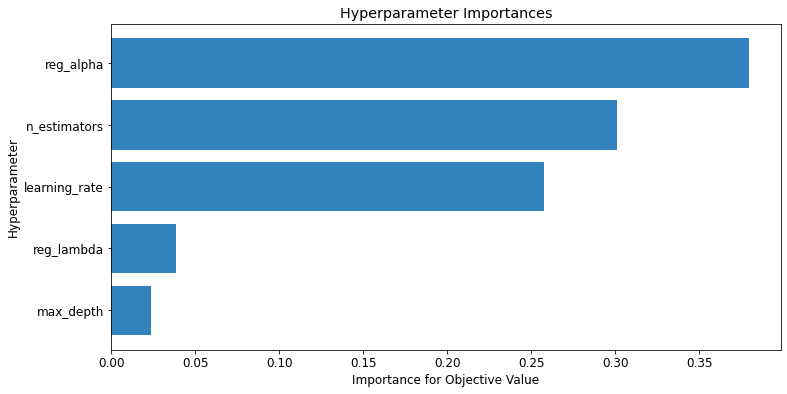

In [52]:
#Выведем важности параметров

from optuna.visualization.matplotlib import plot_param_importances

plt.rcParams['figure.figsize'] = (12,6)
plot_param_importances(study_xgb)

In [53]:
import lightgbm as lgb
#Напишем функцию для lightgbm
def objective(trial):
    global data, target
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.25)
    dtrain = lgb.Dataset(train_x, label=train_y)
 
    grid_params = {
        'objective': 'binary',
        'metric': 'Recall',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=17)   
    cv_results=np.empty(5)
    for i, (train_i, valid_i) in enumerate(cv.split(train_x, train_y)):
        X_train_i, X_valid_i = X_train.iloc[train_i], X_train.iloc[valid_i] 
        y_train_i, y_valid_i = y_train.iloc[train_i], y_train.iloc[valid_i]
        model = lgb.LGBMClassifier(**grid_params,
                              eval_metric='auc')
        model.fit(X = X_train_i, 
                  y = y_train_i, 
                  eval_set = [(X_valid_i, y_valid_i)])
        y_pred = model.predict(X_valid_i)
        cv_results[i] = roc_auc_score(y_valid_i, y_pred)
        
    return np.mean(cv_results)
    

study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective, n_trials=100, show_progress_bar=True)
 
print('Number of finished trials:', len(study_lgb.trials))
print('Best trial:', study_lgb.best_trial.params)

[I 2022-07-12 23:34:55,541] A new study created in memory with name: no-name-13d4f9e0-2bbe-4119-b89f-ca06dca0ded1
C:\ProgramData\Anaconda3\lib\site-packages\optuna\progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/100 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.45128363171415065, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45128363171415065
[LightGBM] [Warning] lambda_l1 is set=0.0027224077087174958, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0027224077087174958
[LightGBM] [Warning] bagging_fraction is set=0.6581891349711884, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6581891349711884
[LightGBM] [Warning] lambda_l2 is set=0.0005013022222356456, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005013022222356456
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.45128363171415065, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45128363171415065
[LightGBM] [Warning] lambda_l1 is set=0.0027224077

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.7698951009025129, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7698951009025129
[LightGBM] [Warning] lambda_l1 is set=8.513184219941493, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.513184219941493
[LightGBM] [Warning] bagging_fraction is set=0.43584094360991815, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43584094360991815
[LightGBM] [Warning] lambda_l2 is set=7.11146037487212, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.11146037487212
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.7698951009025129, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7698951009025129
[LightGBM] [Warning] lambda_l1 is set=8.513184219941493, reg_alpha=0.0

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.8583586759451425, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8583586759451425
[LightGBM] [Warning] lambda_l1 is set=0.0009242825727312396, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009242825727312396
[LightGBM] [Warning] bagging_fraction is set=0.6814350457191618, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6814350457191618
[LightGBM] [Warning] lambda_l2 is set=2.3925979748659483e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3925979748659483e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[I 2022-07-12 23:34:57,719] Trial 4 finished with value: 0.6903794355952998 and parameters: {'lambda_l1': 0.0009242825727312396, 'lambda_l2': 2.3925979748659483e-06, 'num_leaves': 85, 'feature_fraction': 0.8583586759451425, 'bagging_fraction': 0.681435045719

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.9965722039899615, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9965722039899615
[LightGBM] [Warning] lambda_l1 is set=0.00013941116859470326, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00013941116859470326
[LightGBM] [Warning] bagging_fraction is set=0.5035040185697001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5035040185697001
[LightGBM] [Warning] lambda_l2 is set=3.7704475077212532e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.7704475077212532e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.9965722039899615, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9965722039899615
[LightGBM] [Warning] lambda_l1 is set=0.0001394111

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.5464739206617738, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5464739206617738
[LightGBM] [Warning] lambda_l1 is set=1.072708310233362, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.072708310233362
[LightGBM] [Warning] bagging_fraction is set=0.8280735387249947, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8280735387249947
[LightGBM] [Warning] lambda_l2 is set=0.016723339860565366, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.016723339860565366
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[I 2022-07-12 23:35:00,960] Trial 9 finished with value: 0.6990786503009307 and parameters: {'lambda_l1': 1.072708310233362, 'lambda_l2': 0.016723339860565366, 'num_leaves': 99, 'feature_fraction': 0.5464739206617738, 'bagging_fraction': 0.8280735387249947, 'bagging_fre

[LightGBM] [Warning] feature_fraction is set=0.8068261563007131, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8068261563007131
[LightGBM] [Warning] lambda_l1 is set=9.81883730073591, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.81883730073591
[LightGBM] [Warning] bagging_fraction is set=0.4168215507796041, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4168215507796041
[LightGBM] [Warning] lambda_l2 is set=5.498405615619328, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.498405615619328
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.8068261563007131, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8068261563007131
[LightGBM] [Warning] lambda_l1 is set=9.81883730073591, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.8188373007

[I 2022-07-12 23:35:02,353] Trial 14 finished with value: 0.709396580227003 and parameters: {'lambda_l1': 8.021119917044, 'lambda_l2': 6.17992433558099, 'num_leaves': 84, 'feature_fraction': 0.9319730899007388, 'bagging_fraction': 0.40040903003626876, 'bagging_freq': 3, 'min_child_samples': 48}. Best is trial 12 with value: 0.7148800638110113.
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.958655522965693, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.958655522965693
[LightGBM] [Warning] lambda_l1 is set=0.05637278679974137, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05637278679974137
[LightGBM] [Warning] bagging_fraction is set=0.5726706572747784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5726706572747784
[LightGBM] [Warning] lambda_l2 is set=0.17754472315705044, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17754472315705044
[LightGBM] [Warning] bagging_fre

[LightGBM] [Warning] feature_fraction is set=0.9113149484262811, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9113149484262811
[LightGBM] [Warning] lambda_l1 is set=0.530338121291474, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.530338121291474
[LightGBM] [Warning] bagging_fraction is set=0.5899251106852845, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5899251106852845
[LightGBM] [Warning] lambda_l2 is set=0.11434176442840542, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11434176442840542
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.9113149484262811, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9113149484262811
[LightGBM] [Warning] lambda_l1 is set=0.530338121291474, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.530

[LightGBM] [Warning] feature_fraction is set=0.8875488219824033, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8875488219824033
[LightGBM] [Warning] lambda_l1 is set=1.4856277731906055e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4856277731906055e-07
[LightGBM] [Warning] bagging_fraction is set=0.9362245451823963, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9362245451823963
[LightGBM] [Warning] lambda_l2 is set=1.3088619243642365, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3088619243642365
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.8875488219824033, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8875488219824033
[LightGBM] [Warning] lambda_l1 is set=1.4856277731906055e-07, reg_alpha=0.0 will be ignored. Current value: la

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.9911238591311007, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9911238591311007
[LightGBM] [Warning] lambda_l1 is set=1.4957763683381782, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4957763683381782
[LightGBM] [Warning] bagging_fraction is set=0.4664334535865619, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4664334535865619
[LightGBM] [Warning] lambda_l2 is set=0.03946469587105419, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03946469587105419
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.9911238591311007, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9911238591311007
[LightGBM] [Warning] lambda_l1 is set=1.4957763683381782, reg_al

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.9414534472110895, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9414534472110895
[LightGBM] [Warning] lambda_l1 is set=0.16896351969972476, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16896351969972476
[LightGBM] [Warning] bagging_fraction is set=0.562314924810028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.562314924810028
[LightGBM] [Warning] lambda_l2 is set=0.2695527921360925, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2695527921360925
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.9414534472110895, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9414534472110895
[LightGBM] [Warning] lambda_l1 is set=0.16896351969972476, reg_alp

[LightGBM] [Warning] feature_fraction is set=0.907280620770379, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.907280620770379
[LightGBM] [Warning] lambda_l1 is set=2.9513246309046566, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9513246309046566
[LightGBM] [Warning] bagging_fraction is set=0.44388975332262237, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44388975332262237
[LightGBM] [Warning] lambda_l2 is set=0.2531513863605259, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2531513863605259
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.907280620770379, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.907280620770379
[LightGBM] [Warning] lambda_l1 is set=2.9513246309046566, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9513

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.9641456182694019, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9641456182694019
[LightGBM] [Warning] lambda_l1 is set=0.0029781659540306874, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0029781659540306874
[LightGBM] [Warning] bagging_fraction is set=0.44353702106656817, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44353702106656817
[LightGBM] [Warning] lambda_l2 is set=0.0009843974355808226, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009843974355808226
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.9641456182694019, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9641456182694019
[LightGBM] [Warning] lambda_l1 is set=0.002978165954

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.8858928156596314, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8858928156596314
[LightGBM] [Warning] lambda_l1 is set=3.070722278651991, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.070722278651991
[LightGBM] [Warning] bagging_fraction is set=0.479065038255638, subsample=1.0 will be ignored. Current value: bagging_fraction=0.479065038255638
[LightGBM] [Warning] lambda_l2 is set=0.565867643341321, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.565867643341321
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.8858928156596314, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8858928156596314
[LightGBM] [Warning] lambda_l1 is set=3.070722278651991, reg_alpha=0.0 w

[LightGBM] [Warning] feature_fraction is set=0.6560278241658677, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6560278241658677
[LightGBM] [Warning] lambda_l1 is set=0.09208761647129804, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09208761647129804
[LightGBM] [Warning] bagging_fraction is set=0.4181749837727835, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4181749837727835
[LightGBM] [Warning] lambda_l2 is set=3.910453939718097, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.910453939718097
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[I 2022-07-12 23:35:10,026] Trial 34 finished with value: 0.7060535407050017 and parameters: {'lambda_l1': 0.09208761647129804, 'lambda_l2': 3.910453939718097, 'num_leaves': 19, 'feature_fraction': 0.6560278241658677, 'bagging_fraction': 0.4181749837727835, 'bagging_freq': 3, 'min_child_samples': 72}. Best is trial 12 with

[LightGBM] [Warning] feature_fraction is set=0.5196376952698479, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5196376952698479
[LightGBM] [Warning] lambda_l1 is set=3.560143674172548, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.560143674172548
[LightGBM] [Warning] bagging_fraction is set=0.42791865412024793, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42791865412024793
[LightGBM] [Warning] lambda_l2 is set=0.057436260052671134, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.057436260052671134
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.5196376952698479, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5196376952698479
[LightGBM] [Warning] lambda_l1 is set=3.560143674172548, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3

[LightGBM] [Warning] feature_fraction is set=0.7451024280117777, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7451024280117777
[LightGBM] [Warning] lambda_l1 is set=9.989010477572588, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.989010477572588
[LightGBM] [Warning] bagging_fraction is set=0.6116505737312221, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6116505737312221
[LightGBM] [Warning] lambda_l2 is set=2.5715400001395234e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5715400001395234e-05
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[I 2022-07-12 23:35:11,468] Trial 39 finished with value: 0.7066051932532671 and parameters: {'lambda_l1': 9.989010477572588, 'lambda_l2': 2.5715400001395234e-05, 'num_leaves': 86, 'feature_fraction': 0.7451024280117777, 'bagging_fraction': 0.6116505737312221, 'bagging_freq': 5, 'min_child_samples': 90}. Best is tria

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.9588757977213378, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9588757977213378
[LightGBM] [Warning] lambda_l1 is set=1.3851195996965073, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3851195996965073
[LightGBM] [Warning] bagging_fraction is set=0.48038896962707733, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48038896962707733
[LightGBM] [Warning] lambda_l2 is set=0.3711395118634372, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3711395118634372
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.9588757977213378, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9588757977213378
[LightGBM] [Warning] lambda_l1 is set=1.3851195996965073, reg_al

[LightGBM] [Warning] feature_fraction is set=0.989546998426839, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.989546998426839
[LightGBM] [Warning] lambda_l1 is set=9.897051072811893, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.897051072811893
[LightGBM] [Warning] bagging_fraction is set=0.6739191931241891, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6739191931241891
[LightGBM] [Warning] lambda_l2 is set=2.2581701076968668, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2581701076968668
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.989546998426839, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.989546998426839
[LightGBM] [Warning] lambda_l1 is set=9.897051072811893, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.897051072

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.6996724743042193, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6996724743042193
[LightGBM] [Warning] lambda_l1 is set=1.7023930152544513, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7023930152544513
[LightGBM] [Warning] bagging_fraction is set=0.6959584881095757, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6959584881095757
[LightGBM] [Warning] lambda_l2 is set=1.957503022352994, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.957503022352994
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.6996724743042193, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6996724743042193
[LightGBM] [Warning] lambda_l1 is set=1.7023930152544513, reg_alpha=

[LightGBM] [Warning] lambda_l1 is set=0.10542384348165619, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10542384348165619
[LightGBM] [Warning] bagging_fraction is set=0.7319087154492532, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7319087154492532
[LightGBM] [Warning] lambda_l2 is set=0.022823340623782898, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.022823340623782898
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.853845908479804, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.853845908479804
[LightGBM] [Warning] lambda_l1 is set=0.10542384348165619, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10542384348165619
[LightGBM] [Warning] bagging_fraction is set=0.7319087154492532, subsample=1.0 will be ignored. Current value: bagging_fraction=0.731

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.8902336475340562, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8902336475340562
[LightGBM] [Warning] lambda_l1 is set=9.840692149224076, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.840692149224076
[LightGBM] [Warning] bagging_fraction is set=0.5002310685207054, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5002310685207054
[LightGBM] [Warning] lambda_l2 is set=0.6620904186864327, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6620904186864327
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[I 2022-07-12 23:35:16,084] Trial 51 finished with value: 0.7096878741235988 and parameters: {'lambda_l1': 9.840692149224076, 'lambda_l2': 0.6620904186864327, 'num_leaves': 58, 'feature_fraction': 0.8902336475340562, 'bagging_fraction': 0.5002310685207054, 'bagging_freq': 2

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.4015775247975569, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4015775247975569
[LightGBM] [Warning] lambda_l1 is set=3.0905725781686773, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.0905725781686773
[LightGBM] [Warning] bagging_fraction is set=0.5440699807820362, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5440699807820362
[LightGBM] [Warning] lambda_l2 is set=4.0151159663178255, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.0151159663178255
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.4015775247975569, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4015775247975569
[LightGBM] [Warning] lambda_l1 is set=3.0905725781686773, reg_alph

[I 2022-07-12 23:35:17,372] Trial 56 finished with value: 0.7073049485848422 and parameters: {'lambda_l1': 5.079570929441074, 'lambda_l2': 0.19551720617912263, 'num_leaves': 22, 'feature_fraction': 0.8379921467042284, 'bagging_fraction': 0.6526419361859405, 'bagging_freq': 1, 'min_child_samples': 33}. Best is trial 12 with value: 0.7148800638110113.
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.8177985602630329, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8177985602630329
[LightGBM] [Warning] lambda_l1 is set=0.6839486881506996, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6839486881506996
[LightGBM] [Warning] bagging_fraction is set=0.6044330663168236, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6044330663168236
[LightGBM] [Warning] lambda_l2 is set=1.712808816684248, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.712808816684248
[LightGBM] [Warning] bagging_f

[LightGBM] [Warning] feature_fraction is set=0.8993123247654451, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8993123247654451
[LightGBM] [Warning] lambda_l1 is set=0.043598098892011806, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.043598098892011806
[LightGBM] [Warning] bagging_fraction is set=0.4479518357352964, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4479518357352964
[LightGBM] [Warning] lambda_l2 is set=0.3964473301806307, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3964473301806307
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.8993123247654451, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8993123247654451
[LightGBM] [Warning] lambda_l1 is set=0.043598098892011806, reg_alpha=0.0 will be ignored. Current value: lambda_l

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.9290732226334474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9290732226334474
[LightGBM] [Warning] lambda_l1 is set=5.401883490843924, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.401883490843924
[LightGBM] [Warning] bagging_fraction is set=0.4965946966286236, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4965946966286236
[LightGBM] [Warning] lambda_l2 is set=1.0107006385702164, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0107006385702164
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.9290732226334474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9290732226334474
[LightGBM] [Warning] lambda_l1 is set=5.401883490843924, reg_alpha=0

[LightGBM] [Warning] feature_fraction is set=0.8711390978819017, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8711390978819017
[LightGBM] [Warning] lambda_l1 is set=1.056157687170116e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.056157687170116e-08
[LightGBM] [Warning] bagging_fraction is set=0.41860333314458686, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41860333314458686
[LightGBM] [Warning] lambda_l2 is set=2.157612569031962, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.157612569031962
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.8711390978819017, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8711390978819017
[LightGBM] [Warning] lambda_l1 is set=1.056157687170116e-08, reg_alpha=0.0 will be ignored. Current value: lambd

[LightGBM] [Warning] feature_fraction is set=0.6245972886886274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6245972886886274
[LightGBM] [Warning] lambda_l1 is set=5.055030824024096, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.055030824024096
[LightGBM] [Warning] bagging_fraction is set=0.4435688107233903, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4435688107233903
[LightGBM] [Warning] lambda_l2 is set=3.744962062746109e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.744962062746109e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.6245972886886274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6245972886886274
[LightGBM] [Warning] lambda_l1 is set=5.055030824024096, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5

[LightGBM] [Warning] feature_fraction is set=0.7373687926586088, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7373687926586088
[LightGBM] [Warning] lambda_l1 is set=2.3014050468174907, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3014050468174907
[LightGBM] [Warning] bagging_fraction is set=0.9950650363138888, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9950650363138888
[LightGBM] [Warning] lambda_l2 is set=0.38103659465133083, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.38103659465133083
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.7373687926586088, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7373687926586088
[LightGBM] [Warning] lambda_l1 is set=2.3014050468174907, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.8011097847375661, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8011097847375661
[LightGBM] [Warning] lambda_l1 is set=0.016770218552281873, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016770218552281873
[LightGBM] [Warning] bagging_fraction is set=0.6376482068737789, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6376482068737789
[LightGBM] [Warning] lambda_l2 is set=0.07433036627716642, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07433036627716642
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[I 2022-07-12 23:35:22,524] Trial 70 finished with value: 0.7025057827305842 and parameters: {'lambda_l1': 0.016770218552281873, 'lambda_l2': 0.07433036627716642, 'num_leaves': 25, 'feature_fraction': 0.8011097847375661, 'bagging_fraction': 0.6376482068737789, 'bagg

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.7692963951968206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7692963951968206
[LightGBM] [Warning] lambda_l1 is set=9.107810780935136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.107810780935136
[LightGBM] [Warning] bagging_fraction is set=0.45475610073146633, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45475610073146633
[LightGBM] [Warning] lambda_l2 is set=0.0024125986597560174, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0024125986597560174
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.7692963951968206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7692963951968206
[LightGBM] [Warning] lambda_l1 is set=9.107810780935136, reg

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.7915859223728068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7915859223728068
[LightGBM] [Warning] lambda_l1 is set=4.053547585779919, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.053547585779919
[LightGBM] [Warning] bagging_fraction is set=0.4618341443370048, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4618341443370048
[LightGBM] [Warning] lambda_l2 is set=0.2437199533005512, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2437199533005512
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.7915859223728068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7915859223728068
[LightGBM] [Warning] lambda_l1 is set=4.053547585779919, reg_alpha=0

[LightGBM] [Warning] feature_fraction is set=0.7540348206153273, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7540348206153273
[LightGBM] [Warning] lambda_l1 is set=0.7753734453682067, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7753734453682067
[LightGBM] [Warning] bagging_fraction is set=0.9694968609316663, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9694968609316663
[LightGBM] [Warning] lambda_l2 is set=0.012371986992071484, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.012371986992071484
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.7540348206153273, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7540348206153273
[LightGBM] [Warning] lambda_l1 is set=0.7753734453682067, reg_alpha=0.0 will be ignored. Current value: lambda_l1=

[LightGBM] [Warning] feature_fraction is set=0.8486955400844828, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8486955400844828
[LightGBM] [Warning] lambda_l1 is set=0.003269030818143927, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003269030818143927
[LightGBM] [Warning] bagging_fraction is set=0.5573150290442178, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5573150290442178
[LightGBM] [Warning] lambda_l2 is set=2.338890745499343, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.338890745499343
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.8486955400844828, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8486955400844828
[LightGBM] [Warning] lambda_l1 is set=0.003269030818143927, reg_alpha=0.0 will be ignored. Current value: lambda_l1=

[LightGBM] [Warning] feature_fraction is set=0.7736058919434882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7736058919434882
[LightGBM] [Warning] lambda_l1 is set=1.5975957307676483, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5975957307676483
[LightGBM] [Warning] bagging_fraction is set=0.4816960196564521, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4816960196564521
[LightGBM] [Warning] lambda_l2 is set=0.037928333500035105, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.037928333500035105
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.7736058919434882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7736058919434882
[LightGBM] [Warning] lambda_l1 is set=1.5975957307676483, reg_alpha=0.0 will be ignored. Current value: lambda_l1=

[LightGBM] [Warning] feature_fraction is set=0.7811575283877552, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7811575283877552
[LightGBM] [Warning] lambda_l1 is set=3.71413308644784, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.71413308644784
[LightGBM] [Warning] bagging_fraction is set=0.4150182482588634, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4150182482588634
[LightGBM] [Warning] lambda_l2 is set=0.457808949494918, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.457808949494918
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[I 2022-07-12 23:35:26,823] Trial 85 finished with value: 0.7001847921651547 and parameters: {'lambda_l1': 3.71413308644784, 'lambda_l2': 0.457808949494918, 'num_leaves': 46, 'feature_fraction': 0.7811575283877552, 'bagging_fraction': 0.4150182482588634, 'bagging_freq': 6, 'min_child_samples': 48}. Best is trial 12 with value: 0

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.8360561162352949, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8360561162352949
[LightGBM] [Warning] lambda_l1 is set=1.0169343437408251, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0169343437408251
[LightGBM] [Warning] bagging_fraction is set=0.4734650060572682, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4734650060572682
[LightGBM] [Warning] lambda_l2 is set=0.2529153442576378, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2529153442576378
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.8360561162352949, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8360561162352949
[LightGBM] [Warning] lambda_l1 is set=1.0169343437408251, reg_alph

[LightGBM] [Warning] feature_fraction is set=0.7549314496277899, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7549314496277899
[LightGBM] [Warning] lambda_l1 is set=0.49322121107598377, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.49322121107598377
[LightGBM] [Warning] bagging_fraction is set=0.4099174895094711, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4099174895094711
[LightGBM] [Warning] lambda_l2 is set=5.766467087529451, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.766467087529451
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.7549314496277899, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7549314496277899
[LightGBM] [Warning] lambda_l1 is set=0.49322121107598377, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.6779632553358476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6779632553358476
[LightGBM] [Warning] lambda_l1 is set=2.0624390533783004, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0624390533783004
[LightGBM] [Warning] bagging_fraction is set=0.48860491747453955, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48860491747453955
[LightGBM] [Warning] lambda_l2 is set=0.6385808839040458, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6385808839040458
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.6779632553358476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6779632553358476
[LightGBM] [Warning] lambda_l1 is set=2.0624390533783004, reg_al

[I 2022-07-12 23:35:30,443] Trial 95 finished with value: 0.6997956256573886 and parameters: {'lambda_l1': 3.3001298214738686, 'lambda_l2': 0.32330909994136925, 'num_leaves': 180, 'feature_fraction': 0.8259132709768385, 'bagging_fraction': 0.7543916837229382, 'bagging_freq': 2, 'min_child_samples': 46}. Best is trial 12 with value: 0.7148800638110113.
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.7887135089607532, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7887135089607532
[LightGBM] [Warning] lambda_l1 is set=1.8155774977974846, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8155774977974846
[LightGBM] [Warning] bagging_fraction is set=0.4393855428980021, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4393855428980021
[LightGBM] [Warning] lambda_l2 is set=0.08247611582474443, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08247611582474443
[LightGBM] [Warning] bag

[LightGBM] [Warning] feature_fraction is set=0.9183381112893952, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9183381112893952
[LightGBM] [Warning] lambda_l1 is set=3.991650274017649, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.991650274017649
[LightGBM] [Warning] bagging_fraction is set=0.4359851355248948, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4359851355248948
[LightGBM] [Warning] lambda_l2 is set=0.002499107731731326, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002499107731731326
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.9183381112893952, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9183381112893952
[LightGBM] [Warning] lambda_l1 is set=3.991650274017649, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9

In [59]:
print(f'Наилучшее значение roc-auc: {study_lgb.best_value}')

Наилучшее значение roc-auc: 0.7148800638110113


C:\Temp/ipykernel_12780/940758115.py:2: ExperimentalWarning:

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.



<AxesSubplot:title={'center':'Hyperparameter Importances'}, xlabel='Importance for Objective Value', ylabel='Hyperparameter'>

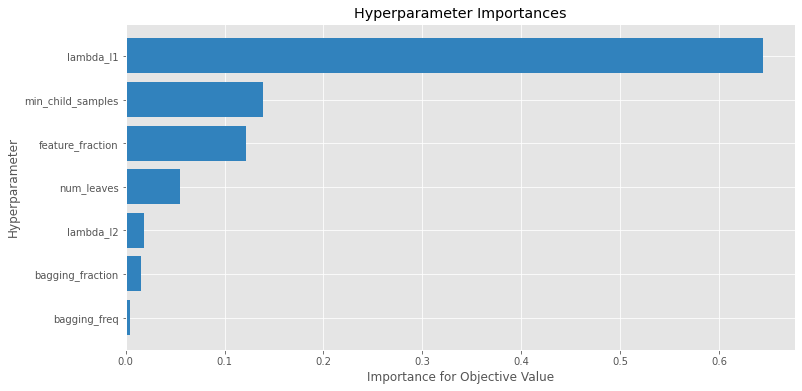

In [60]:
#Выведем важности параметров
plot_param_importances(study_lgb)

In [61]:
#Оценим модели с наилучшими параметрами на тестовом наборе
xgbmc = XGBClassifier(**study_xgb.best_params).fit(X_train, y_train)
y_pred_xgb = xgbmc.predict(X_test)

lgbmc = lgb.LGBMClassifier(**study_lgb.best_params).fit(X_train, y_train)
y_pred_lg = lgbmc.predict(X_test)



bst_models = [xgbmc, lgbmc]
bst_recalls = []
bst_aucs = []
for model in bst_models:
    y_pred = model.predict(X_test)
    bst_aucs.append(roc_auc_score(y_test, y_pred))
    bst_recalls.append(recall_score(y_test, y_pred))

[23:45:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] feature_fraction is set=0.8068261563007131, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8068261563007131
[LightGBM] [Warning] lambda_l1 is set=9.81883730073591, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.81883730073591
[LightGBM] [Warning] bagging_fraction is set=0.4168215507796041, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4168215507796041
[LightGBM] [Warning] lambda_l2 is set=5.498405615619328, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.498405615619328
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [62]:
fig = px.bar(x=['xgboost', 'lgm'], y = [bst_aucs, bst_recalls], barmode='group', labels = {'x':'model', 'value': 'metrics'})
fig.data[0]['name'] = 'ROC AUC'
fig.data[1]['name'] = 'recall'
fig.layout.legend.title.text = 'metric'
fig.show()

**Выводы**

Используя более мощные библиотеки xgboost и lightgbm удалось достигнуть неплохого значения roc auc, однако меньшего, чем при использовании библиотеки sklearn, возможно, данные модели нуждаются в более тонкой настройки гиперпараметров, после чего можно будет получить более приемлимые результаты. 

## 3.5 Применение полносвязной нейронной сети

In [68]:
X_train

SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
3291              1        1           1      65             1   
1994              0        1           1      71             1   
1345              0        1           1      20             1   
2934              0        1           0      67             1   
3819              0        1           1      43             1   
...             ...      ...         ...     ...           ...   
2357              0        0           0      13             1   
3613              1        0           0      56             1   
3826              0        1           1      51             1   
878               0        1           1      20             1   
1022              1        1           1      11             1   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
3291               0             0                 1            1   
1994               1             0                 1            1   
1345               0             0                 0            0   
2934               1             1                 1            0   
3819               1             0                 1            1   
...              ...           ...               ...          ...   
2357               0             0                 0            0   
3613               1             1                 0            0   
3826               0             0                 0            0   
878                0             0                 0            0   
1022               0             0                 1            0   

      StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  \
3291            1                1                 1          103.90   
1994            1                1                 1           82.00   
1345            1                1                 1           90.20   
2934            1                1                 0          109.90   
3819            1                1                 1           79.15   
...           ...              ...               ...             ...   
2357            0                0                 1           19.30   
3613            0                1                 1           96.85   
3826            0                0                 0           19.95   
878             0                0                 0           20.05   
1022            0                0                 1           78.10   

      TotalCharges  tenure_in_years  Is_internet_service  MultipleLines_No  \
3291       6767.10                5                    1                 0   
1994       5999.85                6                    1                 1   
1345       1776.55                2                    1                 1   
2934       7332.40                6                    1                 0   
3819       3566.60                4                    1                 1   
...            ...              ...                  ...               ...   
2357        279.30                1                    0                 1   
3613       5219.65                5                    1                 0   
3826       1028.75                4                    0                 1   
878         406.05                2                    0                 1   
1022        864.85                1                    1                 0   

      MultipleLines_Yes  InternetService_DSL  InternetService_Fiber optic  \
3291                  1                    0                            1   
1994                  0                    1                            0   
1345                  0                    0                            1   
2934                  1                    0                            1   
3819                  0                    1                            0   
...                 ...                  ...                          ...   
2357                  0                    

In [72]:
N_TRAIN_EXAMPLES = 3000
N_VALID_EXAMPLES = X_train.shape[1] - 3000
BATCHSIZE = 256
EPOCHS = 10


def create_model(trial):
    # We optimize the numbers of layers, their units and weight decay parameter.
    n_layers = trial.suggest_int("n_layers", 1, 5)
    weight_decay = trial.suggest_float("weight_decay", 1e-10, 1e-3, log=True)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(256, input_shape=(28, )))
    for i in range(n_layers):
        num_hidden = trial.suggest_int("n_units_l{}".format(i), 4, 128, log=True)
        model.add(
            tf.keras.layers.Dense(
                num_hidden,
                activation="relu"
            )
        )
    model.add(
        tf.keras.layers.Dense(1, activation='softmax')
    )
    return model


def create_optimizer(trial):
    # We optimize the choice of optimizers as well as their parameters.
    kwargs = {}
    optimizer_options = ["RMSprop", "Adam"]
    optimizer_selected = trial.suggest_categorical("optimizer", optimizer_options)
    if optimizer_selected == "RMSprop":
        kwargs["learning_rate"] = trial.suggest_float(
            "rmsprop_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["decay"] = trial.suggest_float("rmsprop_decay", 0.85, 0.99)
        kwargs["momentum"] = trial.suggest_float("rmsprop_momentum", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "Adam":
        kwargs["learning_rate"] = trial.suggest_float("adam_learning_rate", 1e-5, 1e-1, log=True)
    optimizer = getattr(tf.optimizers, optimizer_selected)(**kwargs)
    return optimizer


def learn(model, optimizer, dataset, mode="eval"):
    for batch, (features, labels) in enumerate(dataset):
        with tf.GradientTape() as tape:
            logits = model(features, training=(mode == "train"))
            loss_value = tf.keras.losses.BinaryCrossentropy()
                tf.keras.metrics.AUC(dtype=tf.float32)(logits, labels)
            else:
                grads = tape.gradient(loss_value, model.variables)
                optimizer.apply_gradients(zip(grads, model.variables))

    if mode == "eval":
        return accuracy


def get_mnist():
    (x_train, y_train), (x_valid, y_valid) = mnist.load_data()
    x_train = x_train.astype("float32") / 255
    x_valid = x_valid.astype("float32") / 255

    y_train = y_train.astype("int32")
    y_valid = y_valid.astype("int32")

    train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_ds = train_ds.shuffle(60000).batch(BATCHSIZE).take(N_TRAIN_EXAMPLES)

    valid_ds = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
    valid_ds = valid_ds.shuffle(10000).batch(BATCHSIZE).take(N_VALID_EXAMPLES)
    return train_ds, valid_ds


# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective(trial):
    # Get MNIST data.
    train_ds, valid_ds = get_mnist()

    # Build model and optimizer.
    model = create_model(trial)
    optimizer = create_optimizer(trial)

    # Training and validating cycle.
    with tf.device("/cpu:0"):
        for _ in range(EPOCHS):
            learn(model, optimizer, train_ds, "train")

        accuracy = learn(model, optimizer, valid_ds, "eval")

    # Return last validation accuracy.
    return accuracy.result()


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    print("Number of finished trials: ", len(study.trials))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: ", trial.value)

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

IndentationError: unexpected indent (Temp/ipykernel_12780/3406774769.py, line 49)

## Общие выводы
Анализируя поставленную задачу прогнозирования оттока клиентов в качестве **метрики** было решено использовать **roc-auc**. Наилучших результатов удалось добиться с помощью моделей **адаптивного и градиентного бустинга**. Наиболее важными признаками с точки зрения принятия решения модели оказались **contract_month_tomonth, tenure и различные длительности контрактов**.